In [1]:
# Importing the requisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Reading the dataset
tele = pd.read_csv('telecom_churn_data.csv')
tele.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
# Checking the shape
tele.shape

(99999, 226)

In [4]:
# Checking the data type
tele.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [5]:
# Checking the describe
tele.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
# Checking the missing percentage
missing = ((tele.isnull().sum())/len(tele))*100
missing

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [7]:
# Checking the missing percentage
missing = ((tele.isnull().sum())/len(tele))*100
missing

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [8]:
# Extracting variables with missing percenntage greater than 70%
high_missing = tele.columns[missing>70]
high_missing

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [9]:
# Dropping high missing value variables
tele.drop(high_missing, axis=1, inplace=True)

In [10]:
# Dropping the mobile_number and circle_id column
tele.drop(['mobile_number', 'circle_id'], axis=1, inplace=True)

In [11]:
# Checking the shape
tele.shape

(99999, 184)

In [12]:
# Rechecking the null percentage
((tele.isnull().sum())/len(tele))*100

loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t_mou_7        3.859039
loc_og_t2t_mou_8        5.378054
loc_og_t2t

In [13]:
# Checking the count of unique datapoints in each column
unique_cols = tele.nunique()
unique_cols

loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
loc_og_t2t_mou_7        13411
loc_og_t2t_mou_8        13336
loc_og_t2t_mou_9        12949
loc_og_t2m_mou_6        20905
loc_og_t2m_mou_7        20637
loc_og_t2m

In [14]:
# Extracting and dropping those columns which has only one unique datapoint
single_value_counts = tele.columns[unique_cols==1]
tele.drop(single_value_counts, axis=1, inplace=True)

In [15]:
# Checking the value_count of monthly_2g_6 column
tele['monthly_2g_6'].value_counts(normalize=True)

0    0.926749
1    0.067281
2    0.005620
3    0.000280
4    0.000070
Name: monthly_2g_6, dtype: float64

In [16]:
# Checking the value_count of monthly_2g_7 column
tele['monthly_2g_7'].value_counts(normalize=True)

0    0.924359
1    0.068551
2    0.006690
3    0.000330
4    0.000050
5    0.000020
Name: monthly_2g_7, dtype: float64

In [17]:
# Checking the value_count of monthly_2g_8 column
tele['monthly_2g_8'].value_counts(normalize=True)

0    0.925919
1    0.067751
2    0.005860
3    0.000370
4    0.000080
5    0.000020
Name: monthly_2g_8, dtype: float64

In [18]:
# Checking the value_count of monthly_2g_9 column
tele['monthly_2g_9'].value_counts(normalize=True)

0    0.937359
1    0.056951
2    0.005300
3    0.000330
4    0.000060
Name: monthly_2g_9, dtype: float64

In [19]:
# As the columns 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8' & 'monthly_2g_9' are skewed so dropping it.
tele.drop(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9'], axis=1, inplace=True)

In [20]:
# Checking the shape
tele.shape

(99999, 165)

In [21]:
# Rechecking the count of unique datapoints in each column
tele.nunique()

arpu_6                 85681
arpu_7                 85308
arpu_8                 83615
arpu_9                 79937
onnet_mou_6            24313
onnet_mou_7            24336
onnet_mou_8            24089
onnet_mou_9            23565
offnet_mou_6           31140
offnet_mou_7           31023
offnet_mou_8           30908
offnet_mou_9           30077
roam_ic_mou_6           6512
roam_ic_mou_7           5230
roam_ic_mou_8           5315
roam_ic_mou_9           4827
roam_og_mou_6           8038
roam_og_mou_7           6639
roam_og_mou_8           6504
roam_og_mou_9           5882
loc_og_t2t_mou_6       13539
loc_og_t2t_mou_7       13411
loc_og_t2t_mou_8       13336
loc_og_t2t_mou_9       12949
loc_og_t2m_mou_6       20905
loc_og_t2m_mou_7       20637
loc_og_t2m_mou_8       20544
loc_og_t2m_mou_9       20141
loc_og_t2f_mou_6        3860
loc_og_t2f_mou_7        3863
loc_og_t2f_mou_8        3807
loc_og_t2f_mou_9        3758
loc_og_t2c_mou_6        2235
loc_og_t2c_mou_7        2426
loc_og_t2c_mou

### Missing Value Imputation

In [22]:
# Checking the null percentage
((tele.isnull().sum())/len(tele))*100

arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2f_mou_8       5.378054
loc_og_t

In [23]:
# Imputing the missing value of all columns with the median value
tele = tele.fillna(tele.median().iloc[0])

In [24]:
# Checking the count of null values in each variables
tele.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
arpu_9                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
onnet_mou_9            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
offnet_mou_9           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_ic_mou_9          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
roam_og_mou_9          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2t_mou_9       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2m_mou_9       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2f_mou_9       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_t2c_mou_9       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
loc_og_mou_9           0


In [25]:
# Checkign the head
tele.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100      197.704      197.704         0.00   
1   34.047  355.074  268.321   86.285       24.110       78.680         7.68   
2  167.690  189.058  210.226  290.714       11.540       55.240        37.26   
3  221.338  251.102  508.054  389.500       99.910       54.390       310.98   
4  261.636  309.876  238.174  163.426       50.310      149.440        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0      197.704       197.704       197.704          0.00       197.704   
1       18.340        15.740        99.840        304.76        53.760   
2       74.810       143.330       220.590        208.36       118.910   
3      241.710       123.310       109.010         71.68       113.540   
4       58.780        76.960        91.880        124.26        45.810   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0        197.704        197.704           0.00        197.704        197.704   
1          0.000          0.000           0.00          0.000          0.000   
2          0.000          0.000           0.00         38.490          0.000   
3          0.000         54.860          44.38          0.000          0.000   
4          0.000          0.000           0.00          0.000          0.000   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0        197.704           0.00        197.704           197.704   
1          0.000           0.00          0.000            23.880   
2          0.000           0.00         70.940             7.190   
3         28.090          39.04          0.000            73.680   
4          0.000           0.00          0.000            50.310   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0           197.704              0.00           197.704           197.704   
1            74.560              7.68            18.340            11.510   
2            28.740             13.58            14.390            29.340   
3            34.810             10.61            15.490           107.430   
4           149.440             83.89            58.780            67.640   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0           197.704              0.00           197.704           197.704   
1            75.940            291.86            53.760             0.000   
2            16.860             38.46            28.160            24.110   
3            83.210             22.46            65.460             1.910   
4            91.880            124.26            37.890             0.000   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0           197.704              0.00           197.704           197.704   
1             0.000              0.00             0.000             0.000   
2            21.790             15.61            22.240             0.000   
3             0.650              4.91             2.060             0.000   
4             0.000              0.00             1.930             0.000   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0           197.704              0.00           197.704       197.704   
1             2.910              0.00             0.000        35.390   
2           135.540             45.76             0.480        60.660   
3             0.000              0.00             0.000       183.030   
4             0.000              0.00             0.000       117.960   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0       197.704          0.00       197.704           197.704   
1       150.510        299.54        72.110             0.230   
2        67.410         67.66        64.810             4.340   
3       118.680         37.99        83.030            26.230   
4       241.330        208.16      

### Finding and seggregating the high value customers

In [26]:
# Creating a column of average recharge amount in the good phase
tele['avg_rech_amount_6_7'] = (tele['total_rech_amt_6'] + tele['total_rech_amt_7'])/2

In [27]:
# Checking the head
tele.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100      197.704      197.704         0.00   
1   34.047  355.074  268.321   86.285       24.110       78.680         7.68   
2  167.690  189.058  210.226  290.714       11.540       55.240        37.26   
3  221.338  251.102  508.054  389.500       99.910       54.390       310.98   
4  261.636  309.876  238.174  163.426       50.310      149.440        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0      197.704       197.704       197.704          0.00       197.704   
1       18.340        15.740        99.840        304.76        53.760   
2       74.810       143.330       220.590        208.36       118.910   
3      241.710       123.310       109.010         71.68       113.540   
4       58.780        76.960        91.880        124.26        45.810   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0        197.704        197.704           0.00        197.704        197.704   
1          0.000          0.000           0.00          0.000          0.000   
2          0.000          0.000           0.00         38.490          0.000   
3          0.000         54.860          44.38          0.000          0.000   
4          0.000          0.000           0.00          0.000          0.000   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0        197.704           0.00        197.704           197.704   
1          0.000           0.00          0.000            23.880   
2          0.000           0.00         70.940             7.190   
3         28.090          39.04          0.000            73.680   
4          0.000           0.00          0.000            50.310   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0           197.704              0.00           197.704           197.704   
1            74.560              7.68            18.340            11.510   
2            28.740             13.58            14.390            29.340   
3            34.810             10.61            15.490           107.430   
4           149.440             83.89            58.780            67.640   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0           197.704              0.00           197.704           197.704   
1            75.940            291.86            53.760             0.000   
2            16.860             38.46            28.160            24.110   
3            83.210             22.46            65.460             1.910   
4            91.880            124.26            37.890             0.000   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0           197.704              0.00           197.704           197.704   
1             0.000              0.00             0.000             0.000   
2            21.790             15.61            22.240             0.000   
3             0.650              4.91             2.060             0.000   
4             0.000              0.00             1.930             0.000   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0           197.704              0.00           197.704       197.704   
1             2.910              0.00             0.000        35.390   
2           135.540             45.76             0.480        60.660   
3             0.000              0.00             0.000       183.030   
4             0.000              0.00             0.000       117.960   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0       197.704          0.00       197.704           197.704   
1       150.510        299.54        72.110             0.230   
2        67.410         67.66        64.810             4.340   
3       118.680         37.99        83.030            26.230   
4       241.330        208.16      

In [28]:
# Finding the 70th percentile for seggregating the high value customers
high_value_cust = tele['avg_rech_amount_6_7'].quantile(0.70)
high_value_cust

368.5

In [29]:
#Creating a new dataframe of high value customers whose average recharge in the good phase is greater or equal to 70th percentile
tele_hv = tele[tele['avg_rech_amount_6_7']>=high_value_cust]

In [30]:
# Checking the shape of high value dataframe
tele_hv.shape

(30011, 166)

In [31]:
# Checking the head of high value dataframe
tele_hv.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
13   492.846   205.671   593.260  322.732       501.76       108.39   
16   430.975   299.869   187.894  206.490        50.51        74.01   
17   690.008    18.980    25.499  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29      197.704        453.43        567.16        325.91   
8         35.08       33.460         94.66         80.63        136.48   
13       534.24      244.810        413.31        119.28        482.46   
16        70.61       31.340        296.29        229.74        162.76   
17         7.79      558.510         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7        197.704          16.23          33.49          31.64        197.704   
8        108.710           0.00           0.00           0.00          0.000   
13       214.060          23.53         144.24          72.11        136.780   
16       224.390           0.00           2.83           0.00          0.000   
17        87.890           0.00           4.76           4.81          0.000   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06        197.704   
8            0.00           0.00           0.00          0.000   
13           7.98          35.26           1.44         12.780   
16           0.00          17.74           0.00          0.000   
17           0.00           8.46          13.34         17.980   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28           197.704   
8             297.13            217.59             12.49            26.130   
13             49.63              6.19             36.01             6.140   
16             42.61             65.16             67.38            26.880   
17             38.99              0.00              0.00            36.410   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28           197.704   
8              80.96             70.58             50.54            34.580   
13            151.13             47.28            294.46           108.240   
16            273.29            145.99            128.28           201.490   
17             58.54              0.00              0.00             9.380   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23           197.704   
8               0.00              0.00              0.00             0.000   
13              4.54              0.00             23.51             5.290   
16              0.00              4.48             10.26             4.660   
17              0.00              0.00              0.00             0.000   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00           197.704   
8                0.0               0.0              7.15             0.000   
13               0.0               0.0              0.49             0.000   
16               0.0               0.0              0.00             0.000   
17               0.0               0.0              0.00             0.000   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79       197.704              4.30   
8         378.09        288.18         63.04        60.710            116.56   
13        205.31         53.48        353.99       119.690            446.41   
16        315.91        215.64        205.93       233.040  

In [32]:
# Dropping the avg_rech_amount_6_7 column
tele_hv.drop('avg_rech_amount_6_7', axis=1, inplace=True)

### Creating the target variable('churn')

In [33]:
# Assigning labels to churn and non-churn customers on the basis of a criteria
tele_hv['churn'] = np.where((tele_hv[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis=1)==0), 1, 0)

In [34]:
# Checking the head
tele_hv.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
13   492.846   205.671   593.260  322.732       501.76       108.39   
16   430.975   299.869   187.894  206.490        50.51        74.01   
17   690.008    18.980    25.499  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29      197.704        453.43        567.16        325.91   
8         35.08       33.460         94.66         80.63        136.48   
13       534.24      244.810        413.31        119.28        482.46   
16        70.61       31.340        296.29        229.74        162.76   
17         7.79      558.510         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7        197.704          16.23          33.49          31.64        197.704   
8        108.710           0.00           0.00           0.00          0.000   
13       214.060          23.53         144.24          72.11        136.780   
16       224.390           0.00           2.83           0.00          0.000   
17        87.890           0.00           4.76           4.81          0.000   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06        197.704   
8            0.00           0.00           0.00          0.000   
13           7.98          35.26           1.44         12.780   
16           0.00          17.74           0.00          0.000   
17           0.00           8.46          13.34         17.980   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28           197.704   
8             297.13            217.59             12.49            26.130   
13             49.63              6.19             36.01             6.140   
16             42.61             65.16             67.38            26.880   
17             38.99              0.00              0.00            36.410   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28           197.704   
8              80.96             70.58             50.54            34.580   
13            151.13             47.28            294.46           108.240   
16            273.29            145.99            128.28           201.490   
17             58.54              0.00              0.00             9.380   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23           197.704   
8               0.00              0.00              0.00             0.000   
13              4.54              0.00             23.51             5.290   
16              0.00              4.48             10.26             4.660   
17              0.00              0.00              0.00             0.000   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00           197.704   
8                0.0               0.0              7.15             0.000   
13               0.0               0.0              0.49             0.000   
16               0.0               0.0              0.00             0.000   
17               0.0               0.0              0.00             0.000   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79       197.704              4.30   
8         378.09        288.18         63.04        60.710            116.56   
13        205.31         53.48        353.99       119.690            446.41   
16        315.91        215.64        205.93       233.040  

In [35]:
# Extracting all the columns containing information of the churn month(i.e.,9th month)
ninth_month_columns = tele_hv.filter(regex='_9|sep', axis = 1).columns

In [36]:
# Dropping all the columns containing information of the churn month(i.e.,9th month)
tele_hv.drop(ninth_month_columns, axis=1, inplace=True)

In [37]:
# Checking the shape
tele_hv.shape

(30011, 125)

In [38]:
# Checking the head
tele_hv.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [39]:
# Checking the value count of the target variable
tele_hv['churn'].value_counts(normalize=True)*100

0    91.359835
1     8.640165
Name: churn, dtype: float64

In [40]:
# Checking the churn rate
churn_rate = (sum(tele_hv['churn'])/len(tele_hv['churn'].index))*100
churn_rate

8.64016527273333

#### Creating derived variables

In [41]:
# Deviation of the outgoing mou of the action phase from the average of that of the good phase.
tele_hv['deviation_og_mou_8'] = round(((tele_hv['total_og_mou_6']+tele_hv['total_og_mou_7'])/2 - tele_hv['total_og_mou_8']),2)

In [42]:
# Deviation of the total recharge amount of the action phase from the average of that of the good phase
tele_hv['deviation_rech_amt_8'] = round((tele_hv['total_rech_amt_6']+tele_hv['total_rech_amt_7'])/2 - (tele_hv['total_rech_amt_8']),2)

In [43]:
# Checking the head
tele_hv.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

### Handling the multicollinearity

Since the no. of features are large so checking the correlation in batches

In [44]:
# Creating the correlation matrix
corrmat = tele_hv.corr()
corrmat

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                1.000000  0.631581  0.570936     0.289065     0.145333   
arpu_7                0.631581  1.000000  0.740811     0.141869     0.267065   
arpu_8                0.570936  0.740811  1.000000     0.089754     0.183313   
onnet_mou_6           0.289065  0.141869  0.089754     1.000000     0.721148   
onnet_mou_7           0.145333  0.267065  0.183313     0.721148     1.000000   
onnet_mou_8           0.122460  0.213225  0.303896     0.591300     0.793400   
offnet_mou_6          0.457962  0.276597  0.209723     0.003441    -0.035625   
offnet_mou_7          0.261231  0.438496  0.322296    -0.052499    -0.000722   
offnet_mou_8          0.216143  0.338675  0.484577    -0.040929    -0.000538   
roam_ic_mou_6         0.090556  0.075831  0.069143    -0.000581     0.019018   
roam_ic_mou_7         0.084173  0.061182  0.049357     0.008805    -0.012609   
roam_ic_mou_8         0.102509  0.044482  0.020522     0.040846     0.003324   
roam_og_mou_6         0.164477  0.111591  0.106865     0.049415     0.057834   
roam_og_mou_7         0.133316  0.145398  0.110092     0.053958     0.041645   
roam_og_mou_8         0.126521  0.108543  0.126382     0.063006     0.050149   
loc_og_t2t_mou_6      0.123760  0.065756  0.065538     0.439594     0.320716   
loc_og_t2t_mou_7      0.091715  0.115613  0.096050     0.333581     0.445435   
loc_og_t2t_mou_8      0.095734  0.088747  0.126681     0.297095     0.354902   
loc_og_t2m_mou_6      0.272541  0.151548  0.156029    -0.041854    -0.077974   
loc_og_t2m_mou_7      0.181171  0.239834  0.208839    -0.076191    -0.061606   
loc_og_t2m_mou_8      0.166222  0.189550  0.289187    -0.070008    -0.068459   
loc_og_t2f_mou_6      0.042195  0.080407  0.079030    -0.061650    -0.048678   
loc_og_t2f_mou_7      0.106284  0.039344  0.047668    -0.058395    -0.065390   
loc_og_t2f_mou_8      0.101916 -0.020391 -0.080623    -0.009428    -0.070766   
loc_og_t2c_mou_6     -0.045906  0.025756  0.007953    -0.005919     0.014349   
loc_og_t2c_mou_7      0.062724 -0.046804 -0.041162     0.005875     0.003560   
loc_og_t2c_mou_8      0.073041 -0.069356 -0.156740     0.037971    -0.027783   
loc_og_mou_6          0.266844  0.144531  0.149012     0.244762     0.144805   
loc_og_mou_7          0.178308  0.240625  0.206797     0.168194     0.252683   
loc_og_mou_8          0.165377  0.191125  0.290766     0.140222     0.185583   
std_og_t2t_mou_6      0.231460  0.111757  0.053333     0.850462     0.609144   
std_og_t2t_mou_7      0.103366  0.217102  0.138085     0.603925     0.852592   
std_og_t2t_mou_8      0.081316  0.171960  0.240447     0.490393     0.678390   
std_og_t2m_mou_6      0.260020  0.149784  0.071190     0.033434     0.010946   
std_og_t2m_mou_7      0.124482  0.267097  0.166298    -0.011389     0.036512   
std_og_t2m_mou_8      0.092033  0.196151  0.287453    -0.001978     0.035214   
std_og_t2f_mou_6     -0.027303  0.039697  0.029376    -0.039756    -0.018262   
std_og_t2f_mou_7      0.074863 -0.026309 -0.013782    -0.028684    -0.038987   
std_og_t2f_mou_8      0.078195 -0.061884 -0.144232     0.015947    -0.051989   
std_og_mou_6          0.336964  0.177575  0.085193     0.597587     0.418164   
std_og_mou_7          0.153790  0.332830  0.209934     0.397338     0.597934   
std_og_mou_8          0.112904  0.252411  0.365563     0.322905     0.477422   
isd_og_mou_6          0.415789  0.402174  0.368674    -0.027021    -0.014508   
isd_og_mou_7          0.423346  0.452698  0.385310    -0.021505    -0.026339   
isd_og_mou_8          0.383434  0.322804  0.264308     0.004546    -0.038120   
spl_og_mou_6          0.030504  0.056657  0.065100     0.043650     0.038999   
spl_og_mou_7          0.081514  0.031362  0.047571     0.042836     0.067795   
spl_og_mou_8          0.075759 -0.035224 -0.095018     0.061375     0.021317   
og_others_6          -0.053659  0.026785  0.009207    -0.012233     0.009143   
og_others_7           0.

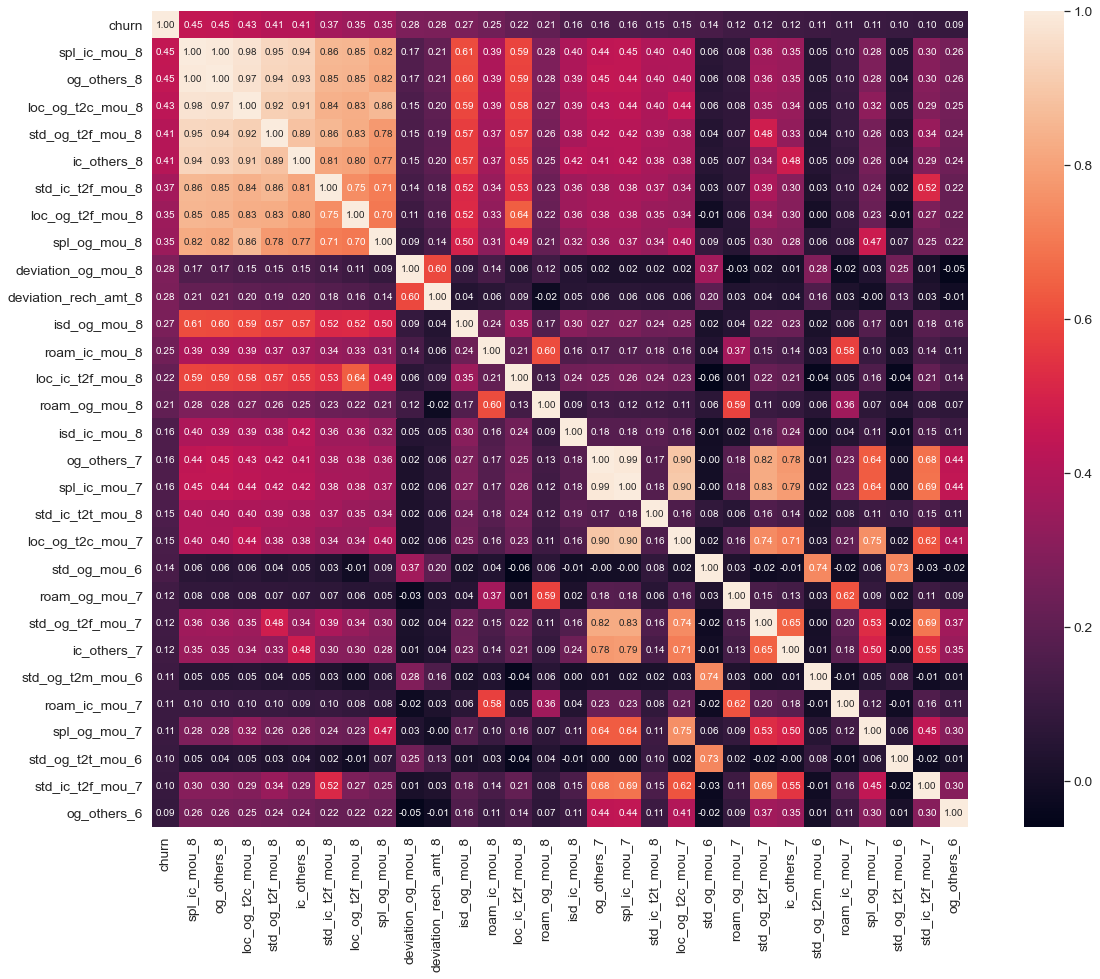

In [45]:
# Creating heatmap
k = 30
cols = corrmat.nlargest(k, 'churn')['churn'].index
cm = np.corrcoef(tele_hv[cols].values.T)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [46]:
# Dropping highly correlated variables
tele_hv.drop(['spl_ic_mou_8', 'og_others_8', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'ic_others_8', 'std_ic_t2f_mou_8', 
              'loc_og_t2f_mou_8', 'og_others_7', 'spl_ic_mou_7', 'loc_og_t2c_mou_7', 'std_og_mou_6'], axis=1, inplace=True)

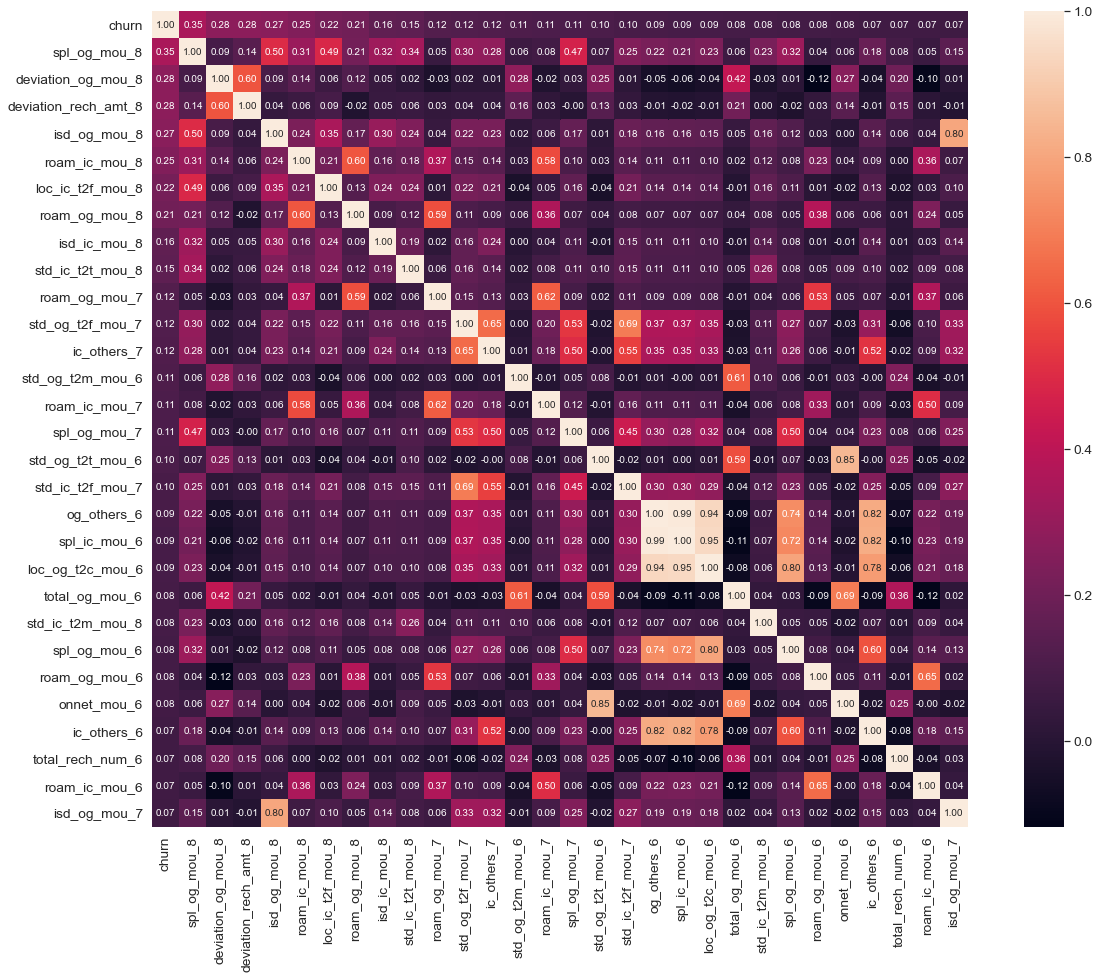

In [47]:
# Plotting the correlation matrix and creating the heatmap
corrmat = tele_hv.corr()
k = 30
cols = corrmat.nlargest(k, 'churn')['churn'].index
cm = np.corrcoef(tele_hv[cols].values.T)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [48]:
# Dropping highly correlated variables
tele_hv.drop(['isd_og_mou_8', 'std_og_t2t_mou_6', 'og_others_6', 'spl_ic_mou_6', 'loc_og_t2c_mou_6'], axis=1, inplace=True)

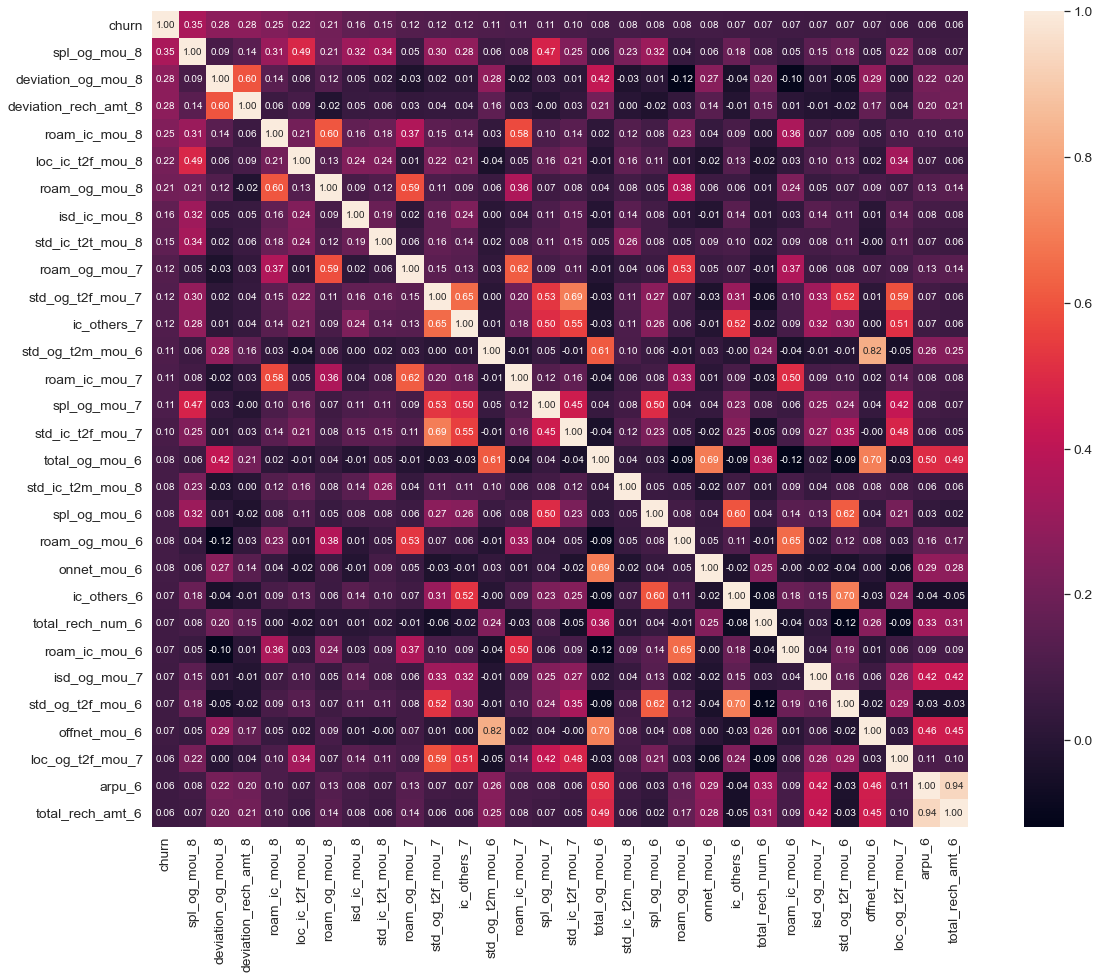

In [49]:
# Plotting the correlation matrix and creating the heatmap
corrmat = tele_hv.corr()
k = 30
cols = corrmat.nlargest(k, 'churn')['churn'].index
cm = np.corrcoef(tele_hv[cols].values.T)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [50]:
# Dropping highly correlated variables
tele_hv.drop(['std_og_t2m_mou_6', 'total_rech_amt_6'], axis=1, inplace=True)

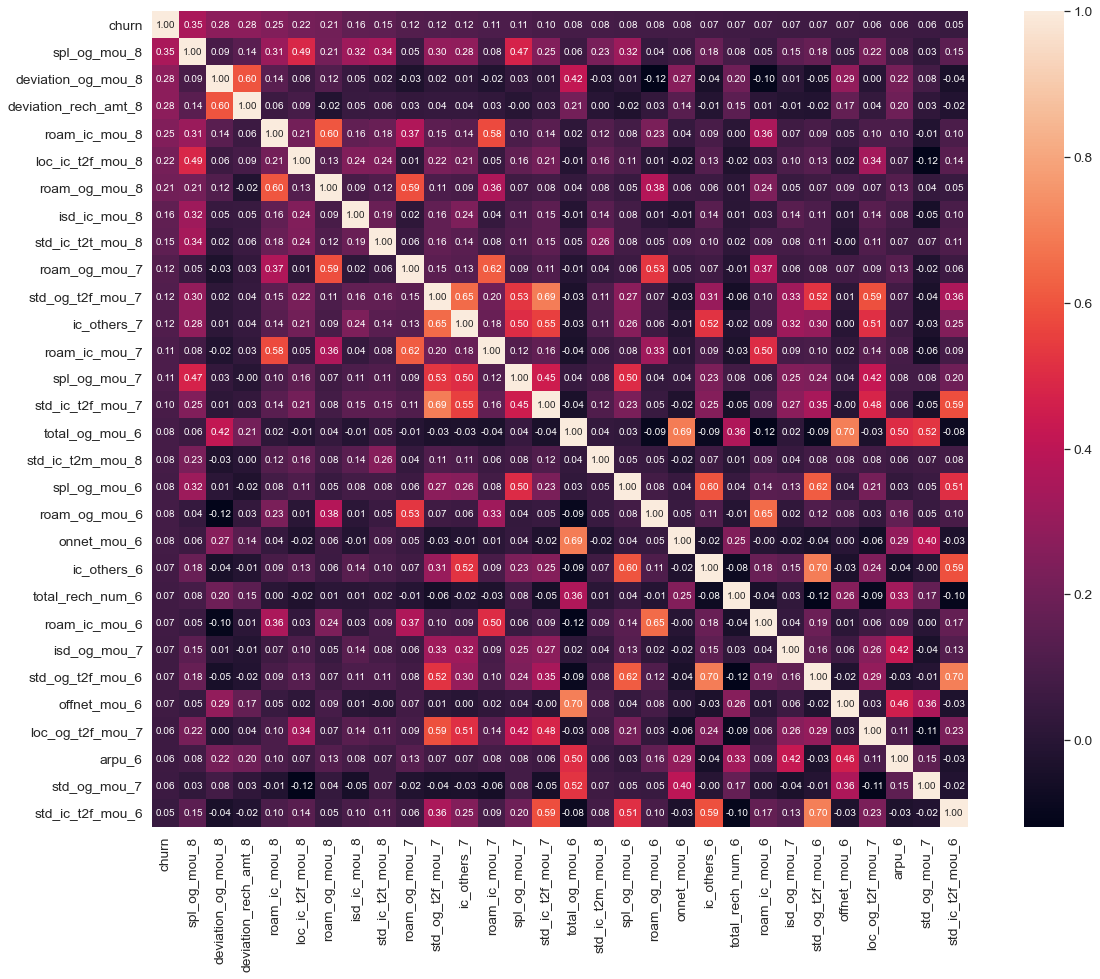

In [51]:
# Plotting the correlation matrix and creating the heatmap
corrmat = tele_hv.corr()
k = 30
cols = corrmat.nlargest(k, 'churn')['churn'].index
cm = np.corrcoef(tele_hv[cols].values.T)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [52]:
# Checking the shape
tele_hv.shape

(30011, 109)

In [53]:
# Dropping the date columns
tele_hv.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)

### Handing outliers

In [54]:
# Dropping the target variable for outlier treatment
cols = tele_hv.drop('churn', axis=1)
ncols = cols.columns

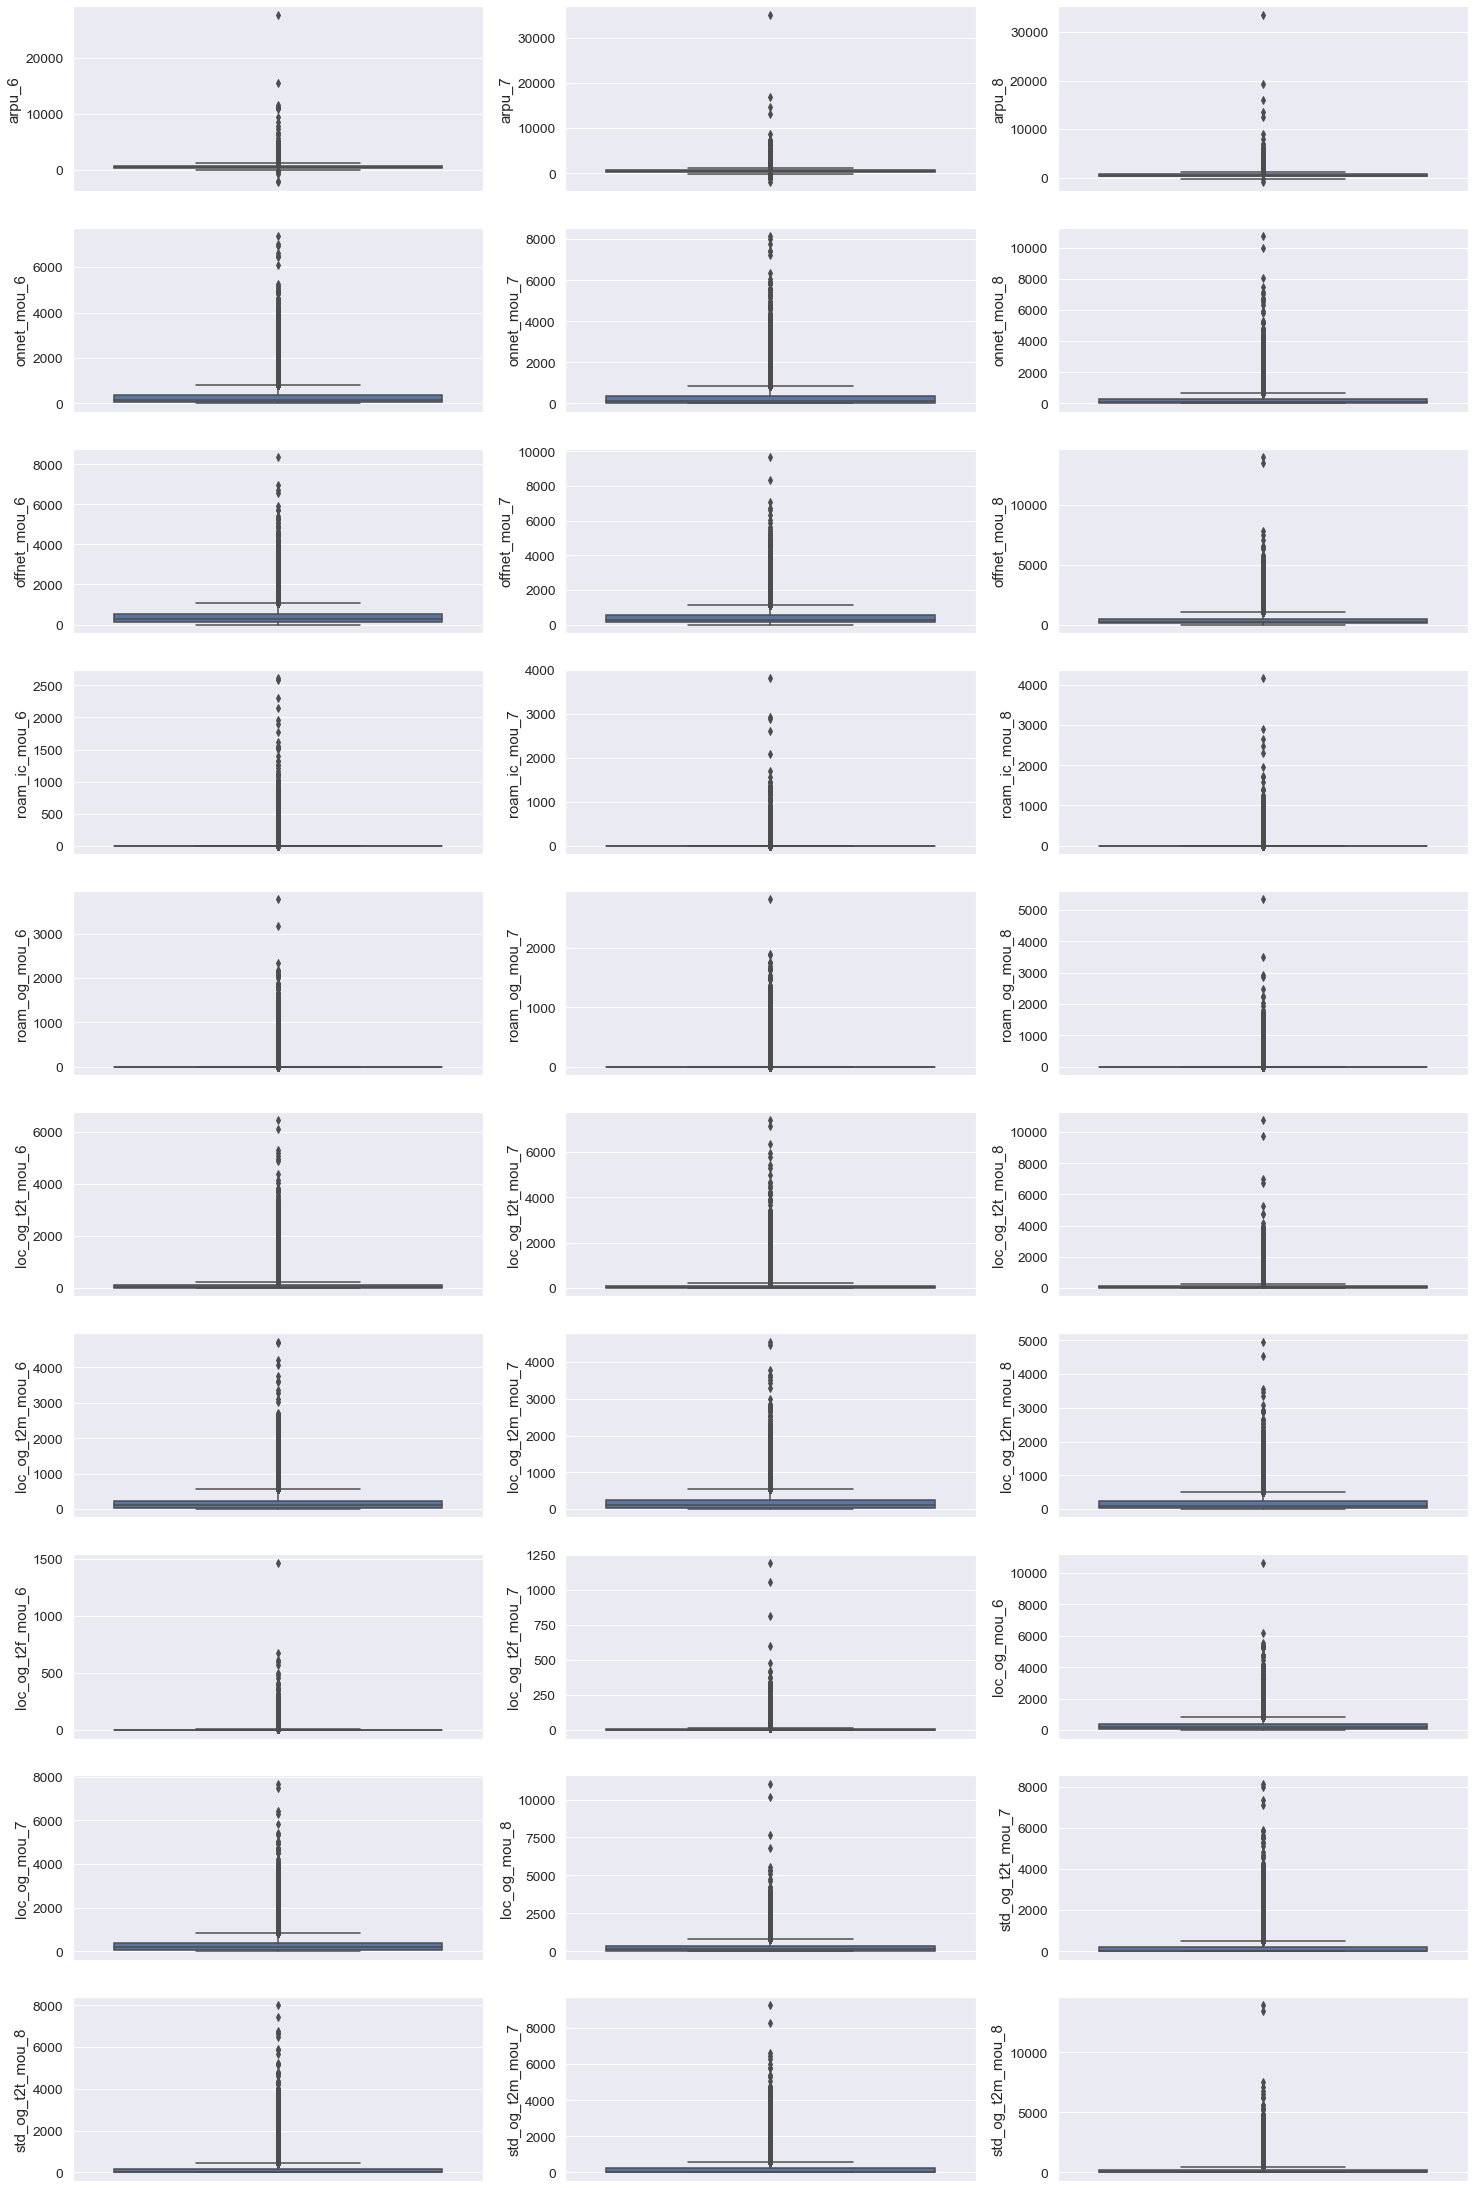

In [55]:
# Plotting the heatmap
plt.figure(figsize=(25,40))
for i in enumerate(ncols[0:30]):
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(tele_hv[i[1]], orient='v')

In [56]:
# Performing soft capping for treating the outliers
for i in ncols[0:30]:
    q1 = tele_hv[i].quantile(0.01)
    q2 = tele_hv[i].quantile(0.99)
    tele_hv[i][tele_hv[i]<=q1] = q1
    tele_hv[i][tele_hv[i]>=q2] = q2

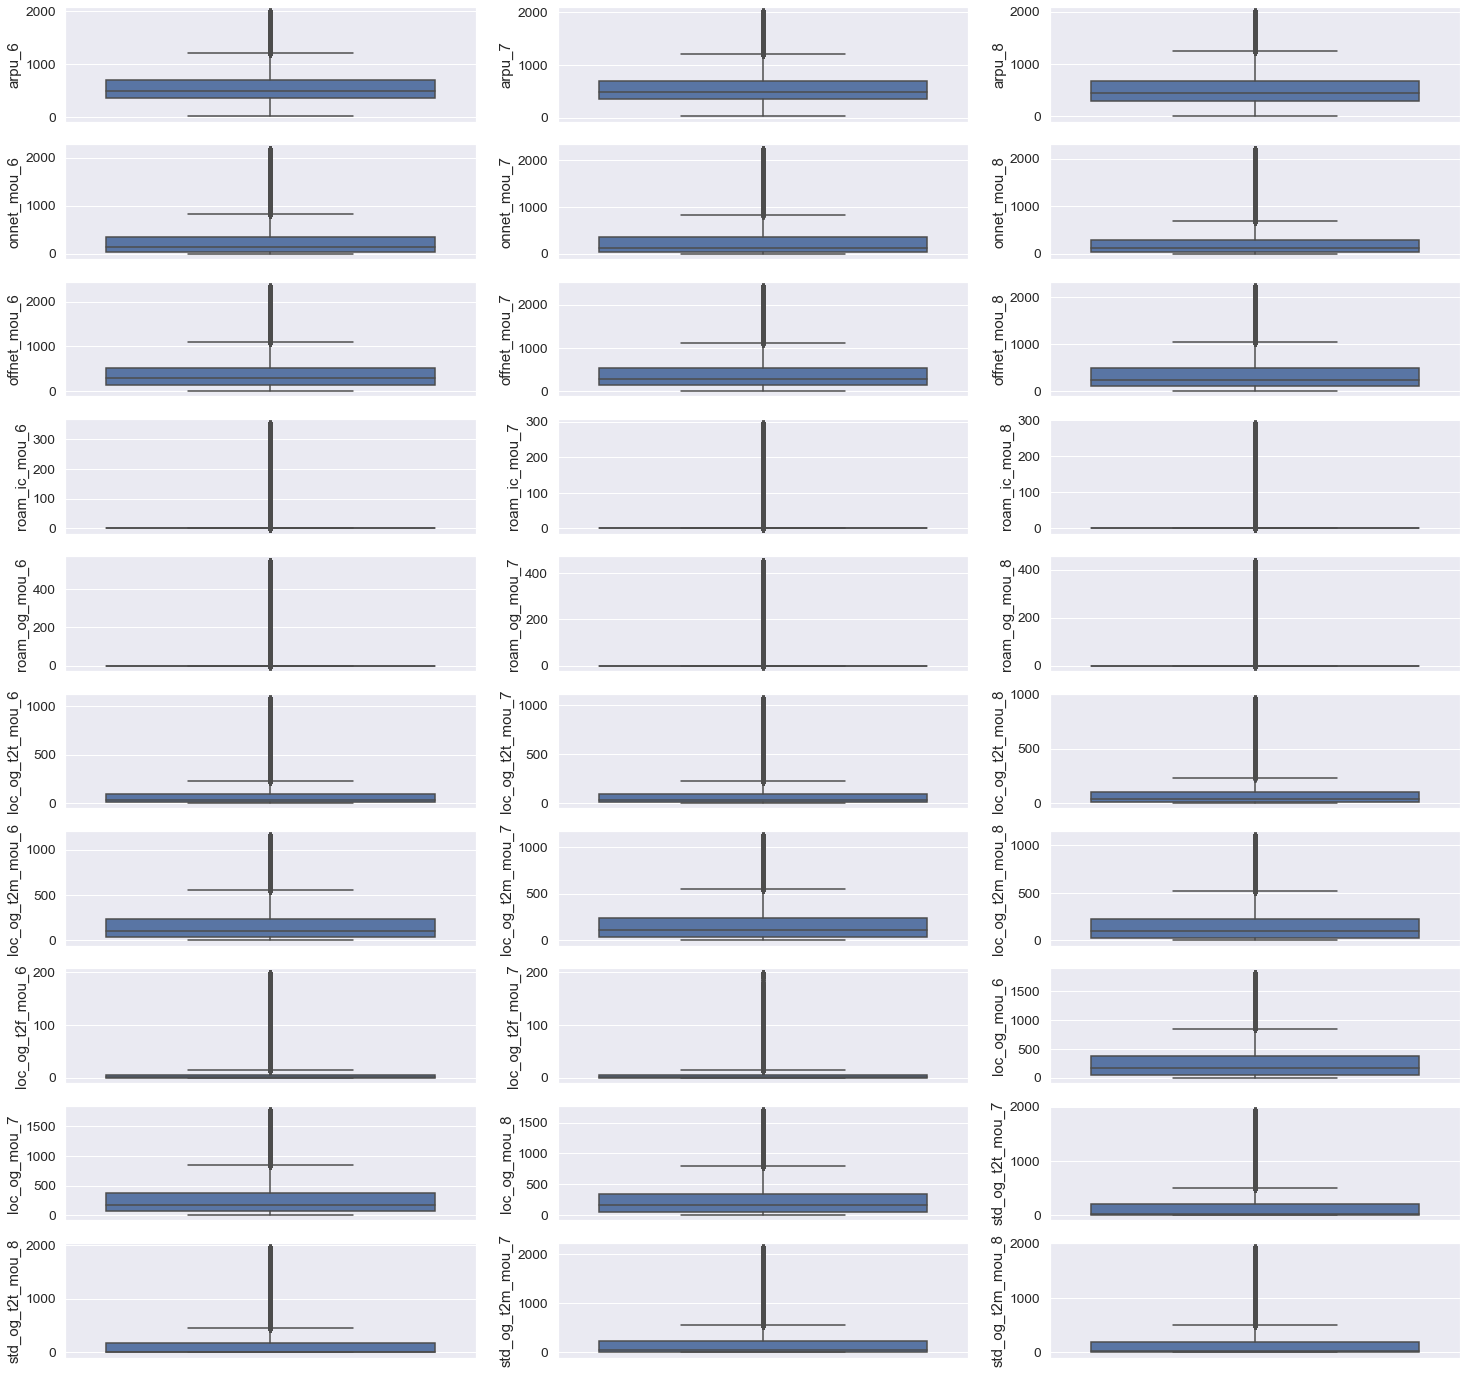

In [57]:
# Plotting the heatmap
plt.figure(figsize=(25,40))
for i in enumerate(ncols[0:30]):
    plt.subplot(16,3,i[0]+1)
    sns.boxplot(tele_hv[i[1]], orient='v')

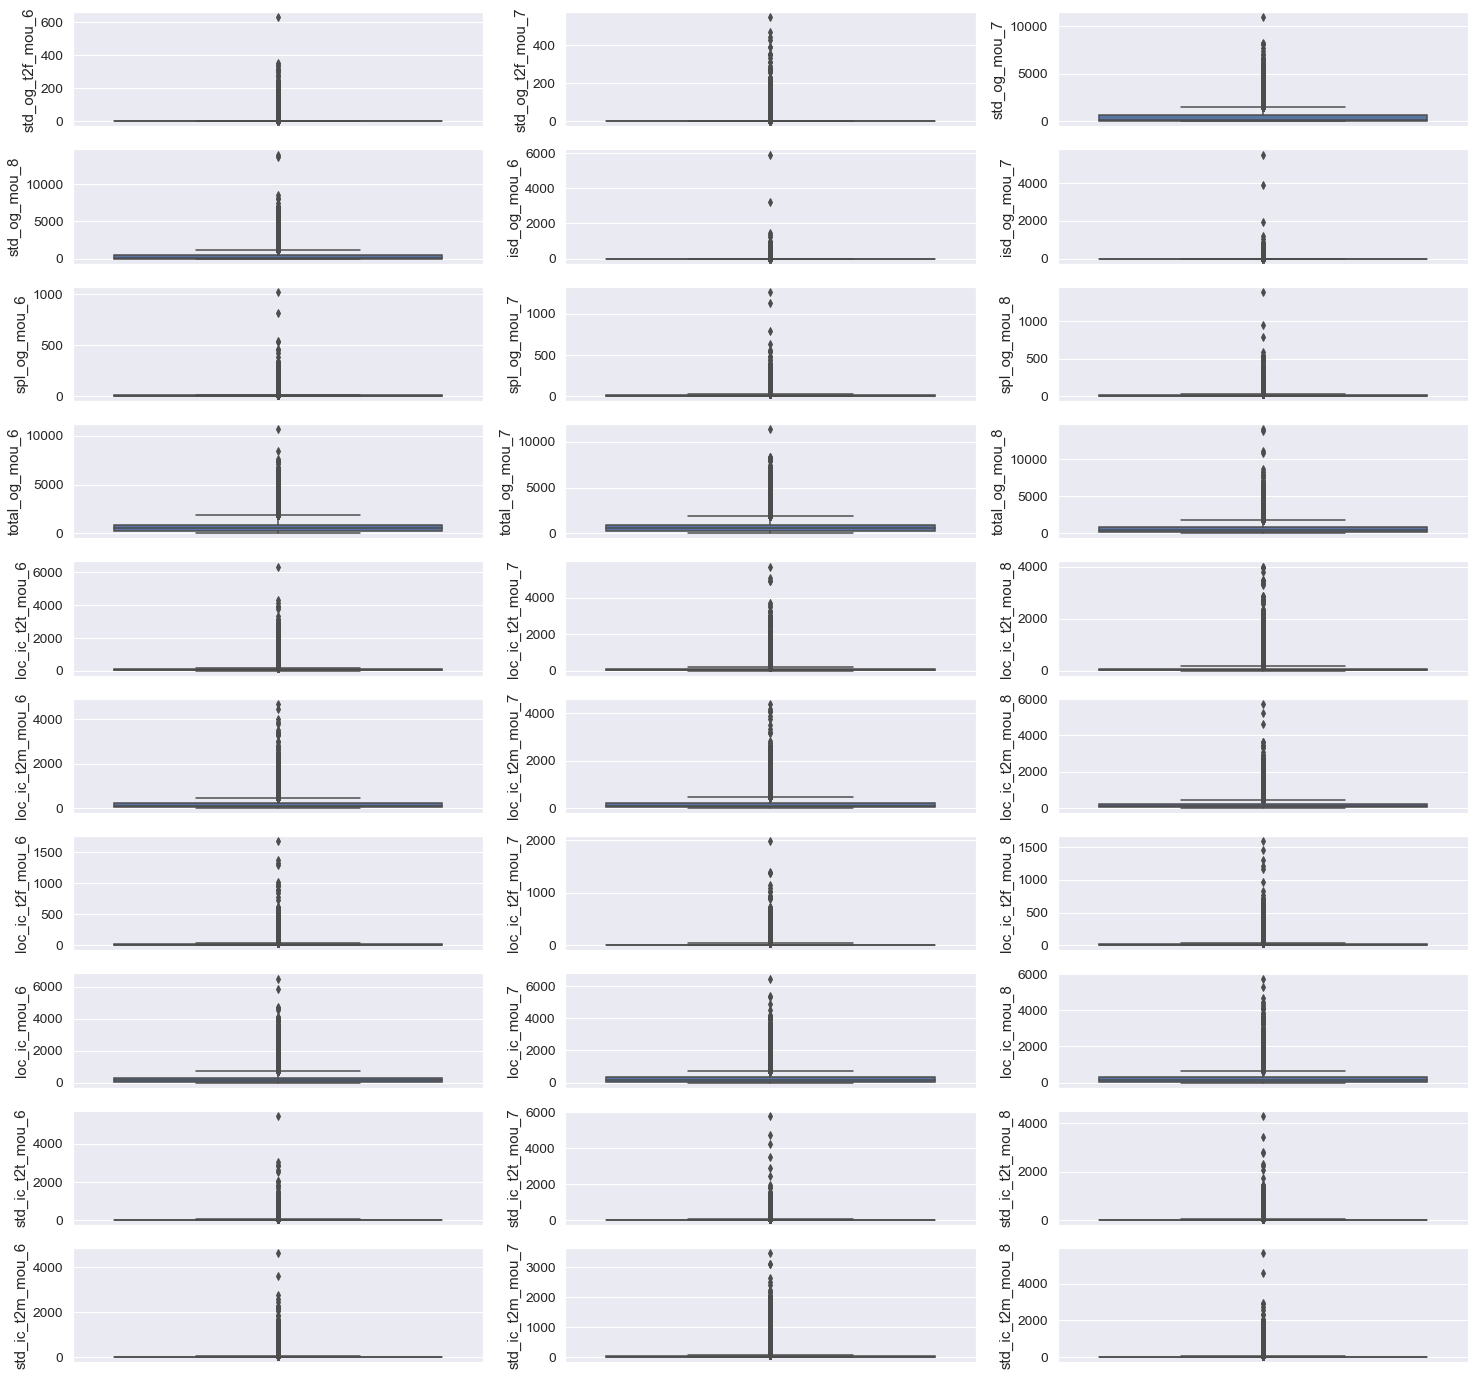

In [58]:
# Plotting the heatmap
plt.figure(figsize=(25,40))
for i in enumerate(ncols[30:60]):
    plt.subplot(16,3,i[0]+1)
    sns.boxplot(tele_hv[i[1]], orient='v')

In [59]:
# Performing soft capping for treating the outliers
for i in ncols[30:60]:
    q1 = tele_hv[i].quantile(0.01)
    q2 = tele_hv[i].quantile(0.99)
    tele_hv[i][tele_hv[i]<=q1] = q1
    tele_hv[i][tele_hv[i]>=q2] = q2

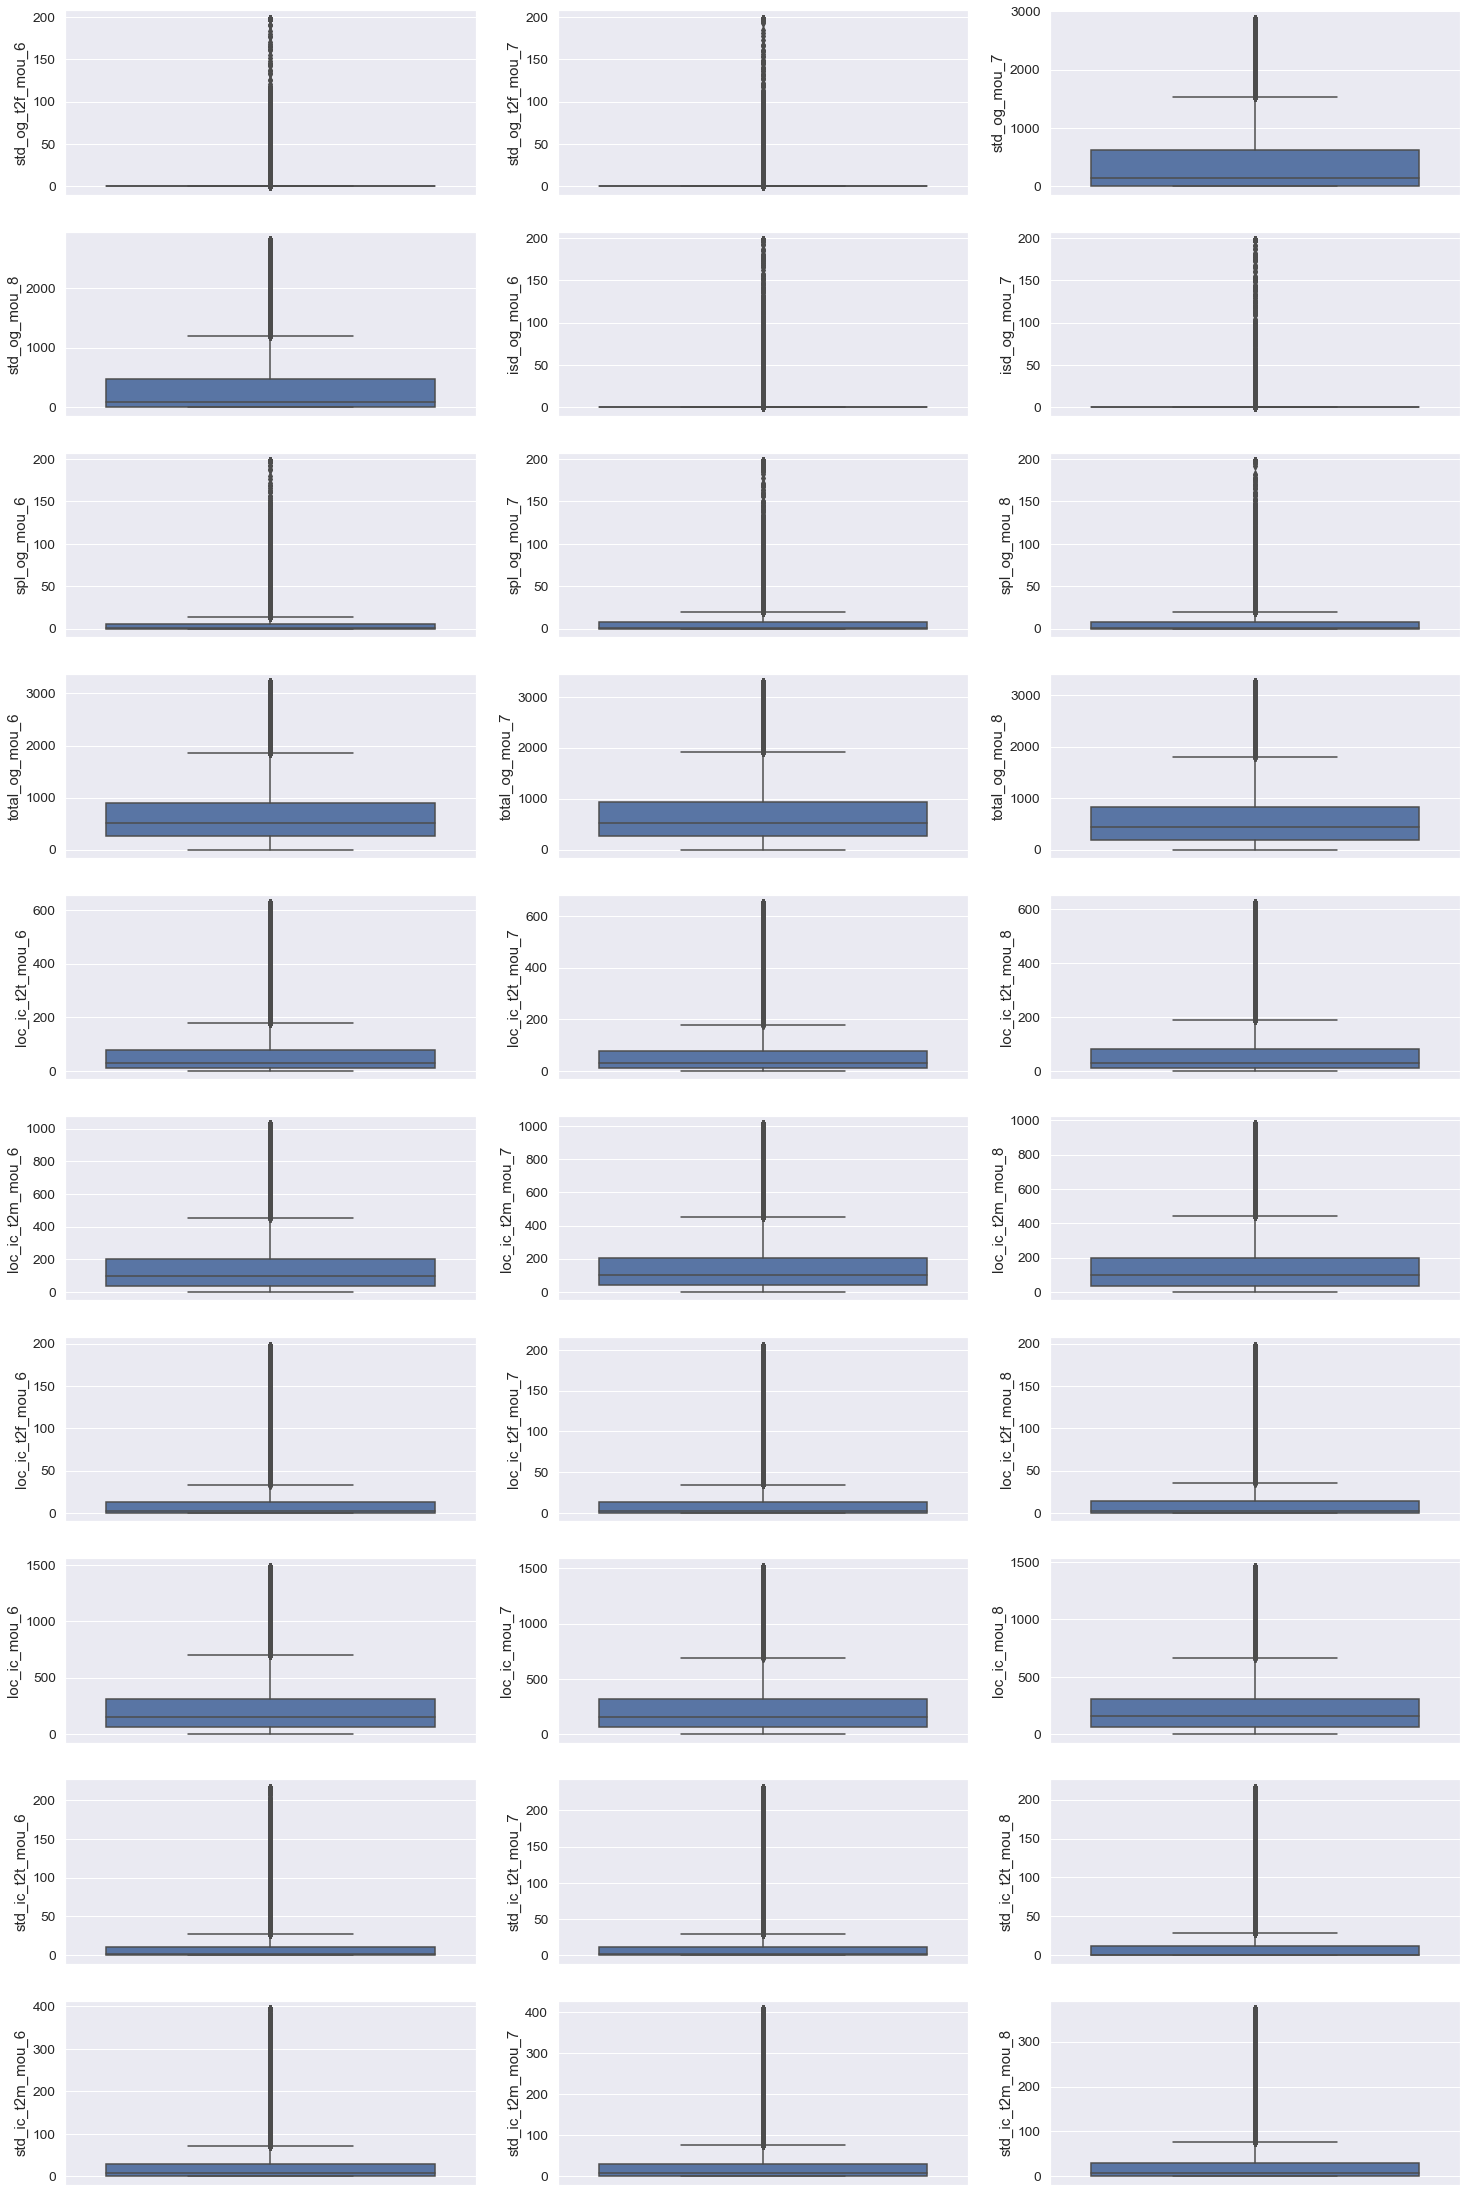

In [60]:
# Plotting the heatmap
plt.figure(figsize=(25,40))
for i in enumerate(ncols[30:60]):
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(tele_hv[i[1]], orient='v')

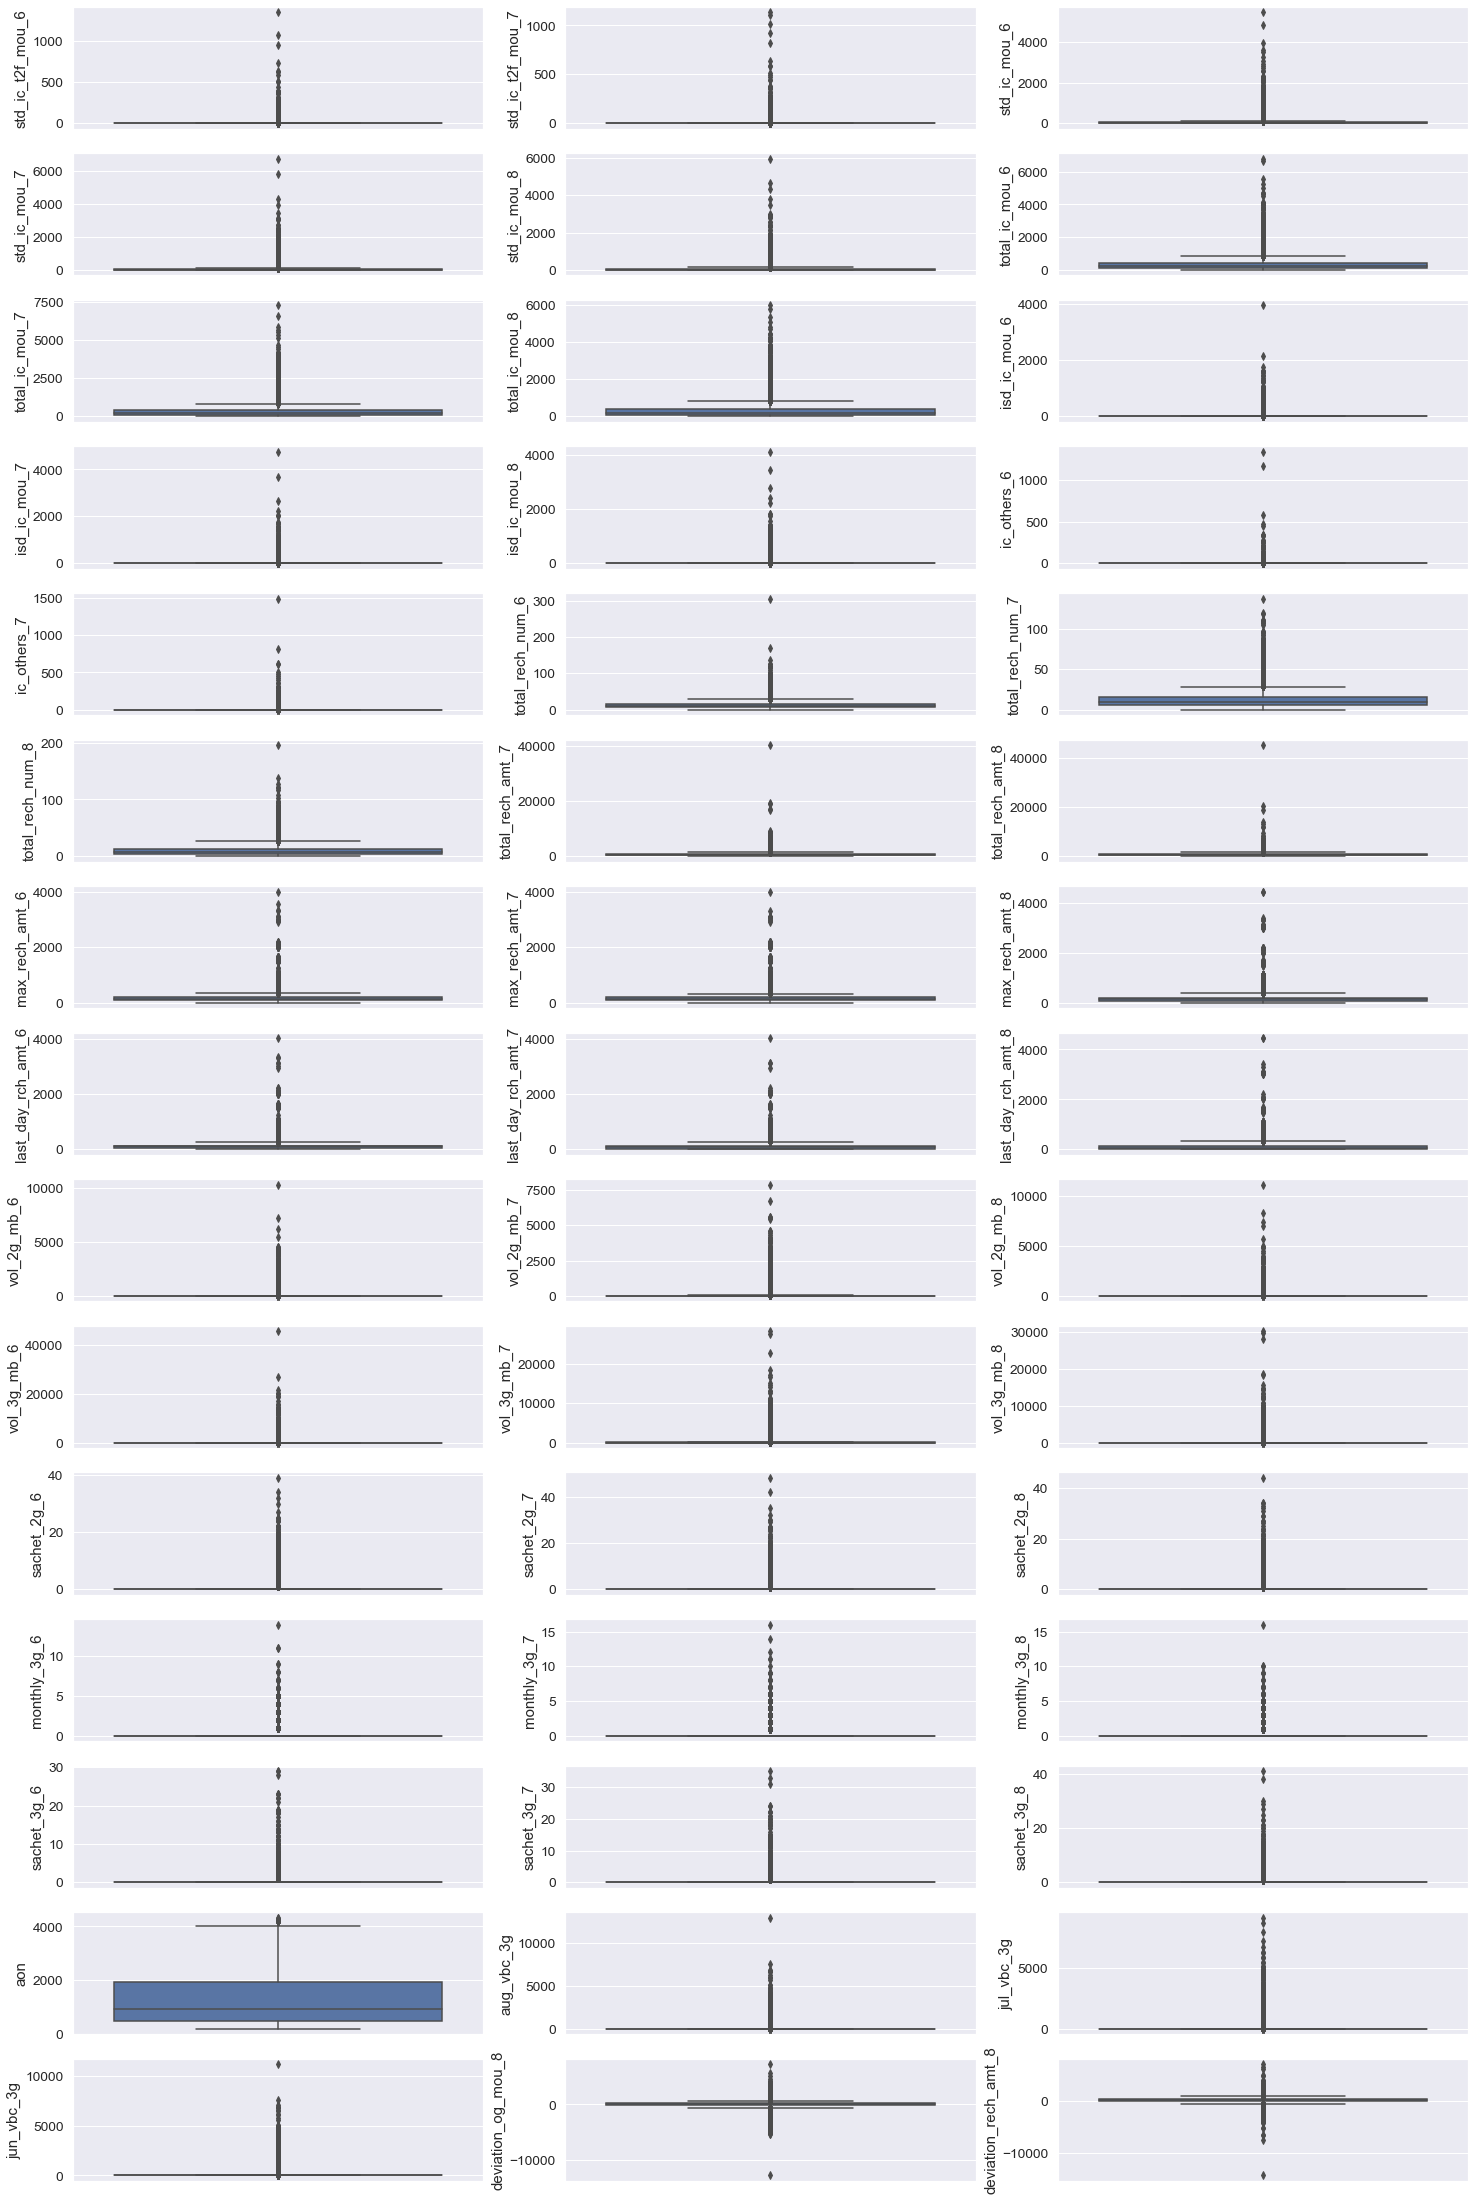

In [61]:
# Plotting the heatmap
plt.figure(figsize=(25,40))
for i in enumerate(ncols[60:]):
    plt.subplot(15,3,i[0]+1)
    sns.boxplot(tele_hv[i[1]], orient='v')

In [62]:
# Performing soft capping for treating the outliers
for i in ncols[60:]:
    q1 = tele_hv[i].quantile(0.01)
    q2 = tele_hv[i].quantile(0.99)
    tele_hv[i][tele_hv[i]<=q1] = q1
    tele_hv[i][tele_hv[i]>=q2] = q2

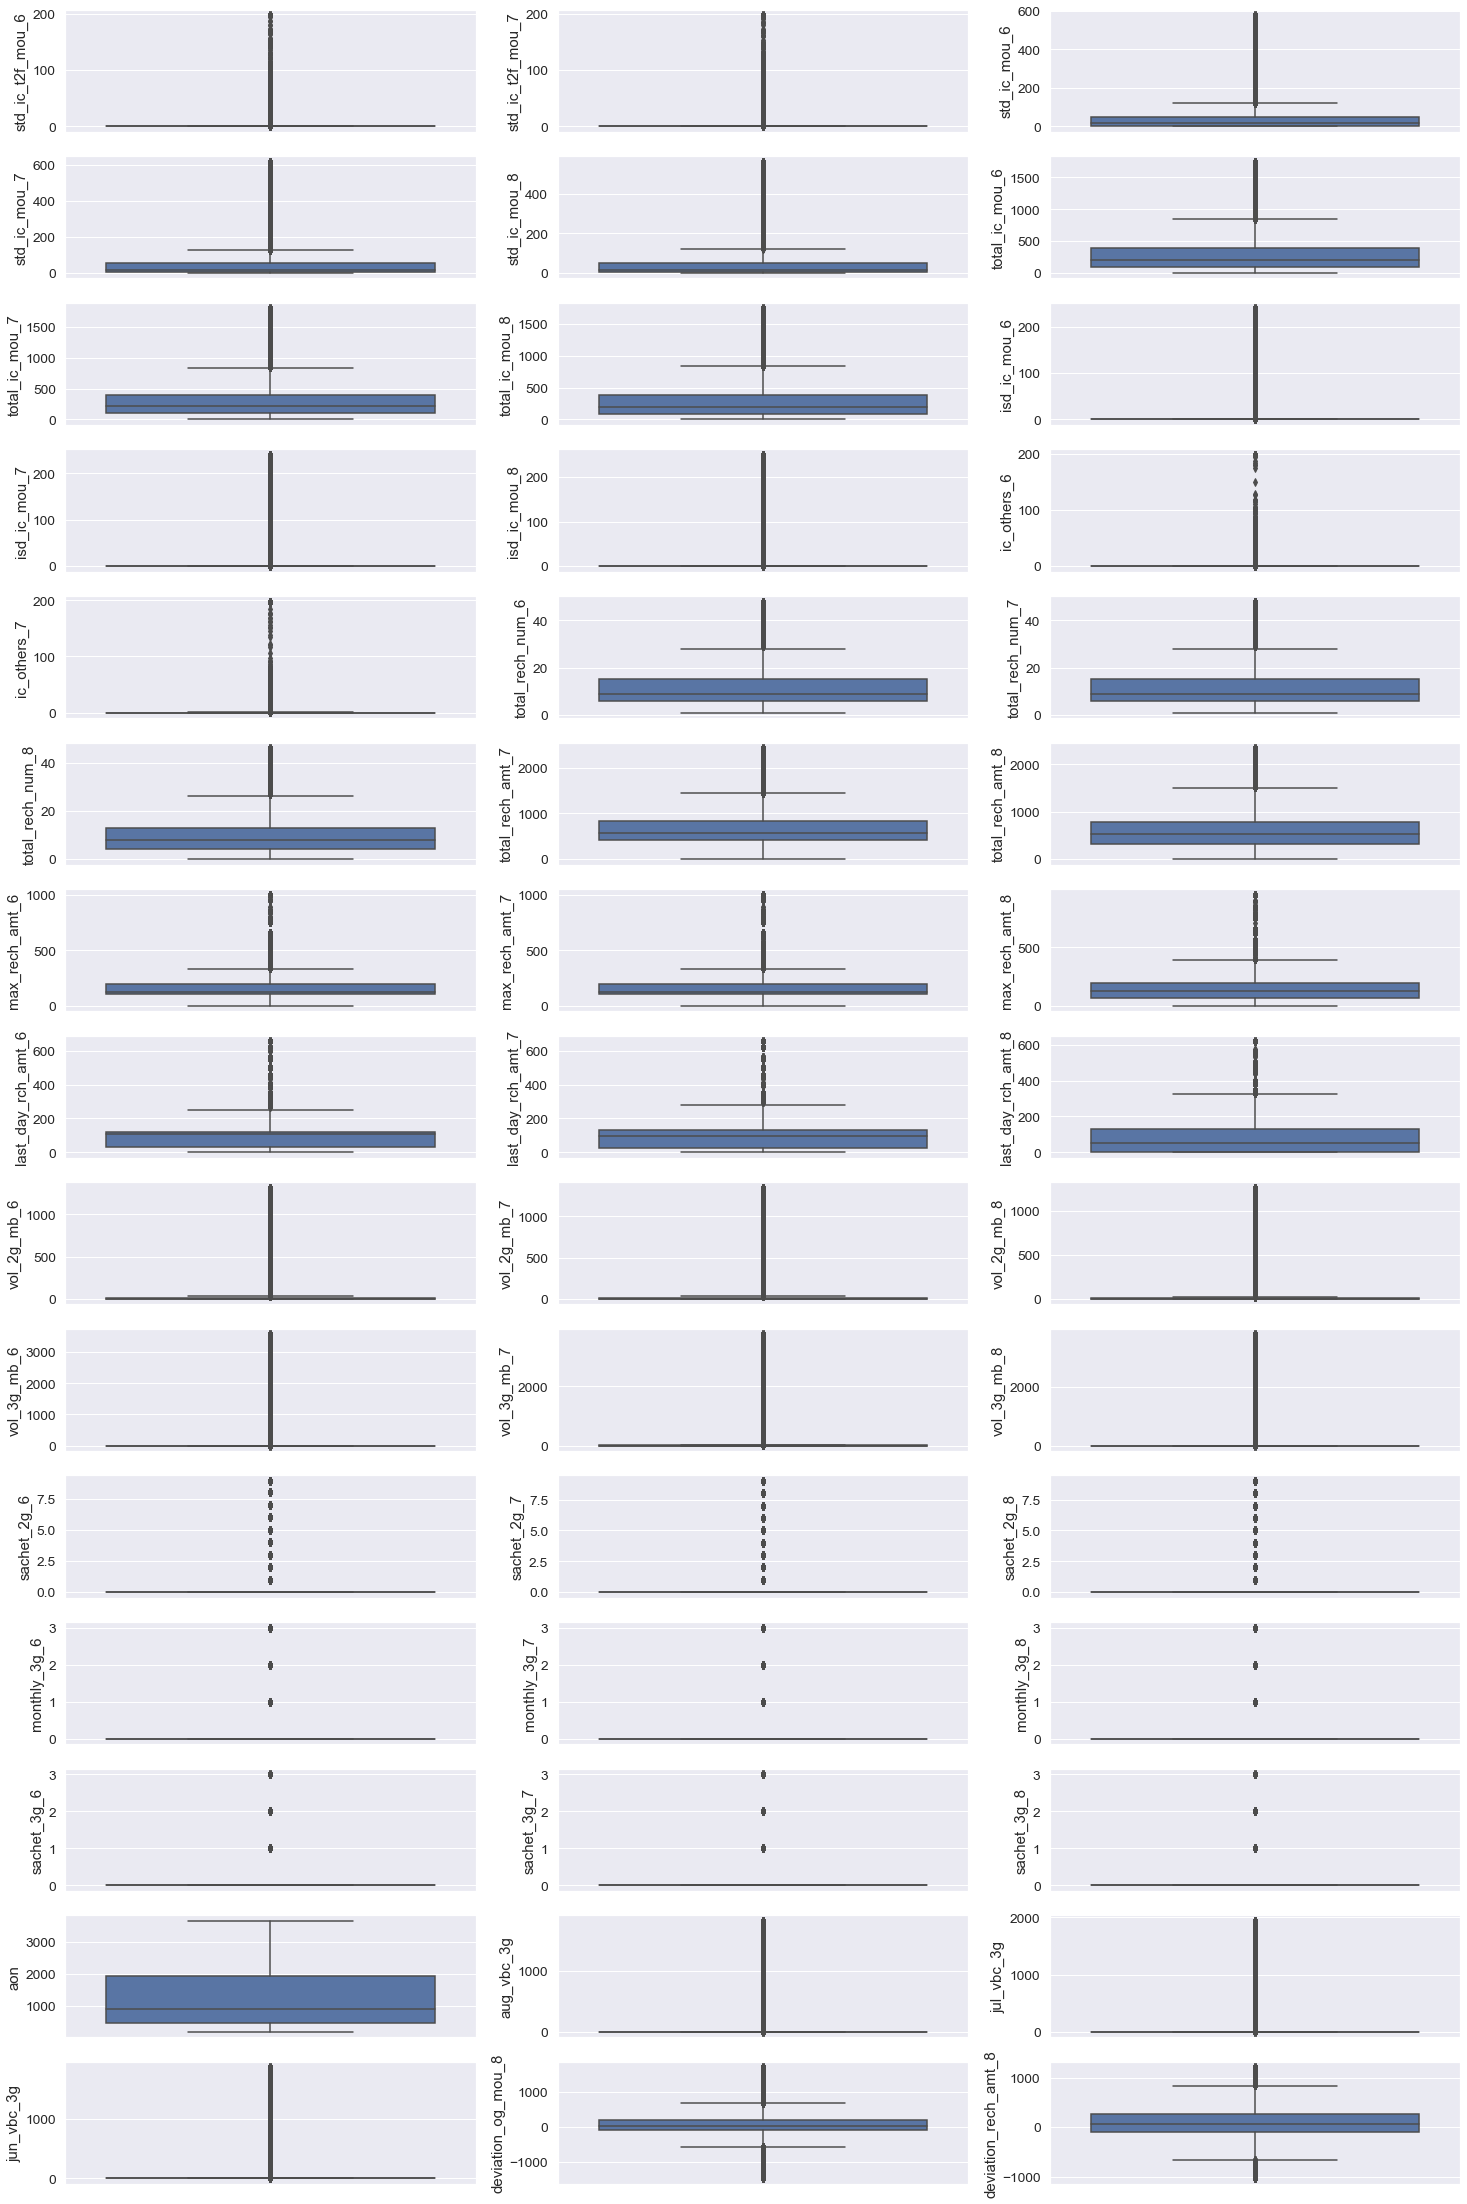

In [63]:
# Plotting the heatmap
plt.figure(figsize=(25,40))
for i in enumerate(ncols[60:]):
    plt.subplot(15,3,i[0]+1)
    sns.boxplot(tele_hv[i[1]], orient='v')

## Exploratory Data Analysis

### Bivariate analysis of categorical and continous variable

In [64]:
# Comparing Churn with Age on Network
plt.figure(figsize=(7,4))

sns.boxplot(tele_hv['churn'], tele_hv['aon'])
plt.title('Churn vs Age on Network')
plt.show()

It is observed that median age on network of the churn customers are low as compared to that of non-churn customers

In [65]:
# Comparing churn with arpu_6, arpu_7 and arpu_8
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(tele_hv['churn'], tele_hv['arpu_6'])
plt.title('Churn vs arpu_6')

plt.subplot(1,3,2)
sns.boxplot(tele_hv['churn'], tele_hv['arpu_7'])
plt.title('Churn vs arpu_7')

plt.subplot(1,3,3)
sns.boxplot(tele_hv['churn'], tele_hv['arpu_8'])
plt.title('Churn vs arpu_8')
plt.show()

It is observed that average revenue per user in the action period (i.e., 8th month) is very low 

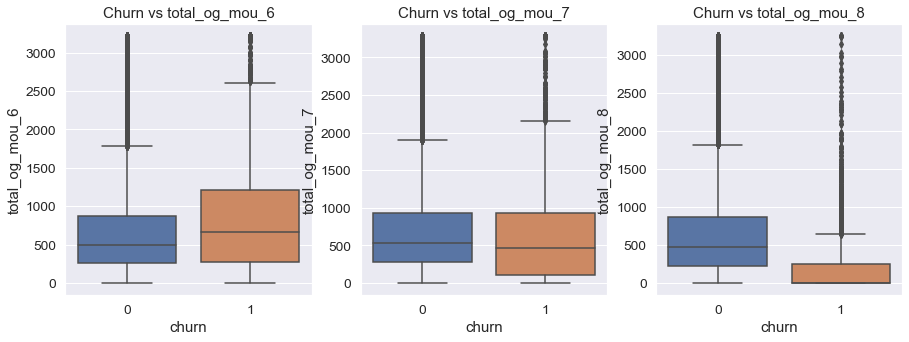

In [66]:
# Comparing churn with total_og_mou_6, total_og_mou_7 and total_og_mou_8
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(tele_hv['churn'], tele_hv['total_og_mou_6'])
plt.title('Churn vs total_og_mou_6')

plt.subplot(1,3,2)
sns.boxplot(tele_hv['churn'], tele_hv['total_og_mou_7'])
plt.title('Churn vs total_og_mou_7')

plt.subplot(1,3,3)
sns.boxplot(tele_hv['churn'], tele_hv['total_og_mou_8'])
plt.title('Churn vs total_og_mou_8')
plt.show()

It is observed that the total outgoing minutes of usage for non-churn customers remains constant in both good and action phases whereas for churn customers it decreases.

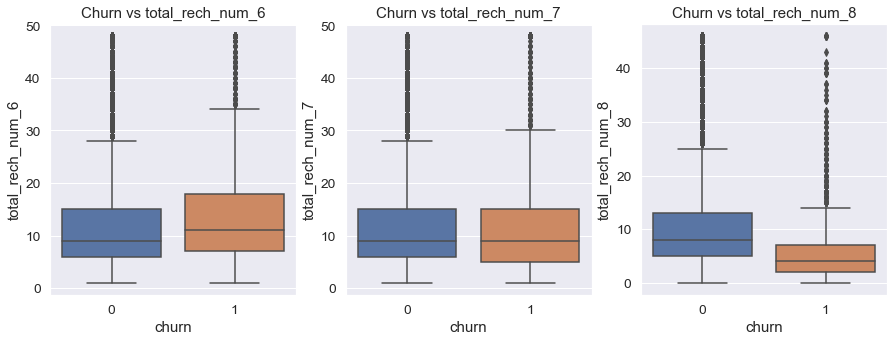

In [67]:
# Comparing churn with total_rech_num_6, total_rech_num_7 and total_rech_num_8
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(tele_hv['churn'], tele_hv['total_rech_num_6'])
plt.title('Churn vs total_rech_num_6')

plt.subplot(1,3,2)
sns.boxplot(tele_hv['churn'], tele_hv['total_rech_num_7'])
plt.title('Churn vs total_rech_num_7')

plt.subplot(1,3,3)
sns.boxplot(tele_hv['churn'], tele_hv['total_rech_num_8'])
plt.title('Churn vs total_rech_num_8')
plt.show()

It is observed that number of recharges decreases for churn customers whereas remains constant for non-churn customers

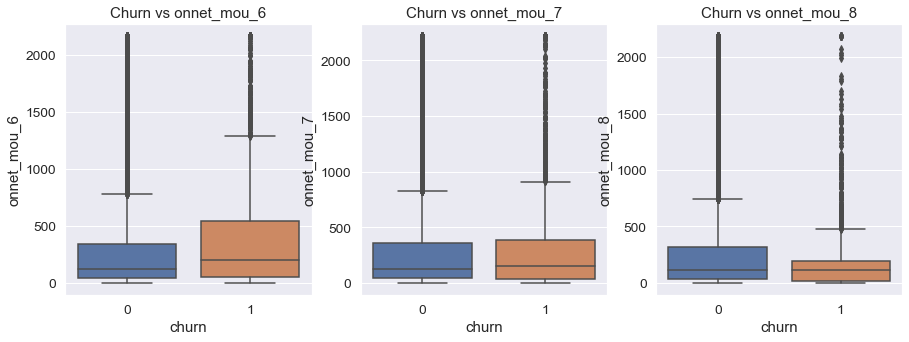

In [68]:
# Comparing churn with onnet_mou_6, onnet_mou_7 and onnet_mou_8
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(tele_hv['churn'], tele_hv['onnet_mou_6'])
plt.title('Churn vs onnet_mou_6')

plt.subplot(1,3,2)
sns.boxplot(tele_hv['churn'], tele_hv['onnet_mou_7'])
plt.title('Churn vs onnet_mou_7')

plt.subplot(1,3,3)
sns.boxplot(tele_hv['churn'], tele_hv['onnet_mou_8'])
plt.title('Churn vs onnet_mou_8')
plt.show()

Here too, for churn customers, the onnet minutes of usage decreases and for non-churn customers it almost remins constant

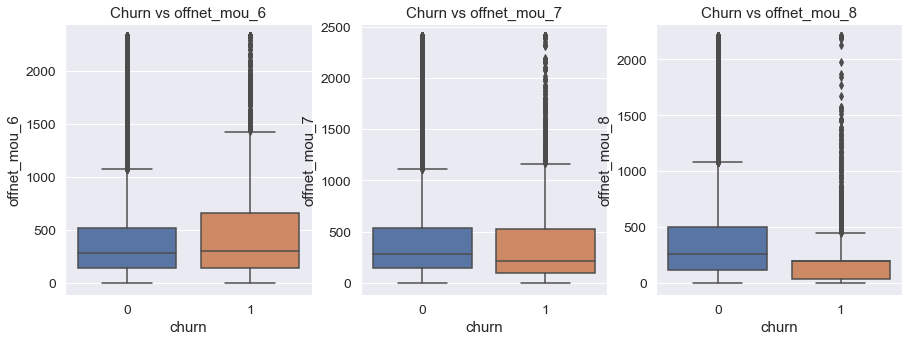

In [69]:
# Comparing churn with offnet_mou_6, offnet_mou_7 and offnet_mou_8
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(tele_hv['churn'], tele_hv['offnet_mou_6'])
plt.title('Churn vs offnet_mou_6')

plt.subplot(1,3,2)
sns.boxplot(tele_hv['churn'], tele_hv['offnet_mou_7'])
plt.title('Churn vs offnet_mou_7')

plt.subplot(1,3,3)
sns.boxplot(tele_hv['churn'], tele_hv['offnet_mou_8'])
plt.title('Churn vs offnet_mou_8')
plt.show()

Here too, for churn customers, the offnet minutes of usage decreases and for non-churn customers it almost remins constant

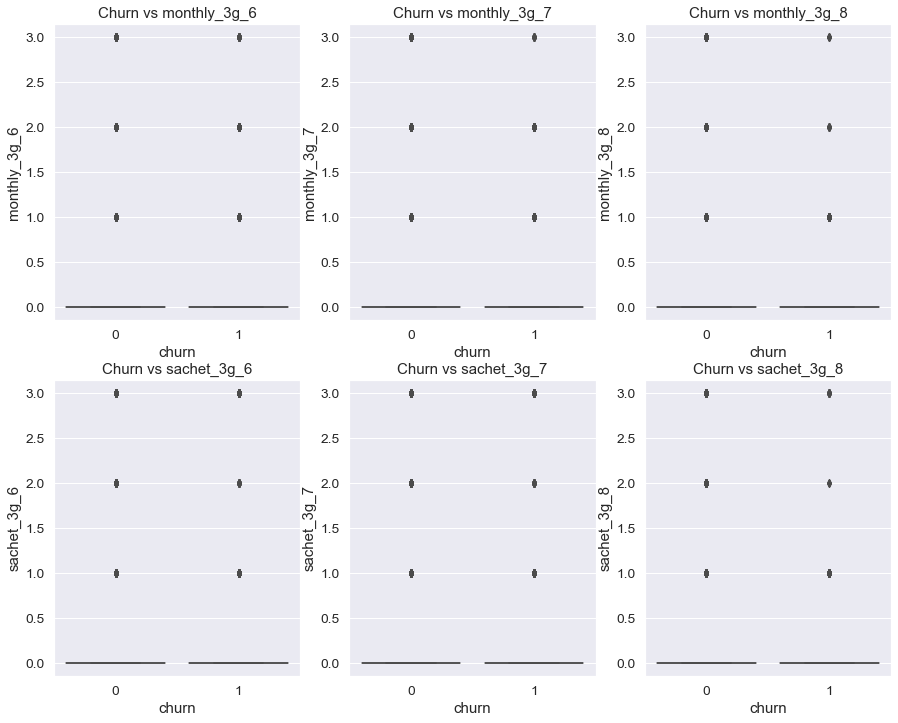

In [70]:
# Comparing churn with monthly_3g_6, monthly_3g_7, monthly_3g_8, sachet_3g_6, sachet_3g_7 and sachet_3g_8
plt.figure(figsize=(15,12))

plt.subplot(2,3,1)
sns.boxplot(tele_hv['churn'], tele_hv['monthly_3g_6'])
plt.title('Churn vs monthly_3g_6')

plt.subplot(2,3,2)
sns.boxplot(tele_hv['churn'], tele_hv['monthly_3g_7'])
plt.title('Churn vs monthly_3g_7')

plt.subplot(2,3,3)
sns.boxplot(tele_hv['churn'], tele_hv['monthly_3g_8'])
plt.title('Churn vs monthly_3g_8')

plt.subplot(2,3,4)
sns.boxplot(tele_hv['churn'], tele_hv['sachet_3g_6'])
plt.title('Churn vs sachet_3g_6')

plt.subplot(2,3,5)
sns.boxplot(tele_hv['churn'], tele_hv['sachet_3g_7'])
plt.title('Churn vs sachet_3g_7')

plt.subplot(2,3,6)
sns.boxplot(tele_hv['churn'], tele_hv['sachet_3g_8'])
plt.title('Churn vs sachet_3g_8')

plt.show()

No such pattern is observed in 3g data recharge

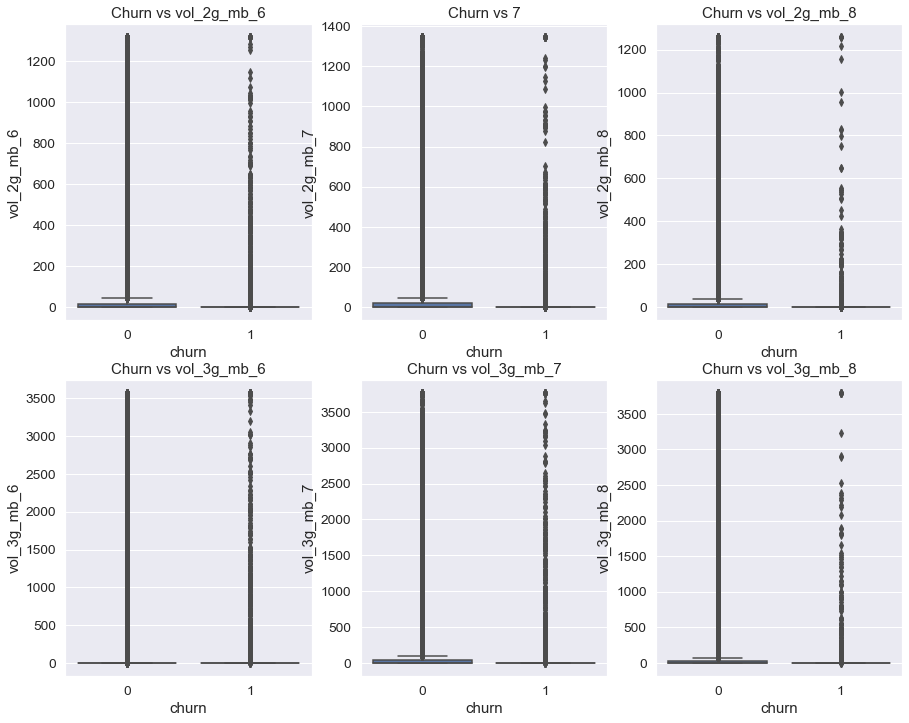

In [71]:
# Comparing churn with vol_2g_mb_6, vol_2g_mb_7, vol_2g_mb_8, vol_3g_mb_6, vol_3g_mb_7 and vol_3g_mb_8
plt.figure(figsize=(15,12))

plt.subplot(2,3,1)
sns.boxplot(tele_hv['churn'], tele_hv['vol_2g_mb_6'])
plt.title('Churn vs vol_2g_mb_6')

plt.subplot(2,3,2)
sns.boxplot(tele_hv['churn'], tele_hv['vol_2g_mb_7'])
plt.title('Churn vs 7')

plt.subplot(2,3,3)
sns.boxplot(tele_hv['churn'], tele_hv['vol_2g_mb_8'])
plt.title('Churn vs vol_2g_mb_8')

plt.subplot(2,3,4)
sns.boxplot(tele_hv['churn'], tele_hv['vol_3g_mb_6'])
plt.title('Churn vs vol_3g_mb_6')

plt.subplot(2,3,5)
sns.boxplot(tele_hv['churn'], tele_hv['vol_3g_mb_7'])
plt.title('Churn vs vol_3g_mb_7')

plt.subplot(2,3,6)
sns.boxplot(tele_hv['churn'], tele_hv['vol_3g_mb_8'])
plt.title('Churn vs vol_3g_mb_8')

plt.show()

No such pattern in observed

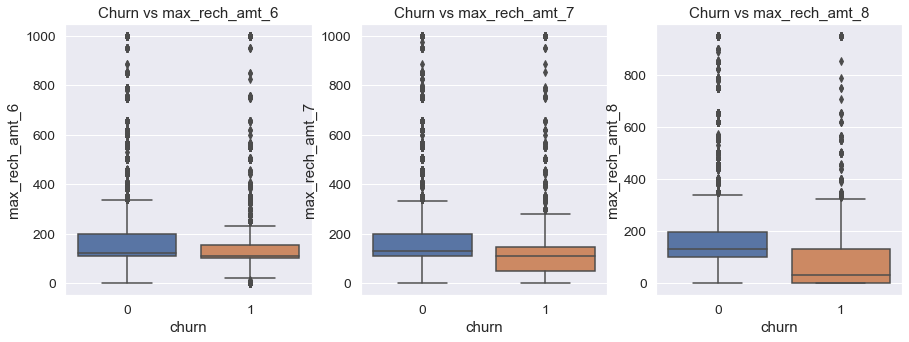

In [72]:
# Comparing churn with max_rech_amt_6, max_rech_amt_7 and max_rech_amt_8
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(tele_hv['churn'], tele_hv['max_rech_amt_6'])
plt.title('Churn vs max_rech_amt_6')

plt.subplot(1,3,2)
sns.boxplot(tele_hv['churn'], tele_hv['max_rech_amt_7'])
plt.title('Churn vs max_rech_amt_7')

plt.subplot(1,3,3)
sns.boxplot(tele_hv['churn'], tele_hv['max_rech_amt_8'])
plt.title('Churn vs max_rech_amt_8')
plt.show()

The median of maximum recharge amount decreases for churn customers whereas for non-churn customers it slightly increases

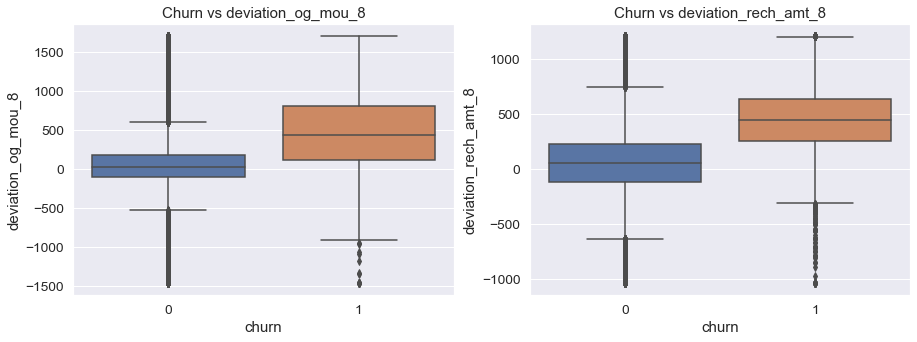

In [73]:
# Comparing churn with deviation_og_mou_8 and deviation_rech_amt_8
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(tele_hv['churn'], tele_hv['deviation_og_mou_8'])
plt.title('Churn vs deviation_og_mou_8')

plt.subplot(1,2,2)
sns.boxplot(tele_hv['churn'], tele_hv['deviation_rech_amt_8'])
plt.title('Churn vs deviation_rech_amt_8')

plt.show()

For churn customers, deviation of both of outgoing and average recharge amount in the action phase from the  mean of the respective columns in good phase increases in negative direction.

### Univariate Analysis of Continous variables

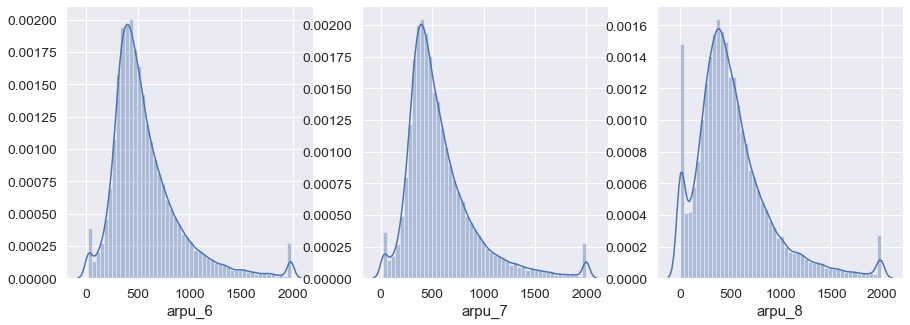

In [74]:
# Comparing 'arpu_6', 'arpu_7' and 'arpu_8'
col1 = ['arpu_6', 'arpu_7', 'arpu_8']
plt.figure(figsize = (15,5))
for i in enumerate(col1):
    plt.subplot(1,3,i[0]+1)
    sns.distplot(tele_hv[i[1]])

It is observed that maximum average revenue per user is around 500 in both good and action phase

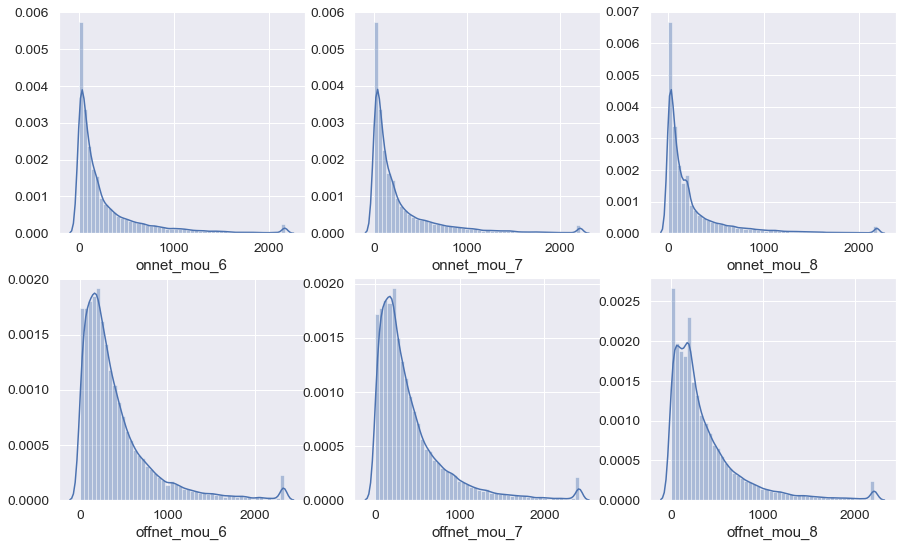

In [75]:
# Comparing 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7' and 'offnet_mou_8'
col2 = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
plt.figure(figsize = (15,9))
for i in enumerate(col2):
    plt.subplot(2,3,i[0]+1)
    sns.distplot(tele_hv[i[1]])

Onnet and offnet usage are left skewed for botht the phases. It is also observed that onnet minutes of usage ia lower than offnet minutes of usage

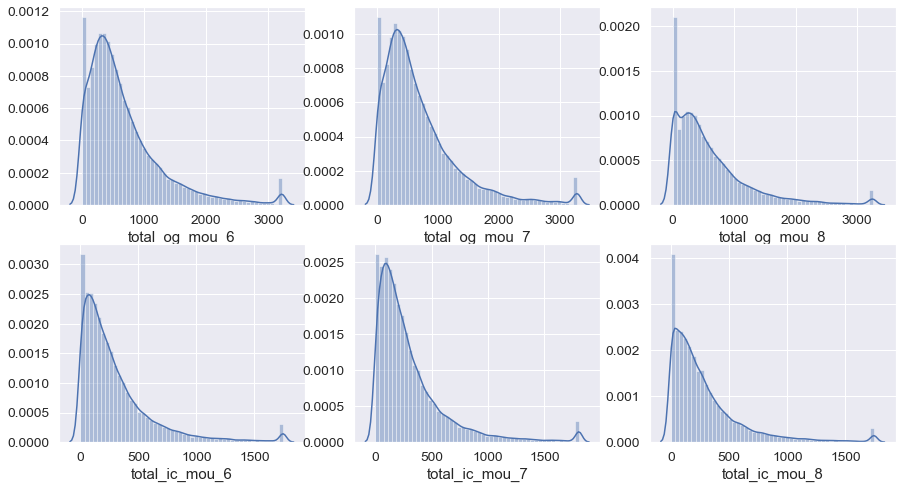

In [76]:
# Comparing 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7' and 'total_ic_mou_8'
col3 = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
plt.figure(figsize = (15,8))
for i in enumerate(col3):
    plt.subplot(2,3,i[0]+1)
    sns.distplot(tele_hv[i[1]])

Outgoing minutes of usage for good phase is mainly around 500 minutes and that of action phase is less than 500 minutes.Also incoming calls in the action phase reduced significantly as compared to that of good phase.

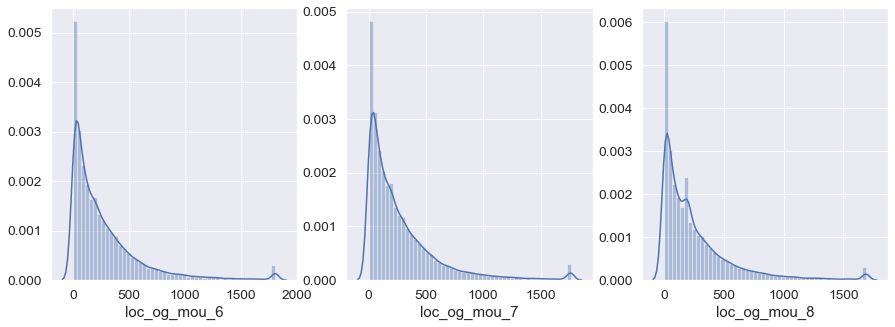

In [77]:
# Comparing 'loc_og_mou_6', 'loc_og_mou_7' and 'loc_og_mou_8'
col4 = ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8']
plt.figure(figsize = (15,5))
for i in enumerate(col4):
    plt.subplot(1,3,i[0]+1)
    sns.distplot(tele_hv[i[1]])

Local outgoing minutes of usage is almost same for both good and action phase.

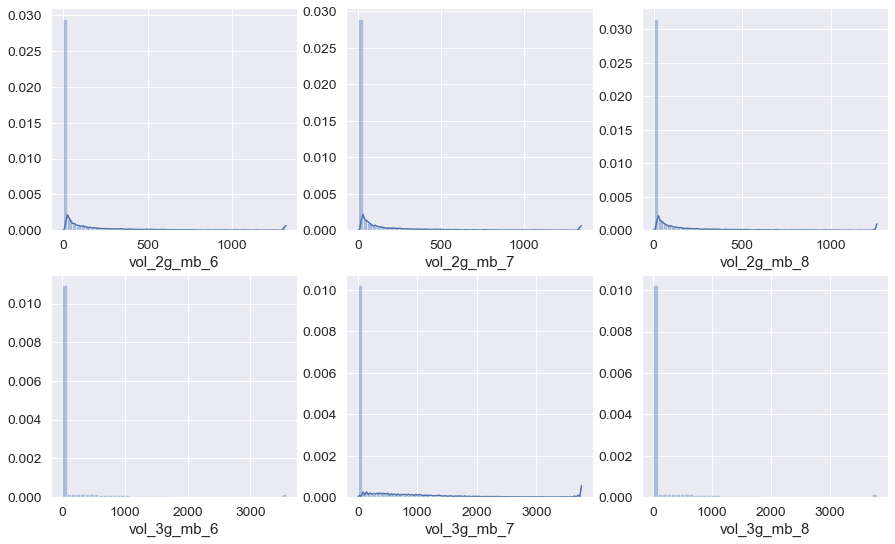

In [78]:
# Comparing 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7' and 'vol_3g_mb_8'
col5 = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']
plt.figure(figsize = (15,9))
for i in enumerate(col5):
    plt.subplot(2,3,i[0]+1)
    sns.distplot(tele_hv[i[1]])

Both 2g and 3g data usage doesn't show a significant pattern in both the phases

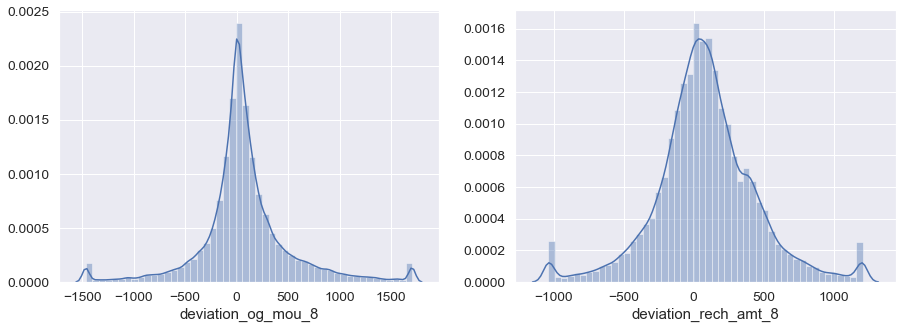

In [79]:
# Comparing 'deviation_og_mou_8' and 'deviation_rech_amt_8'
col6 = ['deviation_og_mou_8', 'deviation_rech_amt_8']
plt.figure(figsize = (15,5))
for i in enumerate(col6):
    plt.subplot(1,2,i[0]+1)
    sns.distplot(tele_hv[i[1]])

It is observed that deviation of outgoing calls mou of the action from the average of that of the good phase and the deviation of the recharge amount of the action phase from the average of that of the good phase are almost noramlly distributed

### Bivariate Analysis of Continous Variables vs Continous Variables 

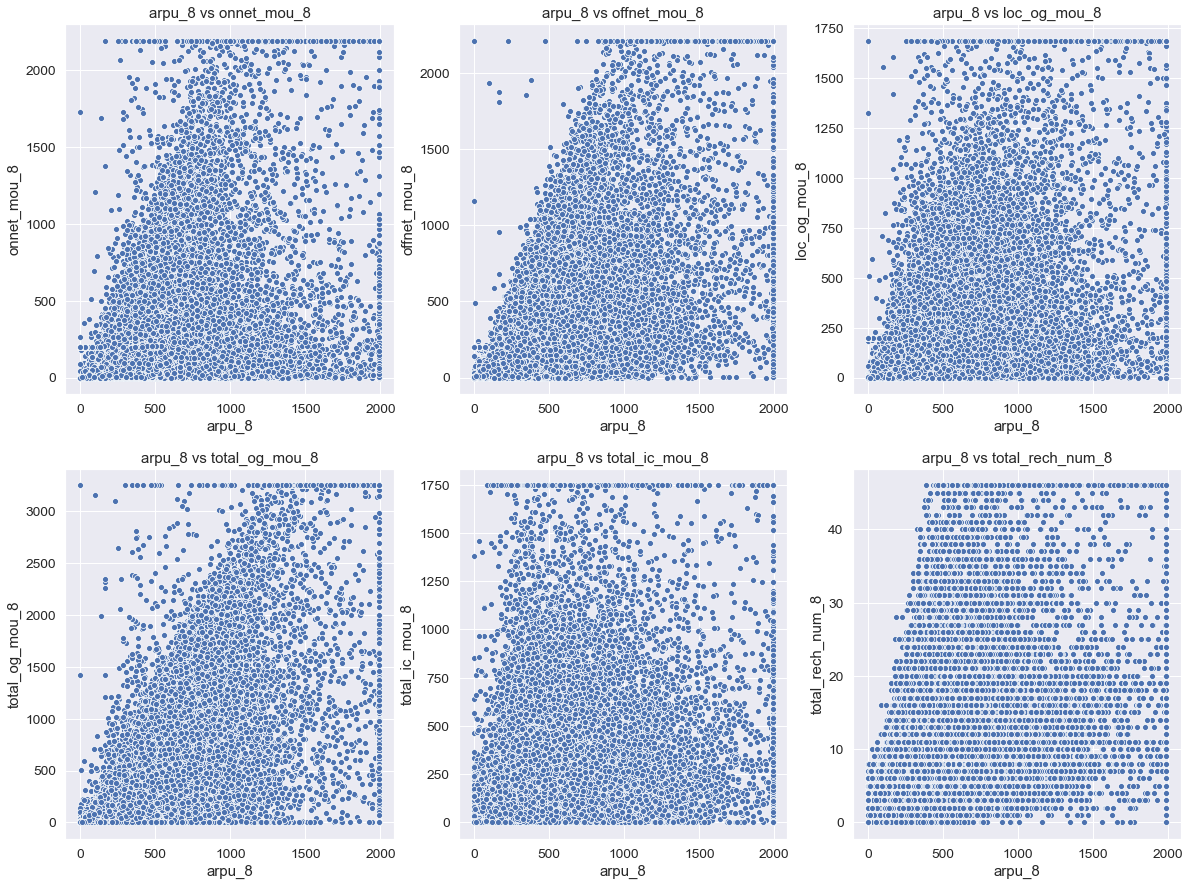

In [80]:
# Comparing arpu_8 w.r.t. 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_8'
c = ['onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_8']
plt.figure(figsize=(20,15))
for i in enumerate(c):
    plt.subplot(2,3,i[0]+1)
    sns.scatterplot(tele_hv['arpu_8'], tele_hv[i[1]])
    plt.title('arpu_8 vs ' + i[1])

For the action phase, average revenue per user shows an increasing pattern for all the variables except total incoming mou, which is almost randomly distributed.

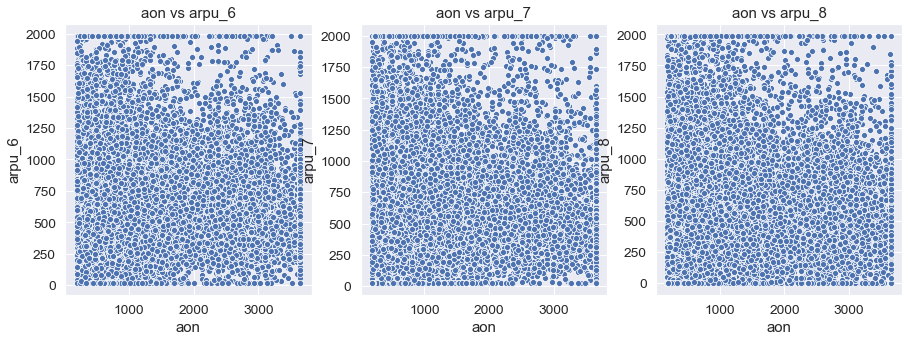

In [81]:
# Comparing aon w.r.t 'arpu_6', 'arpu_7' and 'arpu_8'
c = ['arpu_6', 'arpu_7', 'arpu_8']
plt.figure(figsize=(15,5))
for i in enumerate(c):
    plt.subplot(1,3,i[0]+1)
    sns.scatterplot(tele_hv['aon'], tele_hv[i[1]])
    plt.title('aon vs ' + i[1])

Average age on network is randomly distributed with the average revenue per user for both the phases

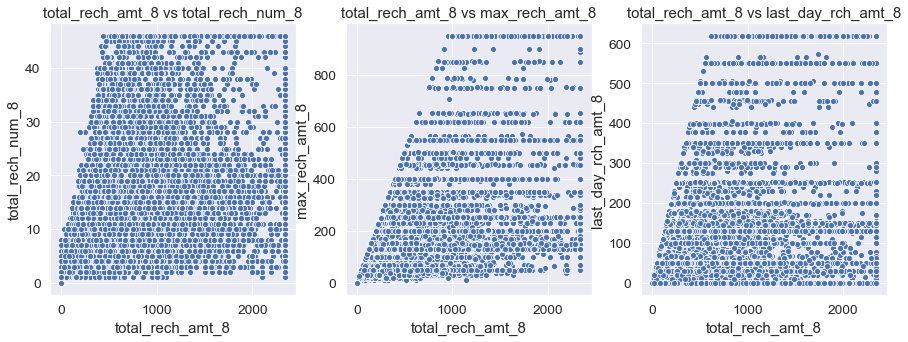

In [82]:
# Comparing total_rech_amt_8 w.r.t 'total_rech_num_8', 'max_rech_amt_8' and 'last_day_rch_amt_8'
c = ['total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8']
plt.figure(figsize=(15,5))
for i in enumerate(c):
    plt.subplot(1,3,i[0]+1)
    sns.scatterplot(tele_hv['total_rech_amt_8'], tele_hv[i[1]])
    plt.title('total_rech_amt_8 vs ' + i[1])

Total recharge amount for the action phase shows an increasing pattern with all the variables

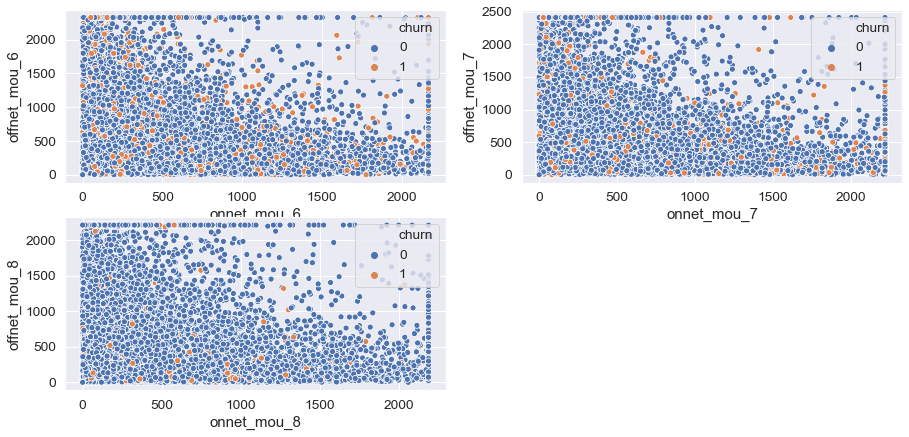

In [83]:
# Comparing onnet and offnet minutes of usage of both good and action phase w.r.t. churn
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.scatterplot(tele_hv['onnet_mou_6'], tele_hv['offnet_mou_6'], hue=tele_hv['churn'])

plt.subplot(2,2,2)
sns.scatterplot(tele_hv['onnet_mou_7'], tele_hv['offnet_mou_7'], hue=tele_hv['churn'])

plt.subplot(2,2,3)
sns.scatterplot(tele_hv['onnet_mou_8'], tele_hv['offnet_mou_8'], hue=tele_hv['churn'])
plt.show()

It is observed that for churn customers both onnet and offnet minutes of usage decreases

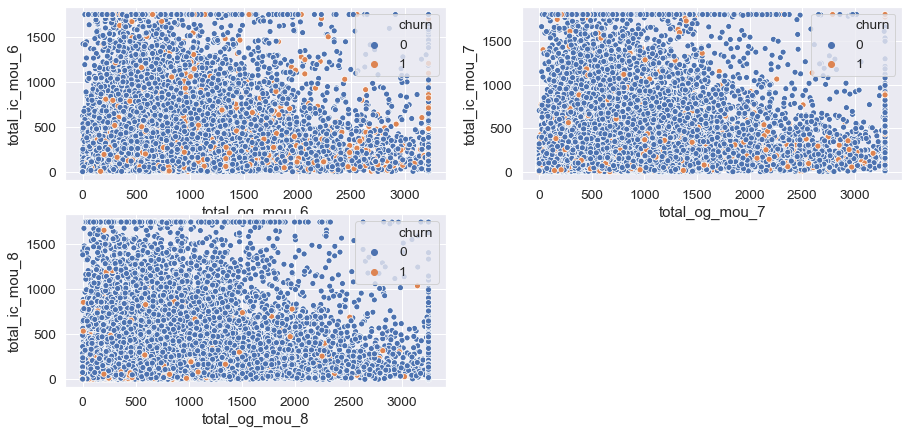

In [84]:
# Comparing total incoming and outgoing of all phases w.r.t. churn
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.scatterplot(tele_hv['total_og_mou_6'], tele_hv['total_ic_mou_6'], hue=tele_hv['churn'])

plt.subplot(2,2,2)
sns.scatterplot(tele_hv['total_og_mou_7'], tele_hv['total_ic_mou_7'], hue=tele_hv['churn'])

plt.subplot(2,2,3)
sns.scatterplot(tele_hv['total_og_mou_8'], tele_hv['total_ic_mou_8'], hue=tele_hv['churn'])
plt.show()

Here too total outgoing and incoming minutes of usage for churn customers decreases

### Handling Data Imbalance

In [85]:
# Creating X and y
X = tele_hv.drop('churn', axis=1)
y = tele_hv['churn']

In [86]:
# Creating the object and fitting
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)

In [87]:
# Checking the value count of the target variable before applying SMOTE
y.value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [88]:
# Checking the value count of the target variable after applying SMOTE
y_smote.value_counts()

1    27418
0    27418
Name: churn, dtype: int64

In [89]:
# Checking the shape
y_smote.shape

(54836,)

In [90]:
# Checking the shape
X_smote.shape

(54836, 105)

### Creating train_test split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30, random_state=42)

In [92]:
print(X_train.shape)
print(X_test.shape)

(38385, 105)
(16451, 105)


In [93]:
print(y_train.shape)
print(y_test.shape)

(38385,)
(16451,)


### Scaling the dataset

In [94]:
# Performing scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [95]:
# Converting to dataframe
X_train = pd.DataFrame(X_train)
X_train.columns = X_smote.columns
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.823865 -0.540302  0.088548     0.170936     0.283658     1.108512   
1 -1.568252  1.560924 -0.993269    -0.376877    -0.673266    -0.052874   
2 -0.599344 -0.222420 -1.032892    -0.670850    -0.601480    -0.052874   
3 -0.493761 -0.777624  0.437095    -0.733805    -0.674360    -0.603717   
4 -0.497383 -0.523651 -0.708654     0.679300     0.390033    -0.146715   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.707859     -0.614552     -0.365361      -0.350850      -0.374550   
1     -0.546616     -0.666485     -0.256765       2.332079       0.132288   
2      0.607493      0.796441     -0.256765      -0.350850      -0.374550   
3     -0.560742     -0.681005     -0.515171      -0.350850      -0.374550   
4     -0.843035     -0.764366     -0.781009       0.007327      -0.073815   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.558758      -0.366963      -0.410042      -0.591017   
1       2.055539       1.298137       0.665933       1.609523   
2       2.055539      -0.366963      -0.410042       1.609523   
3      -0.558758      -0.366963      -0.410042      -0.591017   
4      -0.558758       1.203690       0.394616      -0.591017   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.511372         -0.511644         -0.615178         -0.643721   
1          0.580589         -0.512256          0.978522          0.116122   
2         -0.490460         -0.504437          0.978522         -0.647938   
3         -0.498436         -0.484933         -0.571808         -0.656514   
4         -0.449278          0.005411         -0.486284         -0.729357   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.632697         -0.345960         -0.304908         -0.308375   
1         -0.672848          0.399452          4.914224         -0.247497   
2         -0.697220          0.399452         -0.304908         -0.301652   
3         -0.600807         -0.670454         -0.269418         -0.308375   
4         -0.597404         -0.752079         -0.304908         -0.308375   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_7  \
0     -0.681713     -0.667377     -0.448319          0.527986   
1     -0.200829     -0.685908      0.043655         -0.527277   
2     -0.674351     -0.704785      0.043655         -0.450871   
3     -0.680064     -0.633877     -0.643347         -0.538118   
4     -0.706994     -0.396253     -0.656218          0.305143   

   std_og_t2t_mou_8  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0          1.465206         -0.321008         -0.236028         -0.195591   
1          0.155738         -0.527073          0.144507          5.380141   
2          0.155738          1.275727          0.144507         -0.203641   
3         -0.488475         -0.445051         -0.371773         -0.136791   
4         -0.006657         -0.512567         -0.508002         -0.203641   

   std_og_t2f_mou_7  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0         -0.221389      0.109797      0.837256     -0.207551     -0.221617   
1         -0.203074     -0.693275     -0.186078      4.966859     -0.221617   
2         -0.221389      0.554937     -0.186078     -0.207551     -0.221617   
3         -0.221389     -0.646514     -0.457511     -0.207551     -0.221617   
4         -0.221389     -0.158615     -0.271141     -0.207551     -0.221617   

   spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  \
0     -0.237689     -0.364204     -0.487398       -0.330871       -0.189889   
1      5.142733     -0.368672      2.463912       -1.056700       -0.943870   
2     -0.271166     -0.240656      2.463912        0.026836        0.214118   
3      0.741443      0.077828     -0.008809       -0.830999       -0.853631   
4     -0.344969     -0.368672     -0.487398       -0.309

In [96]:
# Converting to dataframe
y_train=pd.DataFrame(y_train)

## Building a Logistic Regression Model for interpretation (without PCA)

### Building the Initial Model

In [97]:
logm = sm.GLM(y_train.values,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38279
Model Family:                Binomial   Df Model:                          105
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13994.
Date:                Mon, 01 Mar 2021   Deviance:                       27989.
Time:                        14:03:53   Pearson chi2:                 1.19e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1055      0.022     -4.880      0.000      -0.148      -0.063
arpu_6                  -0.0007      0.054     -0.014      0.989      -0.106       0.104
arpu_7                   0.5620      0.066      8.515      0.000       0.433       0.691
arpu_8                   0.8157      0.076     10.705      0.000       0.666       0.965
onnet_mou_6              0.2593      0.084      3.079      0.002       0.094       0.424
onnet_mou_7              0.6143      0.170      3.610      0.000       0.281       0.948
onnet_mou_8             -0.6117      0.150     -4.079      0.000      -0.906      -0.318
offnet_mou_6             0.1807      0.087      2.067      0.039       0.009       0.352
offnet_mou_7             0.5670      0.180      3.155      0.002       0.215       0.919
offnet_mou_8            -0.7419      0.131     -5.649      0.000      -0.999      -0.484
roam_ic_mou_6           -0.0471      0.035     -1.357      0.175      -0.115       0.021
roam_ic_mou_7            0.1953      0.041      4.757      0.000       0.115       0.276
roam_ic_mou_8           -0.0038      0.051     -0.074      0.941      -0.103       0.096
roam_og_mou_6           -0.0026      0.039     -0.068      0.946      -0.078       0.073
roam_og_mou_7           -0.1453      0.048     -3.023      0.003      -0.240      -0.051
roam_og_mou_8            0.5642      0.052     10.909      0.000       0.463       0.666
loc_og_t2t_mou_6         0.0251      0.093      0.271      0.787      -0.157       0.207
loc_og_t2t_mou_7        -0.4297      0.105     -4.082      0.000      -0.636      -0.223
loc_og_t2t_mou_8        -0.4084      0.131     -3.120      0.002      -0.665      -0.152
loc_og_t2m_mou_6        -0.1818      0.111     -1.633      0.103      -0.400       0.036
loc_og_t2m_mou_7        -0.6618      0.132     -4.995      0.000      -0.921      -0.402
loc_og_t2m_mou_8        -0.2964      0.162     -1.833      0.067      -0.613       0.020
loc_og_t2f_mou_6         0.1185      0.065      1.833      0.067      -0.008       0.245
loc_og_t2f_mou_7        -0.3736      0.077     -4.835      0.000      -0.525      -0.222
loc_og_mou_6            -0.0096      0.153     -0.062      0.950      -0.310       0.291
loc_og_mou_7             0.9699      0.254      3.812      0.000       0.471       1.469
loc_og_mou_8             2.0063      0.299      6.717      0.000       1.421       2.592
std_og_t2t_mou_7        -0.5720      0.161     -3.564      0.000      -0.887      -0.257
std_og_t2t_mou_8        -0.5902      0.154     -3.823      0.000      -0.893      -0.288
std_og_t2m_mou_7        -0.4160      0.170     -2.441      0.015      -0.750      -0.082
std_og_t2m_mou_8        -0.5170      0.134     -3.852      0.000      -0.780      -0.254
std_og_t2f_mou_6        -0.0816      0.071     -1.148    

### Feature Selection Using RFE

In [98]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_) 

[False False False False  True  True False False False False False False
 False False  True False False False False False False False False False
 False  True  True  True False  True False False  True  True False False
 False False  True False False  True False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False  True
 False False False False False False False False False]
[81  5 17 56  1  1 59 19  4 70 46 87 88 47  1 91 12 33 31 10 79 55 25 71
 11  1  1  1 20  1 54 66  1  1 23 61 60 90  1  8  6  1 85 68 32 30 62 34
 78 36 35 29  1  1 74 39 38 75 69 64 44 26 73 76 13 28 37 43 51 83 63 72
 77 50 22  3 21 18 48 82 52 67 53  1 84 65 24 16 42 15 40 41  2 14 45  1
 27 86 58  9 57 89 80  7 49]


In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 81),
 ('arpu_7', False, 5),
 ('arpu_8', False, 17),
 ('onnet_mou_6', False, 56),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 59),
 ('offnet_mou_7', False, 19),
 ('offnet_mou_8', False, 4),
 ('roam_ic_mou_6', False, 70),
 ('roam_ic_mou_7', False, 46),
 ('roam_ic_mou_8', False, 87),
 ('roam_og_mou_6', False, 88),
 ('roam_og_mou_7', False, 47),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 91),
 ('loc_og_t2t_mou_7', False, 12),
 ('loc_og_t2t_mou_8', False, 33),
 ('loc_og_t2m_mou_6', False, 31),
 ('loc_og_t2m_mou_7', False, 10),
 ('loc_og_t2m_mou_8', False, 79),
 ('loc_og_t2f_mou_6', False, 55),
 ('loc_og_t2f_mou_7', False, 25),
 ('loc_og_mou_6', False, 71),
 ('loc_og_mou_7', False, 11),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_7', False, 20),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 54),
 ('std_og_t2f_mou_7', False, 66),
 ('std_og_mou_7

In [100]:
# Selecting the RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_7', 'onnet_mou_8', 'roam_og_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'last_day_rch_amt_8', 'monthly_3g_8'],
      dtype='object')

### Building the 1st Model

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm, family=sm.families.Binomial())
reg = logm1.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38369
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15582.
Date:                Mon, 01 Mar 2021   Deviance:                       31164.
Time:                        14:04:46   Pearson chi2:                 4.34e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1125      0.019     -5.777      0.000      -0.151      -0.074
onnet_mou_7            1.0370      0.068     15.304      0.000       0.904       1.170
onnet_mou_8           -0.6376      0.098     -6.535      0.000      -0.829      -0.446
roam_og_mou_8          0.4744      0.023     20.860      0.000       0.430       0.519
loc_og_mou_8           1.3387      0.095     14.142      0.000       1.153       1.524
std_og_t2t_mou_7      -0.9859      0.069    -14.212      0.000      -1.122      -0.850
std_og_t2t_mou_8      -0.6925      0.116     -5.981      0.000      -0.919      -0.466
std_og_t2m_mou_8      -1.2670      0.078    -16.282      0.000      -1.420      -1.115
std_og_mou_7           0.6540      0.034     19.231      0.000       0.587       0.721
std_og_mou_8           4.9463      0.238     20.740      0.000       4.479       5.414
spl_og_mou_8           0.5723      0.045     12.686      0.000       0.484       0.661
total_og_mou_8        -4.5484      0.204    -22.331      0.000      -4.948      -4.149
loc_ic_mou_7           0.5614      0.032     17.586      0.000       0.499       0.624
loc_ic_mou_8          -1.3441      0.047    -28.530      0.000      -1.436      -1.252
last_day_rch_amt_8    -0.4862      0.019    -24.954      0.000      -0.524      -0.448
monthly_3g_8          -0.5938      0.028    -21.260      0.000      -0.649      -0.539
======================================================================================
"""

In [102]:
# Checking the VIF value
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8         std_og_mou_8  133.43
10      total_og_mou_8   67.96
5     std_og_t2t_mou_8   45.94
6     std_og_t2m_mou_8   27.11
1          onnet_mou_8   19.44
4     std_og_t2t_mou_7   16.46
3         loc_og_mou_8   16.01
0          onnet_mou_7   14.86
9         spl_og_mou_8    5.21
7         std_og_mou_7    3.68
12        loc_ic_mou_8    3.63
11        loc_ic_mou_7    2.90
2        roam_og_mou_8    1.98
13  last_day_rch_amt_8    1.26
14        monthly_3g_8    1.09

In [103]:
# Dropping 'std_og_mou_8' column because of high VIF value
col = col.drop('std_og_mou_8', 1)

### Building the 2nd Model

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm, family=sm.families.Binomial())
reg = logm2.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38370
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15804.
Date:                Mon, 01 Mar 2021   Deviance:                       31607.
Time:                        14:04:47   Pearson chi2:                 1.09e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1270      0.018     -6.879      0.000      -0.163      -0.091
onnet_mou_7            1.0380      0.068     15.332      0.000       0.905       1.171
onnet_mou_8           -0.6972      0.097     -7.151      0.000      -0.888      -0.506
roam_og_mou_8          0.5447      0.023     23.649      0.000       0.500       0.590
loc_og_mou_8          -0.1257      0.057     -2.189      0.029      -0.238      -0.013
std_og_t2t_mou_7      -1.0498      0.069    -15.151      0.000      -1.186      -0.914
std_og_t2t_mou_8       0.7654      0.099      7.723      0.000       0.571       0.960
std_og_t2m_mou_8       0.0406      0.058      0.703      0.482      -0.073       0.154
std_og_mou_7           0.7200      0.035     20.613      0.000       0.652       0.788
spl_og_mou_8           0.8933      0.040     22.208      0.000       0.815       0.972
total_og_mou_8        -1.1422      0.103    -11.083      0.000      -1.344      -0.940
loc_ic_mou_7           0.5489      0.032     17.398      0.000       0.487       0.611
loc_ic_mou_8          -1.3444      0.047    -28.804      0.000      -1.436      -1.253
last_day_rch_amt_8    -0.4955      0.019    -25.411      0.000      -0.534      -0.457
monthly_3g_8          -0.5752      0.027    -21.136      0.000      -0.628      -0.522
======================================================================================
"""

In [105]:
# Checking the VIF value
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9       total_og_mou_8  30.52
5     std_og_t2t_mou_8  22.04
1          onnet_mou_8  19.01
4     std_og_t2t_mou_7  16.42
0          onnet_mou_7  14.86
6     std_og_t2m_mou_8  10.54
3         loc_og_mou_8   8.53
8         spl_og_mou_8   5.09
7         std_og_mou_7   3.67
11        loc_ic_mou_8   3.63
10        loc_ic_mou_7   2.90
2        roam_og_mou_8   1.96
12  last_day_rch_amt_8   1.26
13        monthly_3g_8   1.09

In [106]:
# Dropping 'total_og_mou_8' column because of high VIF value
col = col.drop('total_og_mou_8', 1)

### Building the 3rd Model

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm, family=sm.families.Binomial())
reg = logm3.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38371
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15873.
Date:                Mon, 01 Mar 2021   Deviance:                       31745.
Time:                        14:04:48   Pearson chi2:                 1.01e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1475      0.018     -8.215      0.000      -0.183      -0.112
onnet_mou_7            1.0711      0.068     15.758      0.000       0.938       1.204
onnet_mou_8           -0.9130      0.096     -9.525      0.000      -1.101      -0.725
roam_og_mou_8          0.6083      0.023     26.586      0.000       0.563       0.653
loc_og_mou_8          -0.5961      0.038    -15.704      0.000      -0.671      -0.522
std_og_t2t_mou_7      -1.0385      0.069    -14.969      0.000      -1.174      -0.903
std_og_t2t_mou_8       0.3014      0.090      3.355      0.001       0.125       0.478
std_og_t2m_mou_8      -0.5496      0.023    -23.757      0.000      -0.595      -0.504
std_og_mou_7           0.6671      0.034     19.826      0.000       0.601       0.733
spl_og_mou_8           1.1788      0.031     38.338      0.000       1.119       1.239
loc_ic_mou_7           0.5308      0.031     17.001      0.000       0.470       0.592
loc_ic_mou_8          -1.3373      0.046    -28.892      0.000      -1.428      -1.247
last_day_rch_amt_8    -0.5115      0.019    -26.281      0.000      -0.550      -0.473
monthly_3g_8          -0.5732      0.027    -21.288      0.000      -0.626      -0.520
======================================================================================
"""

In [108]:
# Checking the VIF value
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1          onnet_mou_8  18.01
5     std_og_t2t_mou_8  17.00
4     std_og_t2t_mou_7  16.42
0          onnet_mou_7  14.84
7         std_og_mou_7   3.63
10        loc_ic_mou_8   3.63
3         loc_og_mou_8   2.92
9         loc_ic_mou_7   2.89
8         spl_og_mou_8   2.21
6     std_og_t2m_mou_8   1.89
2        roam_og_mou_8   1.88
11  last_day_rch_amt_8   1.26
12        monthly_3g_8   1.09

In [109]:
# Dropping 'onnet_mou_8' column because of high VIF value
col = col.drop('onnet_mou_8', 1)

### Building the 4th Model

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm, family=sm.families.Binomial())
reg = logm4.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38372
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15920.
Date:                Mon, 01 Mar 2021   Deviance:                       31841.
Time:                        14:04:48   Pearson chi2:                 1.28e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1493      0.018     -8.357      0.000      -0.184      -0.114
onnet_mou_7            0.6383      0.051     12.602      0.000       0.539       0.738
roam_og_mou_8          0.5214      0.021     25.175      0.000       0.481       0.562
loc_og_mou_8          -0.7650      0.035    -21.692      0.000      -0.834      -0.696
std_og_t2t_mou_7      -0.6489      0.056    -11.564      0.000      -0.759      -0.539
std_og_t2t_mou_8      -0.5260      0.023    -23.058      0.000      -0.571      -0.481
std_og_t2m_mou_8      -0.5542      0.023    -24.019      0.000      -0.599      -0.509
std_og_mou_7           0.6665      0.034     19.880      0.000       0.601       0.732
spl_og_mou_8           1.2713      0.029     43.873      0.000       1.214       1.328
loc_ic_mou_7           0.5515      0.031     17.760      0.000       0.491       0.612
loc_ic_mou_8          -1.3240      0.046    -28.806      0.000      -1.414      -1.234
last_day_rch_amt_8    -0.5134      0.020    -26.273      0.000      -0.552      -0.475
monthly_3g_8          -0.5753      0.027    -21.315      0.000      -0.628      -0.522
======================================================================================
"""

In [111]:
#Checking the VIF value
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3     std_og_t2t_mou_7  10.91
0          onnet_mou_7   8.18
6         std_og_mou_7   3.63
9         loc_ic_mou_8   3.63
8         loc_ic_mou_7   2.86
2         loc_og_mou_8   2.28
4     std_og_t2t_mou_8   2.07
7         spl_og_mou_8   1.99
5     std_og_t2m_mou_8   1.89
1        roam_og_mou_8   1.76
10  last_day_rch_amt_8   1.26
11        monthly_3g_8   1.09

In [112]:
# Dropping 'std_og_t2t_mou_7' column because of high VIF value
col = col.drop('std_og_t2t_mou_7', 1)

### Building the 5th Model

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train.values.reshape(-1,1), X_train_sm, family=sm.families.Binomial())
reg = logm5.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38373
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15986.
Date:                Mon, 01 Mar 2021   Deviance:                       31972.
Time:                        14:04:49   Pearson chi2:                 1.05e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1404      0.018     -7.881      0.000      -0.175      -0.106
onnet_mou_7            0.1504      0.030      5.084      0.000       0.092       0.208
roam_og_mou_8          0.5579      0.020     27.315      0.000       0.518       0.598
loc_og_mou_8          -0.5984      0.031    -19.079      0.000      -0.660      -0.537
std_og_t2t_mou_8      -0.6083      0.023    -26.756      0.000      -0.653      -0.564
std_og_t2m_mou_8      -0.4875      0.021    -22.764      0.000      -0.530      -0.446
std_og_mou_7           0.5370      0.030     17.996      0.000       0.478       0.595
spl_og_mou_8           1.2276      0.029     42.759      0.000       1.171       1.284
loc_ic_mou_7           0.5868      0.031     18.955      0.000       0.526       0.647
loc_ic_mou_8          -1.3841      0.046    -29.897      0.000      -1.475      -1.293
last_day_rch_amt_8    -0.5185      0.019    -26.676      0.000      -0.557      -0.480
monthly_3g_8          -0.5815      0.027    -21.456      0.000      -0.635      -0.528
======================================================================================
"""

In [114]:
# Checking the VIF value
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8         loc_ic_mou_8  3.58
5         std_og_mou_7  3.08
0          onnet_mou_7  2.86
7         loc_ic_mou_7  2.83
6         spl_og_mou_8  1.94
2         loc_og_mou_8  1.90
3     std_og_t2t_mou_8  1.85
4     std_og_t2m_mou_8  1.76
1        roam_og_mou_8  1.72
9   last_day_rch_amt_8  1.25
10        monthly_3g_8  1.09

It is observed that all variables are found significant (i.e., p-value<0.05 and VIF<5 of all variables) so we are not dropping any variables

In [115]:
# Getting the predicted values on the train set
y_train_pred = reg.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07565093, 0.95066538, 0.97608106, 0.20595097, 0.60199333,
       0.61179889, 0.81720732, 0.5515673 , 0.31292705, 0.21518038])

In [116]:
y_train.index

Int64Index([24443, 42841, 41118,  2254, 29470, 14765, 31088, 50662,  3113,
              118,
            ...
            21962, 37194, 16850,  6265, 11284, 44732, 54343, 38158,   860,
            15795],
           dtype='int64', length=38385)

In [117]:
# Converting to dataframe
y_train_pred_final = pd.DataFrame({'churn':y_train.values.reshape(-1), 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

churn  Churn_Prob  CustID
0      0    0.075651   24443
1      1    0.950665   42841
2      1    0.976081   41118
3      0    0.205951    2254
4      0    0.601993   29470

In [118]:
# Assigning threshold and making prediction
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x >= 0.5 else 0)

y_train_pred_final.head()

churn  Churn_Prob  CustID  Predicted
0      0    0.075651   24443          0
1      1    0.950665   42841          1
2      1    0.976081   41118          1
3      0    0.205951    2254          0
4      0    0.601993   29470          1

In [119]:
# Checking the roc_auc_score
auc_score = metrics.roc_auc_score(y_train.values, y_train_pred)
auc_score

0.8969798783090664

In [120]:
# Checking the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.Predicted )
print(confusion)

[[15861  3346]
 [ 2971 16207]]


In [121]:
# Checking the overall accuracy.
accu = metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.Predicted)
accu

0.8354305067083496

In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Checking the Specificity of the model
speci = TN/(TN+FP)
speci

0.8257926797521737

In [124]:
# Checking the Sensitivity of the model
sensi = TP/(TP+FN)
sensi

0.8450829074981749

In [125]:
# Defing the roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
# Creating the roc_curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

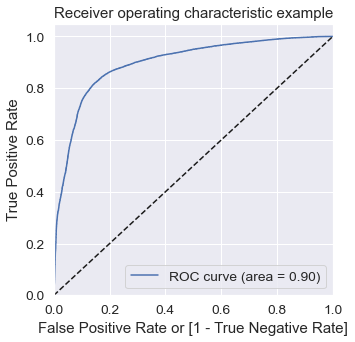

In [127]:
# Drawing the roc_curve
draw_roc(y_train_pred_final.churn, y_train_pred_final.Churn_Prob)

#### Finding the Optimal Cutoff Point

In [128]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  Churn_Prob  CustID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.075651   24443          0    1    0    0    0    0    0    0   
1      1    0.950665   42841          1    1    1    1    1    1    1    1   
2      1    0.976081   41118          1    1    1    1    1    1    1    1   
3      0    0.205951    2254          0    1    1    1    0    0    0    0   
4      0    0.601993   29470          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    1    1    1  
3    0    0    0  
4    0    0    0

In [129]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.499622     1.000000     0.000000
0.1   0.1  0.656871     0.974241     0.339980
0.2   0.2  0.724398     0.950516     0.498620
0.3   0.3  0.777856     0.921629     0.634300
0.4   0.4  0.813886     0.887267     0.740615
0.5   0.5  0.835431     0.845083     0.825793
0.6   0.6  0.830429     0.773803     0.886968
0.7   0.7  0.783249     0.635833     0.930442
0.8   0.8  0.717572     0.477266     0.957515
0.9   0.9  0.665078     0.348576     0.981101


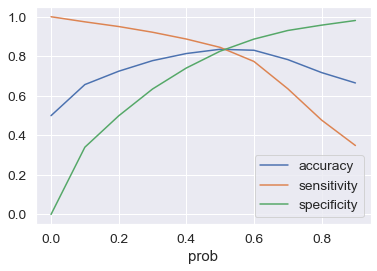

In [130]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the curve above, 0.50 is the optimum point to take it as a cutoff probability. For this cutoff point, which we calculated above, accuracy=0.8354, sensitivity=0.845 and specificity=0.8257**

In [131]:
# Calculating the Precision(Positive Predictive Value) of the model
preci = TP/(TP+FP)
preci

0.8288753643942106

In [132]:
# Displaying the train result of Logistic Regression without PCA Method
Result_train = pd.DataFrame({'Method':['Logistic Regression w/o PCA'], 'Roc_Auc_train': [auc_score],'Accuracy_train': [accu], 
                             'Sensitivity_train': [sensi], 'Specificity_train': [speci], 'Precision_train': [preci]})
Result_train

Method  Roc_Auc_train  Accuracy_train  \
0  Logistic Regression w/o PCA        0.89698        0.835431   

   Sensitivity_train  Specificity_train  Precision_train  
0           0.845083           0.825793         0.828875

### Making Predictions on the test set

In [133]:
# Scaling the test set
X_test = scaler.transform(X_test)

In [134]:
# Converting to dataframe
X_test = pd.DataFrame(X_test)
X_test.columns = X_smote.columns
X_test = X_test[col]
X_test.head()

onnet_mou_7  roam_og_mou_8  loc_og_mou_8  std_og_t2t_mou_8  \
0    -0.431396       0.168407      0.316380         -0.443410   
1     0.290817      -0.392371      0.153311          0.396613   
2    -0.653855      -0.070133     -0.723773         -0.486522   
3     1.016321      -0.591017     -0.609773          0.838842   
4     1.901441      -0.550392     -0.734505         -0.498502   

   std_og_t2m_mou_8  std_og_mou_7  spl_og_mou_8  loc_ic_mou_7  loc_ic_mou_8  \
0         -0.467021     -0.631218     -0.487398      0.892231      0.165103   
1          0.158403     -0.047684     -0.449113     -0.633925     -0.310921   
2         -0.320267      3.979381     -0.487398     -0.035012     -0.753093   
3         -0.383523      0.582545      0.266313     -0.469235     -0.026706   
4         -0.538724      1.545559     -0.487398     -0.663256     -0.783058   

   last_day_rch_amt_8  monthly_3g_8  
0           -0.636838     -0.242655  
1            0.256586     -0.242655  
2           -0.535312     -0.242655  
3           -0.129210     -0.242655  
4           -0.636838     -0.242655

In [135]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

In [136]:
# Making predictions
y_test_pred = reg.predict(X_test_sm)

In [137]:
y_test_pred[:10]

0    0.506444
1    0.225066
2    0.973044
3    0.582672
4    0.903909
5    0.286780
6    0.220279
7    0.000074
8    0.974754
9    0.062750
dtype: float64

In [138]:
# Checking the roc_auc_score
auc_score = metrics.roc_auc_score(y_test.values, y_test_pred)
auc_score

0.898330405399813

In [139]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
0  0.506444
1  0.225066
2  0.973044
3  0.582672
4  0.903909

In [140]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [141]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [142]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [143]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [144]:
# checking the head
y_pred_final.head()

churn  CustID         0
0      1   47473  0.506444
1      1   49259  0.225066
2      1   39821  0.973044
3      0   14552  0.582672
4      1   49274  0.903909

In [145]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [146]:
# checking the head
y_pred_final.head()

churn  CustID  Churn_Prob
0      1   47473    0.506444
1      1   49259    0.225066
2      1   39821    0.973044
3      0   14552    0.582672
4      1   49274    0.903909

In [147]:
# Reindexing
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)

In [148]:
# Checkign the head
y_pred_final.head()

CustID  churn  Churn_Prob
0   47473      1    0.506444
1   49259      1    0.225066
2   39821      1    0.973044
3   14552      0    0.582672
4   49274      1    0.903909

In [149]:
# Assigning threshold and making predictions
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.50 else 0)

In [150]:
# Checking the head
y_pred_final.head()

CustID  churn  Churn_Prob  final_predicted
0   47473      1    0.506444                1
1   49259      1    0.225066                0
2   39821      1    0.973044                1
3   14552      0    0.582672                1
4   49274      1    0.903909                1

In [151]:
# Checking the accuracy of the model
accu = metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)
accu

0.8354507324782688

In [152]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6801, 1410],
       [1297, 6943]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Checking the sensitivity of the model
sensi = TP / float(TP+FN)
sensi

0.8425970873786408

In [155]:
# Checking the specificity of the model
speci = TN / float(TN+FP)
speci

0.8282791377420533

In [156]:
# Calculating the Precision(Positive Predictive Value) of the model
preci = TP/(TP+FP)
preci

0.8311983718424518

In [157]:
# Displaying the test result of Logistic Regression without PCA Method
Result_test = pd.DataFrame({'Method1':['Logistic Regression w/o PCA'], 'Roc_Auc_test': [auc_score],'Accuracy_test': [accu], 
                            'Sensitivity_test': [sensi], 'Specificity_test': [speci], 'Precision_test': [preci]})
Result_test

Method1  Roc_Auc_test  Accuracy_test  Sensitivity_test  \
0  Logistic Regression w/o PCA       0.89833       0.835451          0.842597   

   Specificity_test  Precision_test  
0          0.828279        0.831198

In [158]:
# Displaying the train and test result of Logistic Regression without PCA Method
Result_lr = pd.concat([Result_train, Result_test], axis=1)
Result_lr.drop('Method1', axis=1, inplace=True)
Result_lr = Result_lr.reindex(['Method', 'Roc_Auc_train', 'Roc_Auc_test', 'Accuracy_train', 'Accuracy_test', 
                               'Sensitivity_train', 'Sensitivity_test', 'Specificity_train', 'Specificity_test', 
                               'Precision_train', 'Precision_test'], axis=1)
Result_lr

Method  Roc_Auc_train  Roc_Auc_test  Accuracy_train  \
0  Logistic Regression w/o PCA        0.89698       0.89833        0.835431   

   Accuracy_test  Sensitivity_train  Sensitivity_test  Specificity_train  \
0       0.835451           0.845083          0.842597           0.825793   

   Specificity_test  Precision_train  Precision_test  
0          0.828279         0.828875        0.831198

**Here we observed that the accuracy, sensitivity, specificity and precision of the model in both train and set are almost constant**

**The important variables, with respect to the importance, are: spl_og_mou_8, loc_ic_mou_7, roam_og_mou_8, std_og_mou_7, onnet_mou_7,	std_og_t2m_mou_8, last_day_rch_amt_8, monthly_3g_8, loc_og_mou_8, std_og_t2t_mou_8, loc_ic_mou_8**

## Building multiple models for good prediction with PCA

In [159]:
# Splitting the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30, random_state=42)

In [160]:
# Checking the shape
print(X_train.shape)
print(X_test.shape)

(38385, 105)
(16451, 105)


In [161]:
# Checking the shape
print(y_train.shape)
print(y_test.shape)

(38385,)
(16451,)


In [162]:
# Checking the head
X_train.head()

arpu_6       arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  \
24443  313.725000   361.706000  417.464000   411.240000   419.510000   
42841   52.080157  1092.217332   14.750144   166.312940    14.073604   
41118  392.641816   472.220794    0.000000    34.877343    44.488109   
2254   429.753000   279.199000  547.213000     6.730000    13.610000   
29470  428.480000   367.495000  120.700000   638.530000   464.580000   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
24443      594.530    115.860000    130.140000       159.190       0.000000   
42841      197.704    191.211183    106.765058       197.704     159.398073   
41118      197.704    730.544983    765.213466       197.704       0.000000   
2254         9.490    184.610000    100.230000       106.060       0.000000   
29470      165.640     52.690000     62.710000        11.780      21.280000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
24443         0.0000          0.000       0.000000       0.000000   
42841        27.7069        197.704     158.892635      86.221561   
41118         0.0000        197.704       0.000000       0.000000   
2254          0.0000          0.000       0.000000       0.000000   
29470        16.4400          0.000     149.880000      64.480000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
24443          0.000          2.810000          2.130000             1.110   
42841        197.704        158.969335          2.047320           197.704   
41118        197.704          5.800668          3.104093           197.704   
2254           0.000          4.660000          5.740000             6.460   
29470          0.000         11.690000         72.010000            17.010   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
24443         25.980000         25.080000            71.590          0.000000   
42841        171.495158         17.765073           197.704        158.821834   
41118         25.172346         13.324980           197.704          0.000000   
2254          23.530000         30.890000            16.690          1.080000   
29470          9.580000         31.510000             2.880          0.000000   

       loc_og_t2f_mou_7  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
24443          0.000000     28.790000     27.210000        72.710   
42841          2.179088    171.642659     21.993448       197.704   
41118          0.240655     30.977025     16.679727       197.704   
2254           0.000000     29.280000     36.640000        23.160   
29470          0.000000     21.280000    103.530000        19.890   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_7  std_og_t2m_mou_8  \
24443        417.380000           593.410        105.060000            87.590   
42841         12.024317           197.704         21.615844           197.704   
41118         41.374016           197.704        751.643821           197.704   
2254           7.860000             3.030         54.830000            48.310   
29470        331.780000           148.630         27.490000             8.890   

       std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_mou_7  std_og_mou_8  \
24443          0.230000          0.000000    522.440000       681.010   
42841        159.535741          0.631306     34.275401       197.704   
41118          0.000000          0.000000    793.027837       197.704   
2254           1.910000          0.000000     62.700000        69.510   
29470          0.000000          0.000000    359.280000       157.530   

       isd_og_mou_6  isd_og_mou_7  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
24443      0.000000           0.0      3.230000      0.160000         0.000   
42841    158.821834           0.0    165.225363      0.000000       197.704   
41118      0.000000           0.0      2.222074      4.584475       197.704   
2254       0.000000           0.0     32.710000     15.990000        32.060

#### Scaling the dataset

In [163]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X_smote.columns
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.823865 -0.540302  0.088548     0.170936     0.283658     1.108512   
1 -1.568252  1.560924 -0.993269    -0.376877    -0.673266    -0.052874   
2 -0.599344 -0.222420 -1.032892    -0.670850    -0.601480    -0.052874   
3 -0.493761 -0.777624  0.437095    -0.733805    -0.674360    -0.603717   
4 -0.497383 -0.523651 -0.708654     0.679300     0.390033    -0.146715   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.707859     -0.614552     -0.365361      -0.350850      -0.374550   
1     -0.546616     -0.666485     -0.256765       2.332079       0.132288   
2      0.607493      0.796441     -0.256765      -0.350850      -0.374550   
3     -0.560742     -0.681005     -0.515171      -0.350850      -0.374550   
4     -0.843035     -0.764366     -0.781009       0.007327      -0.073815   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.558758      -0.366963      -0.410042      -0.591017   
1       2.055539       1.298137       0.665933       1.609523   
2       2.055539      -0.366963      -0.410042       1.609523   
3      -0.558758      -0.366963      -0.410042      -0.591017   
4      -0.558758       1.203690       0.394616      -0.591017   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.511372         -0.511644         -0.615178         -0.643721   
1          0.580589         -0.512256          0.978522          0.116122   
2         -0.490460         -0.504437          0.978522         -0.647938   
3         -0.498436         -0.484933         -0.571808         -0.656514   
4         -0.449278          0.005411         -0.486284         -0.729357   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.632697         -0.345960         -0.304908         -0.308375   
1         -0.672848          0.399452          4.914224         -0.247497   
2         -0.697220          0.399452         -0.304908         -0.301652   
3         -0.600807         -0.670454         -0.269418         -0.308375   
4         -0.597404         -0.752079         -0.304908         -0.308375   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_7  \
0     -0.681713     -0.667377     -0.448319          0.527986   
1     -0.200829     -0.685908      0.043655         -0.527277   
2     -0.674351     -0.704785      0.043655         -0.450871   
3     -0.680064     -0.633877     -0.643347         -0.538118   
4     -0.706994     -0.396253     -0.656218          0.305143   

   std_og_t2t_mou_8  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0          1.465206         -0.321008         -0.236028         -0.195591   
1          0.155738         -0.527073          0.144507          5.380141   
2          0.155738          1.275727          0.144507         -0.203641   
3         -0.488475         -0.445051         -0.371773         -0.136791   
4         -0.006657         -0.512567         -0.508002         -0.203641   

   std_og_t2f_mou_7  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0         -0.221389      0.109797      0.837256     -0.207551     -0.221617   
1         -0.203074     -0.693275     -0.186078      4.966859     -0.221617   
2         -0.221389      0.554937     -0.186078     -0.207551     -0.221617   
3         -0.221389     -0.646514     -0.457511     -0.207551     -0.221617   
4         -0.221389     -0.158615     -0.271141     -0.207551     -0.221617   

   spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  \
0     -0.237689     -0.364204     -0.487398       -0.330871       -0.189889   
1      5.142733     -0.368672      2.463912       -1.056700       -0.943870   
2     -0.271166     -0.240656      2.463912        0.026836        0.214118   
3      0.741443      0.077828     -0.008809       -0.830999       -0.853631   
4     -0.344969     -0.368672     -0.487398       -0.309

### Applying PCA

In [164]:
# Creating the object
pca = PCA(0.9, random_state=42)

In [165]:
# Applying PCA
X_train_pca = pca.fit_transform(X_train)

In [166]:
# checkign the shape
X_train_pca.shape

(38385, 33)

In [167]:
# Creating the correlation matrix
corrmat = np.corrcoef(X_train_pca.transpose())

In [168]:
# checking the shape
corrmat.shape

(33, 33)

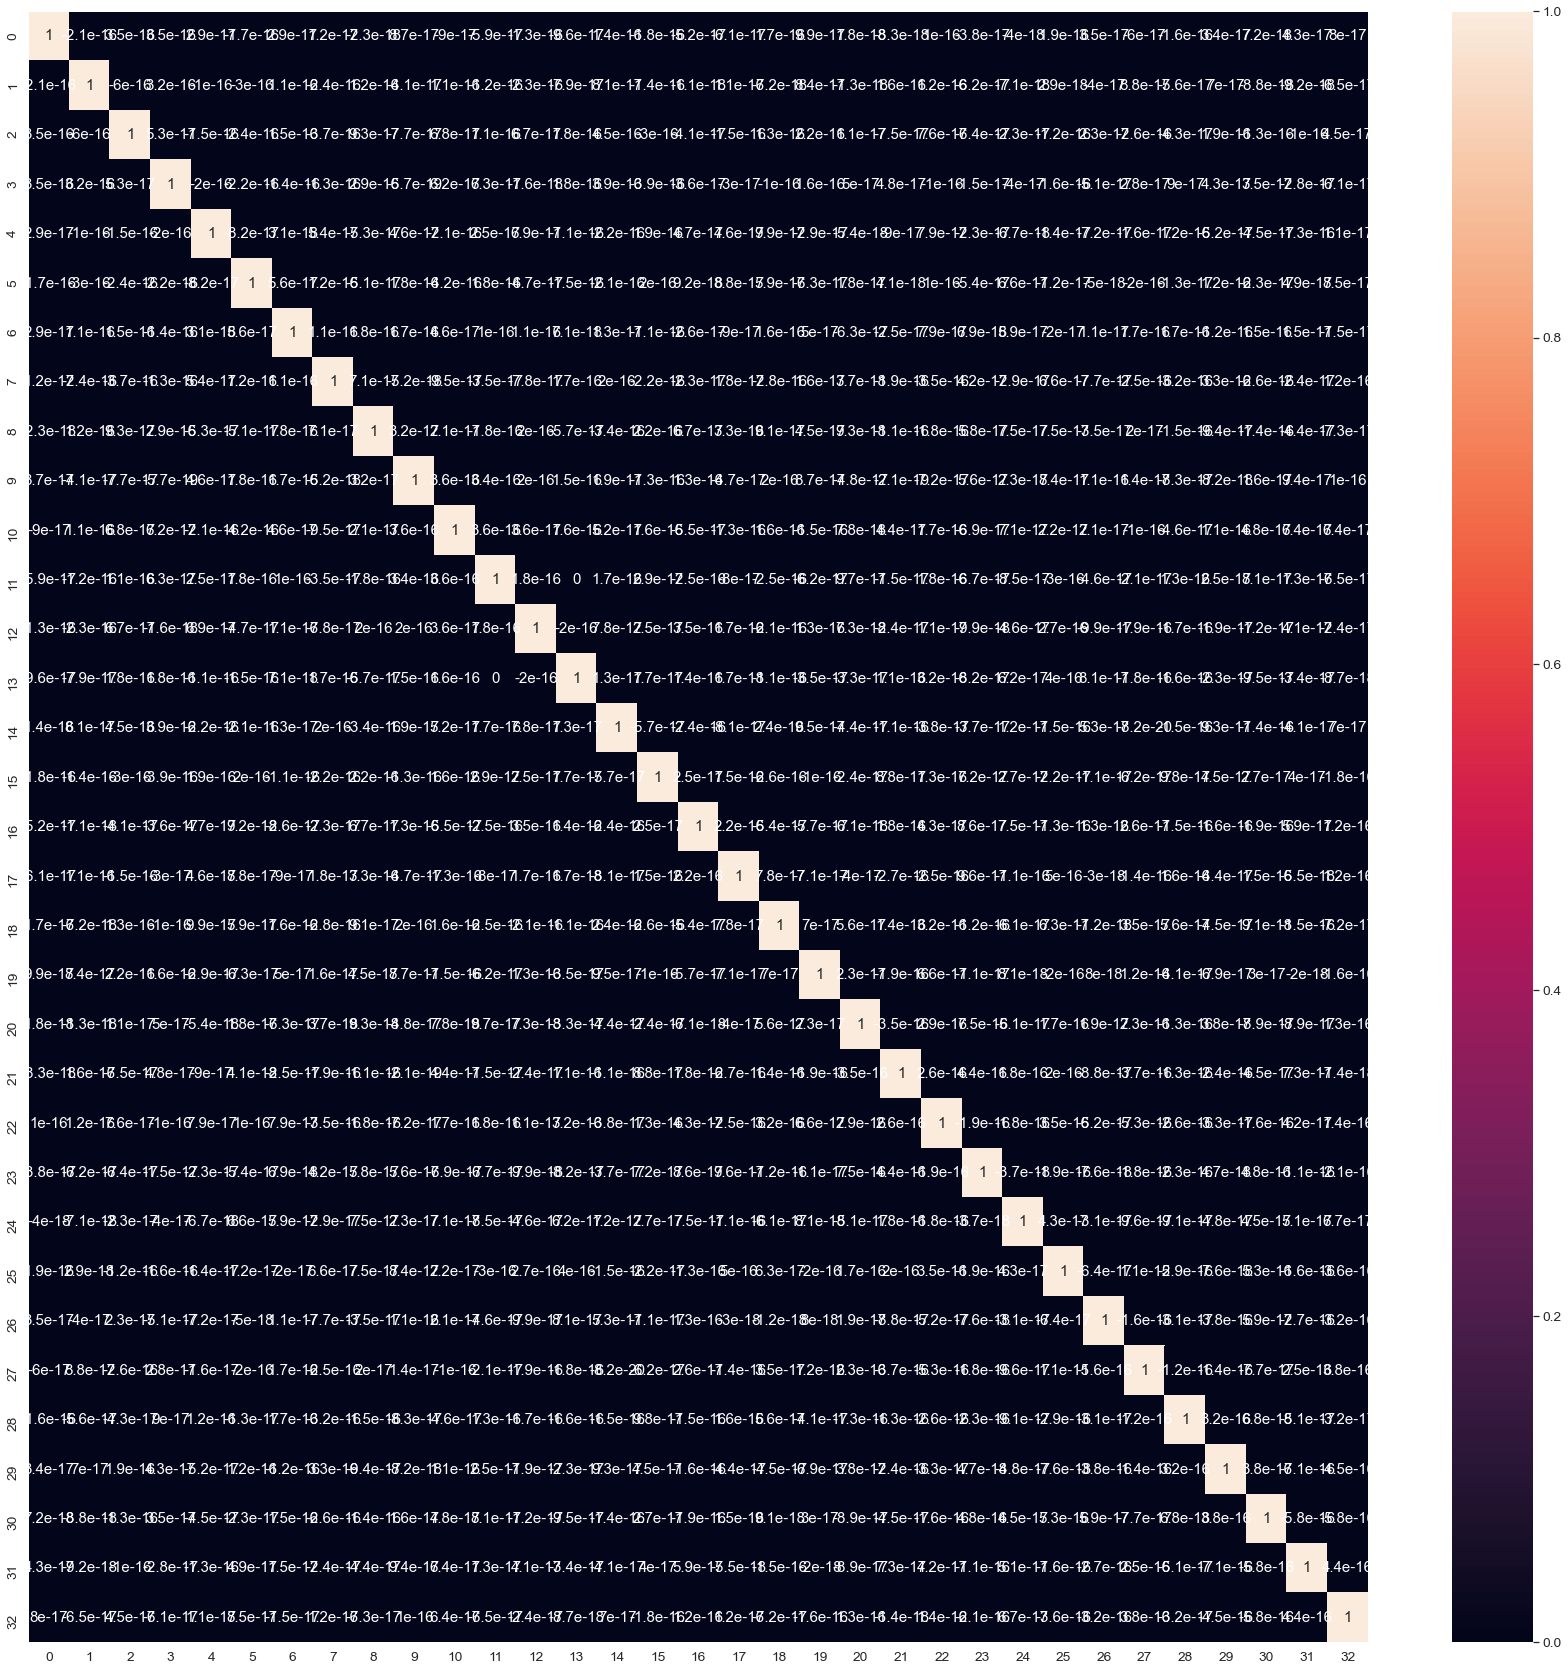

In [169]:
# Plotting the heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corrmat, annot=True)
plt.show()

### Building a Logistic Regression Model using the Principal Components

In [170]:
# Creating the object and fitting the model
lr_pca = LogisticRegression()
lr_model_pca = lr_pca.fit(X_train_pca, y_train)

In [171]:
# Making predictions
y_pred_train = lr_model_pca.predict_proba(X_train_pca)

In [172]:
# Checking the roc_auc_score
auc_score = metrics.roc_auc_score(y_train, y_pred_train[:,1])
auc_score

0.907604347936402

In [173]:
# Converting to dataframe
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_lr = y_pred_train.iloc[:,[1]]
y_pred_lr.head()

1
0  0.137557
1  0.996601
2  0.982634
3  0.051804
4  0.705426

In [174]:
# Converting to dataframe
y_train_lr = pd.DataFrame(y_train)
y_train_lr.head()

churn
24443      0
42841      1
41118      1
2254       0
29470      0

In [175]:
# Putting CustID to index
y_train_lr['CustID'] = y_train_lr.index
# Removing index for both dataframes to append them side by side 
y_pred_lr.reset_index(drop=True, inplace=True)
y_train_lr.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_train_final = pd.concat([y_train_lr,y_pred_lr],axis=1)
# Renaming the column 
y_train_final= y_train_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_train_final = y_train_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_train_final.head()

CustID  churn  Churn_Prob
0   24443      0    0.137557
1   42841      1    0.996601
2   41118      1    0.982634
3    2254      0    0.051804
4   29470      0    0.705426

In [176]:
# Creating new column 'Predicted' with 1 if Churn_Prob>0.5 else 0
y_train_final['Predicted'] = y_train_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_final.head()

CustID  churn  Churn_Prob  Predicted
0   24443      0    0.137557          0
1   42841      1    0.996601          1
2   41118      1    0.982634          1
3    2254      0    0.051804          0
4   29470      0    0.705426          1

In [177]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_train_final.churn, y_train_final.Predicted )
confusion

array([[16220,  2987],
       [ 3192, 15986]], dtype=int64)

In [178]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_final.churn, y_train_final.Predicted)

0.8390256610655203

In [179]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [180]:
# Checking the Specificity of the model
TN/(TN+FP)

0.8444837819544958

In [181]:
# Checking the Sensitivity of the model
TP/(TP+FN)

0.8335592866826572

In [182]:
# Defining the roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [183]:
# Creating the roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_final.churn, y_train_final.Churn_Prob, drop_intermediate = False)

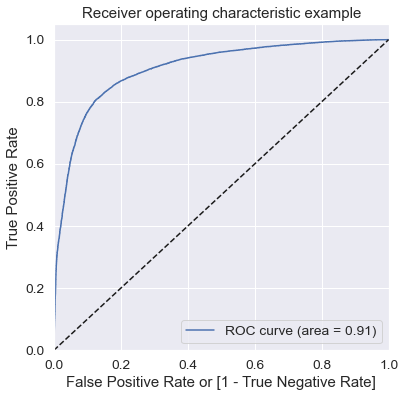

(array([0.        , 0.        , 0.        , ..., 0.99989587, 0.99994794,
        1.        ]),
 array([0.00000000e+00, 5.21430806e-05, 1.04286161e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99929736e+00, 9.99297355e-01, 9.99280885e-01, ...,
        7.13348443e-06, 5.09450890e-06, 9.88812683e-07]))

In [184]:
# Drawing the roc_curve
draw_roc(y_train_final.churn, y_train_final.Churn_Prob)

### Finding the Optimal Cutoff Point

In [185]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i]= y_train_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_final.head()

CustID  churn  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   24443      0    0.137557          0    1    1    0    0    0    0    0   
1   42841      1    0.996601          1    1    1    1    1    1    1    1   
2   41118      1    0.982634          1    1    1    1    1    1    1    1   
3    2254      0    0.051804          0    1    0    0    0    0    0    0   
4   29470      0    0.705426          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    1    1    1  
3    0    0    0  
4    1    0    0

In [186]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.churn, y_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.499622     1.000000     0.000000
0.1   0.1  0.676618     0.975336     0.378352
0.2   0.2  0.751049     0.950516     0.551882
0.3   0.3  0.797838     0.918709     0.677149
0.4   0.4  0.827016     0.879549     0.774561
0.5   0.5  0.839026     0.833559     0.844484
0.6   0.6  0.836004     0.779852     0.892071
0.7   0.7  0.810551     0.691782     0.929140
0.8   0.8  0.758135     0.557045     0.958921
0.9   0.9  0.681985     0.381531     0.981986


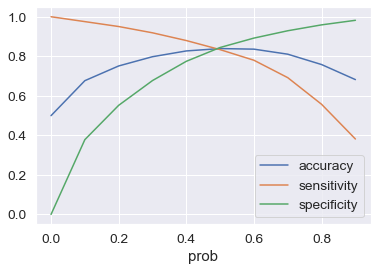

In [187]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

**Since predicting more churners is most important so by slight compromise with accuracy and specificity we can increase the sensitivity. So considering the cutoff point as 0.4**

In [188]:
# Assigning threshold and making predictions
y_train_final['final_predicted'] = y_train_final.Churn_Prob.map( lambda x: 1 if x > 0.40 else 0)

y_train_final.head()

CustID  churn  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   24443      0    0.137557          0    1    1    0    0    0    0    0   
1   42841      1    0.996601          1    1    1    1    1    1    1    1   
2   41118      1    0.982634          1    1    1    1    1    1    1    1   
3    2254      0    0.051804          0    1    0    0    0    0    0    0   
4   29470      0    0.705426          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    1    1    1                1  
2    1    1    1                1  
3    0    0    0                0  
4    1    0    0                1

In [189]:
# Checking the accuracy of the model
accu = metrics.accuracy_score(y_train_final.churn, y_train_final.final_predicted)
accu

0.8270157613651166

In [190]:
# Creating the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_final.churn, y_train_final.final_predicted)
confusion2

array([[14877,  4330],
       [ 2310, 16868]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [192]:
# Let us calculate sensitivity
sensi = TP /(TP+FN)
sensi

0.879549483783502

In [193]:
# Let's see the specificity of our logistic regression model
speci = TN / (TN+FP)
speci

0.7745613578382882

In [194]:
# Calculating the Precision(Positive Predictive Value) of the model
preci = TP/(TP+FP)
preci

0.7957354467402585

In [195]:
# Displaying the train results of Logistic Regression with PCA Method
Result_train = pd.DataFrame({'Method':['Logistic Regression with PCA'], 'Roc_Auc_train': [auc_score],'Accuracy_train': [accu], 'Sensitivity_train': [sensi], 'Specificity_train': [speci], 'Precision_train': [preci]})
Result_train

Method  Roc_Auc_train  Accuracy_train  \
0  Logistic Regression with PCA       0.907604        0.827016   

   Sensitivity_train  Specificity_train  Precision_train  
0           0.879549           0.774561         0.795735

#### Model Evaluation

In [196]:
# Applying Scaling
X_test_lr = ss.transform(X_test)

In [197]:
# Applying PCA
X_test_pca = pca.transform(X_test_lr)
X_test_pca.shape

(16451, 33)

In [198]:
# Converting to dataframe
X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca.head()

0         1         2         3         4         5         6  \
0  4.314357  3.251509 -0.026033  2.257664 -0.783758 -5.109336 -2.947505   
1 -1.080383 -0.364094  1.062594  0.147266 -0.823913 -0.047610 -1.289659   
2 -3.230718  0.254743  4.544712 -2.033548  0.187190 -5.672245  1.630282   
3  0.332313 -1.684029  3.089332 -1.594371  0.256082  0.342867  2.979340   
4 -3.800932 -1.932059  1.515983 -1.060456 -0.510052 -2.565025 -2.215391   

          7         8         9        10        11        12        13  \
0 -3.090496 -1.316295  0.261017  2.439005  0.903871 -4.972844 -0.305394   
1  0.224400 -0.450984  1.227348  0.991418  0.326447  0.079029 -1.746192   
2 -5.859923  1.230530 -1.238969 -0.960669 -0.409681 -1.029282  2.146641   
3  2.847836  1.494533  4.695873  0.801900  0.686333  1.101054 -1.596335   
4 -0.869362  2.567351  0.650594 -0.025270 -0.261028 -0.958347  0.095536   

         14        15        16        17        18        19        20  \
0  2.999839  1.730883 -3.023897 -0.410134 -2.683765  3.736660  1.051475   
1 -1.295286  1.375601  0.316465  0.281859  0.074398 -0.936755 -0.811532   
2  1.748169 -0.387361  0.315411  0.318771  0.315140 -1.031915 -0.089233   
3 -0.594280 -1.119590 -0.407019 -1.290750 -1.314714 -0.583978  0.213286   
4  0.889631 -0.707153  0.259936  0.180762 -0.081364 -1.390833 -0.330577   

         21        22        23        24        25        26        27  \
0 -1.651916 -2.186120 -0.479994  0.717260  0.144508  3.937730  0.528373   
1 -0.010214 -0.855061  1.649401 -1.987966  0.597720  0.019312  0.981689   
2  0.184253  0.899196 -0.033779  0.402615 -1.203434  0.016826 -1.452046   
3  0.439121 -1.341857 -0.801470 -1.032415  0.551082  0.277959  2.401283   
4 -0.454417  0.236127 -0.140266 -0.237066  0.819744 -0.014744  0.105795   

         28        29        30        31        32  
0 -1.539354  0.064543  0.278462  2.026316 -0.597654  
1 -0.387836  0.464727 -0.247273 -0.238733 -0.119122  
2  0.323236  2.210863 -0.951492  0.284053  0.172156  
3  0.780429  1.184484 -1.246508 -0.070439  1.288126  
4 -0.038666 -1.156290  0.584346  0.190111  0.085005

In [199]:
# Making predictions
y_pred_test = lr_model_pca.predict_proba(X_test_pca)

In [200]:
# Checking the roc_auc_score
auc_score = metrics.roc_auc_score(y_test, y_pred_test[:,1])
auc_score

0.910279736630828

In [201]:
# Converting to dataframe
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test_lr = y_pred_test.iloc[:,[1]]
y_pred_test_lr.head()

1
0  0.784788
1  0.171058
2  0.978415
3  0.476473
4  0.935214

In [202]:
# Converting to dataframe
y_test_lr = pd.DataFrame(y_test)
y_test_lr.head()

churn
47473      1
49259      1
39821      1
14552      0
49274      1

In [203]:
# Putting CustID to index
y_test_lr['CustID'] = y_test_lr.index
# Removing index for both dataframes to append them side by side 
y_pred_test_lr.reset_index(drop=True, inplace=True)
y_test_lr.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_test_final = pd.concat([y_test_lr,y_pred_test_lr],axis=1)
# Renaming the column 
y_test_final= y_test_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_test_final = y_test_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_test_final.head()

CustID  churn  Churn_Prob
0   47473      1    0.784788
1   49259      1    0.171058
2   39821      1    0.978415
3   14552      0    0.476473
4   49274      1    0.935214

In [204]:
# Creating new column 'Predicted' with 1 if Churn_Prob>0.5 else 0
y_test_final['Predicted'] = y_test_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_final.head()

CustID  churn  Churn_Prob  Predicted
0   47473      1    0.784788          1
1   49259      1    0.171058          0
2   39821      1    0.978415          1
3   14552      0    0.476473          0
4   49274      1    0.935214          1

In [205]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix( y_test_final.churn, y_test_final.Predicted )
confusion

array([[16220,  2987],
       [ 3192, 15986]], dtype=int64)

In [206]:
# Checking the overall accuracy of the model
accu = metrics.accuracy_score(y_test_final.churn, y_test_final.Predicted)
accu

0.8404960184791198

In [207]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [208]:
# Checking the Specificity of the model
speci = TN/(TN+FP)
speci

0.8492266471806114

In [209]:
# Checking the Sensitivity of the model
sensi = TP/(TP+FN)
sensi

0.8317961165048544

In [210]:
# Calculating the Precision(Positive Predictive Value) of the model
preci = TP/(TP+FP)
preci

0.8470093919920909

In [211]:
# Displaying the test results of Logistic Regression with PCA Method
Result_test = pd.DataFrame({'Method1':['Logistic Regression with PCA'], 'Roc_Auc_test': [auc_score],'Accuracy_test': [accu], 
                            'Sensitivity_test': [sensi], 'Specificity_test': [speci], 'Precision_test': [preci]})
Result_test

Method1  Roc_Auc_test  Accuracy_test  \
0  Logistic Regression with PCA       0.91028       0.840496   

   Sensitivity_test  Specificity_test  Precision_test  
0          0.831796          0.849227        0.847009

In [212]:
# Displaying the train and test results of Logistic Regression with PCA Method
Result_lrp = pd.concat([Result_train, Result_test], axis=1)
Result_lrp.drop('Method1', axis=1, inplace=True)
Result_lrp = Result_lrp.reindex(['Method', 'Roc_Auc_train', 'Roc_Auc_test', 'Accuracy_train', 'Accuracy_test', 
                                 'Sensitivity_train', 'Sensitivity_test', 'Specificity_train', 'Specificity_test', 
                                 'Precision_train', 'Precision_test'], axis=1)
Result_lrp

Method  Roc_Auc_train  Roc_Auc_test  Accuracy_train  \
0  Logistic Regression with PCA       0.907604       0.91028        0.827016   

   Accuracy_test  Sensitivity_train  Sensitivity_test  Specificity_train  \
0       0.840496           0.879549          0.831796           0.774561   

   Specificity_test  Precision_train  Precision_test  
0          0.849227         0.795735        0.847009

## Building Random Forest Model with PCA

In [213]:
# Creating the object
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [214]:
# Applying PCA
rf.fit(X_train_pca, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [215]:
# Making predictions
y_train_pred = rf.predict_proba(X_train_pca)

In [216]:
# Checking the roc_auc_score
metrics.roc_auc_score(y_train, y_train_pred[:,1])

1.0

Performed gridsearchCV with 3 folds cross validation and then building the final model with the best estimators. Calculation of gridsearchCV is not shown because it takes lots of time to run. Using only the results here.

In [217]:
# Creating the object
rf_final = RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_jobs=-1, random_state=42, oob_score=True)

In [218]:
# Fitting the model
rf_final.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_jobs=-1, oob_score=True, random_state=42)

In [219]:
# Checking the oob score
rf_final.oob_score_

0.9168164647648821

In [220]:
# Making predictions
y_train_pred = rf_final.predict_proba(X_train_pca)

In [221]:
# Checking the roc_auc_score
auc_score = metrics.roc_auc_score(y_train, y_train_pred[:,1])
auc_score

0.9967768886924487

In [222]:
# Converting to dataframe
y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred_rf = y_train_pred.iloc[:,[1]]
y_train_pred_rf.head()

1
0  0.108403
1  0.966579
2  0.984797
3  0.028506
4  0.568923

In [223]:
# Converting to dataframe
y_train_rf = pd.DataFrame(y_train)
y_train_rf.head()

churn
24443      0
42841      1
41118      1
2254       0
29470      0

In [224]:
# Putting CustID to index
y_train_rf['CustID'] = y_train_rf.index
# Removing index for both dataframes to append them side by side 
y_train_pred_rf.reset_index(drop=True, inplace=True)
y_train_rf.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_train_final_rf = pd.concat([y_train_rf,y_train_pred_rf],axis=1)
# Renaming the column 
y_train_final_rf= y_train_final_rf.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_train_final_rf = y_train_final_rf.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_train_final_rf.head()

CustID  churn  Churn_Prob
0   24443      0    0.108403
1   42841      1    0.966579
2   41118      1    0.984797
3    2254      0    0.028506
4   29470      0    0.568923

In [225]:
# Creating new column 'Predicted' with 1 if Churn_Prob>0.5 else 0
y_train_final_rf['Predicted'] = y_train_final_rf.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_final_rf.head()

CustID  churn  Churn_Prob  Predicted
0   24443      0    0.108403          0
1   42841      1    0.966579          1
2   41118      1    0.984797          1
3    2254      0    0.028506          0
4   29470      0    0.568923          1

In [226]:
# Confusion matrix 
confusion_rf = metrics.confusion_matrix( y_train_final_rf.churn, y_train_final_rf.Predicted )
confusion_rf

array([[18562,   645],
       [  399, 18779]], dtype=int64)

In [227]:
# Checking the overall accuracy.
accu = metrics.accuracy_score(y_train_final_rf.churn, y_train_final_rf.Predicted)
accu

0.972801875732708

In [228]:
TP = confusion_rf[1,1] # true positive 
TN = confusion_rf[0,0] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

In [229]:
# Checking the Specificity of the model
speci = TN/(TN+FP)
speci

0.9664184932576665

In [230]:
# Checking the Sensitivity of the model
sensi = TP/(TP+FN)
sensi

0.9791949108353322

In [231]:
# Defining the roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [232]:
# Creating the roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_final_rf.churn, y_train_final_rf.Churn_Prob, drop_intermediate = False)

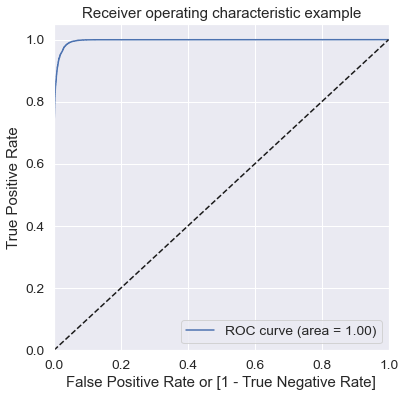

(array([0.        , 0.        , 0.        , ..., 0.99989587, 0.99994794,
        1.        ]),
 array([0.00000000e+00, 3.12858484e-04, 3.65001564e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99995471e+00, 9.99954706e-01, 9.99860143e-01, ...,
        3.22580645e-04, 4.78468900e-05, 2.52525253e-05]))

In [233]:
# Printing the roc_curve
draw_roc(y_train_final_rf.churn, y_train_final_rf.Churn_Prob)

In [234]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final_rf[i]= y_train_final_rf.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_final_rf.head()

CustID  churn  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   24443      0    0.108403          0    1    1    0    0    0    0    0   
1   42841      1    0.966579          1    1    1    1    1    1    1    1   
2   41118      1    0.984797          1    1    1    1    1    1    1    1   
3    2254      0    0.028506          0    1    0    0    0    0    0    0   
4   29470      0    0.568923          1    1    1    1    1    1    1    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    1    1    1  
3    0    0    0  
4    0    0    0

In [235]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final_rf.churn, y_train_final_rf[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.499622     1.000000     0.000000
0.1   0.1  0.753836     1.000000     0.508044
0.2   0.2  0.899987     1.000000     0.800125
0.3   0.3  0.946932     0.999583     0.894361
0.4   0.4  0.967253     0.995411     0.939137
0.5   0.5  0.972802     0.979195     0.966418
0.6   0.6  0.964205     0.946293     0.982090
0.7   0.7  0.936251     0.879914     0.992503
0.8   0.8  0.879198     0.759829     0.998386
0.9   0.9  0.766523     0.532798     0.999896


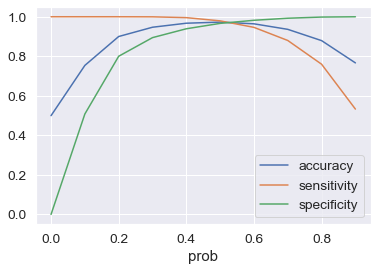

In [236]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

**Since predicting more churners is most important so by slight compromise with accuracy and specificity we can increase the sensitivity. So considering the cutoff point as 0.4**

In [237]:
# Assigning threshold and making predictions
y_train_final_rf['final_predicted'] = y_train_final_rf.Churn_Prob.map( lambda x: 1 if x > 0.40 else 0)

y_train_final_rf.head()

CustID  churn  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   24443      0    0.108403          0    1    1    0    0    0    0    0   
1   42841      1    0.966579          1    1    1    1    1    1    1    1   
2   41118      1    0.984797          1    1    1    1    1    1    1    1   
3    2254      0    0.028506          0    1    0    0    0    0    0    0   
4   29470      0    0.568923          1    1    1    1    1    1    1    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    1    1    1                1  
2    1    1    1                1  
3    0    0    0                0  
4    0    0    0                1

In [238]:
# Checking the overall accuracy.
accu = metrics.accuracy_score(y_train_final_rf.churn, y_train_final_rf.final_predicted)
accu

0.9672528331379445

In [239]:
# Confusion matrix 
confusion_rf2 = metrics.confusion_matrix( y_train_final_rf.churn, y_train_final_rf.final_predicted )
confusion_rf2

array([[18038,  1169],
       [   88, 19090]], dtype=int64)

In [240]:
TP = confusion_rf2[1,1] # true positive 
TN = confusion_rf2[0,0] # true negatives
FP = confusion_rf2[0,1] # false positives
FN = confusion_rf2[1,0] # false negatives

In [241]:
# Checking the Specificity of the model
speci = TN/(TN+FP)
speci

0.9391367730514917

In [242]:
# Checking the Sensitivity of the model
sensi = TP/(TP+FN)
sensi

0.9954114089060382

In [243]:
# Calculating the Precision(Positive Predictive Value) of the model
preci = TP/(TP+FP)
preci

0.9422972506046695

In [244]:
# Displaying the train results of Random Forest with PCA Method
Result_train = pd.DataFrame({'Method':['Random Forest with PCA'], 'Roc_Auc_train': [auc_score],'Accuracy_train': [accu], 'Sensitivity_train': [sensi], 'Specificity_train': [speci], 'Precision_train': [preci]})
Result_train

Method  Roc_Auc_train  Accuracy_train  Sensitivity_train  \
0  Random Forest with PCA       0.996777        0.967253           0.995411   

   Specificity_train  Precision_train  
0           0.939137         0.942297

####  Model Evaluation

In [245]:
# Applying scaling
X_test_rf = ss.transform(X_test)

In [246]:
# Applying PCA
X_test_pca = pca.transform(X_test_rf)
X_test_pca.shape

(16451, 33)

In [247]:
# Making predictions
y_test_pred = rf_final.predict_proba(X_test_pca)

In [248]:
# Checking the roc_auc_score of the model
auc_score = metrics.roc_auc_score(y_test, y_test_pred[:,1])
auc_score

0.9745531538913581

In [249]:
# Converting to dataframe
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred_rf = y_test_pred.iloc[:,[1]]
y_test_pred_rf.head()

1
0  0.662692
1  0.504901
2  0.920533
3  0.262820
4  0.972977

In [250]:
# Converting y_test to dataframe
y_test_rf = pd.DataFrame(y_test)
y_test_rf.head()

churn
47473      1
49259      1
39821      1
14552      0
49274      1

In [251]:
# Putting CustID to index
y_test_rf['CustID'] = y_test_rf.index
# Removing index for both dataframes to append them side by side 
y_test_pred_rf.reset_index(drop=True, inplace=True)
y_test_rf.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_test_final_rf = pd.concat([y_test_rf,y_test_pred_rf],axis=1)
# Renaming the column 
y_test_final_rf= y_test_final_rf.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_test_final_rf = y_test_final_rf.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_test_final_rf.head()

CustID  churn  Churn_Prob
0   47473      1    0.662692
1   49259      1    0.504901
2   39821      1    0.920533
3   14552      0    0.262820
4   49274      1    0.972977

In [252]:
# Creating new column 'Predicted' with 1 if Churn_Prob>0.5 else 0
y_test_final_rf['Predicted'] = y_test_final_rf.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Checking the head
y_test_final_rf.head()

CustID  churn  Churn_Prob  Predicted
0   47473      1    0.662692          1
1   49259      1    0.504901          1
2   39821      1    0.920533          1
3   14552      0    0.262820          0
4   49274      1    0.972977          1

In [253]:
# Confusion matrix 
confusion_rf3 = metrics.confusion_matrix( y_test_final_rf.churn, y_test_final_rf.Predicted )
confusion_rf3

array([[7228,  983],
       [ 373, 7867]], dtype=int64)

In [254]:
#Checking the accuracy of the model
accu = metrics.accuracy_score(y_test_final_rf.churn, y_test_final_rf.Predicted)
accu

0.9175733997933256

In [255]:
TP = confusion_rf3[1,1] # true positive 
TN = confusion_rf3[0,0] # true negatives
FP = confusion_rf3[0,1] # false positives
FN = confusion_rf3[1,0] # false negatives

In [256]:
# Checking the Specificity of the model
speci = TN/(TN+FP)
speci

0.8802825478017294

In [257]:
# Checking the Sensitivity of the model
sensi = TP/(TP+FN)
sensi

0.9547330097087379

In [258]:
# Calculating the Precision(Positive Predictive Value) of the model
preci = TP/(TP+FP)
preci

0.8889265536723164

In [259]:
# Displaying the test results of Random Forest with PCA Method
Result_test = pd.DataFrame({'Method1':['Random Forest with PCA'], 'Roc_Auc_test': [auc_score],'Accuracy_test': [accu], 
                            'Sensitivity_test': [sensi], 'Specificity_test': [speci], 'Precision_test': [preci]})
Result_test

Method1  Roc_Auc_test  Accuracy_test  Sensitivity_test  \
0  Random Forest with PCA      0.974553       0.917573          0.954733   

   Specificity_test  Precision_test  
0          0.880283        0.888927

In [260]:
# Displaying the train and test results of Random Forest with PCA Method
Result_rf = pd.concat([Result_train, Result_test], axis=1)
Result_rf.drop('Method1', axis=1, inplace=True)
Result_rf = Result_rf.reindex(['Method', 'Roc_Auc_train', 'Roc_Auc_test', 'Accuracy_train', 'Accuracy_test', 
                               'Sensitivity_train', 'Sensitivity_test', 'Specificity_train', 'Specificity_test', 
                               'Precision_train', 'Precision_test'], axis=1)
Result_rf

Method  Roc_Auc_train  Roc_Auc_test  Accuracy_train  \
0  Random Forest with PCA       0.996777      0.974553        0.967253   

   Accuracy_test  Sensitivity_train  Sensitivity_test  Specificity_train  \
0       0.917573           0.995411          0.954733           0.939137   

   Specificity_test  Precision_train  Precision_test  
0          0.880283         0.942297        0.888927

**It is observed that the values of evaluation metrics of the test set is approximately droppped by 5% then that of the train set** 

### Building Gradient Boosting Model with PCA

**Applying the Gradient Boosting Model on the PCA applied data**

Building the model with default parameters

In [261]:
# Creating the object and fitting the model
gbclass1 = GradientBoostingClassifier(random_state=42)
gbclass1.fit(X_train_pca,y_train)

GradientBoostingClassifier(random_state=42)

In [262]:
# Making predictions
y_pred_train = gbclass1.predict_proba(X_train_pca)

In [263]:
# Checking the roc_auc_score
metrics.roc_auc_score(y_train, y_pred_train[:,1])

0.9322597557988076

Performed gridsearchCV with 3 folds cross validation and then building the final model with the best estimators. Calculation of gridsearchCV is not shown because it takes lots of time to run. Using the results here.

In [264]:
# Creating the object
gbclass_final = GradientBoostingClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                           random_state=42)

In [265]:
# Fitting the model
gbclass_final.fit(X_train_pca,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                           random_state=42)

In [266]:
# Making predictions
y_pred_train = gbclass_final.predict_proba(X_train_pca)

In [267]:
# Checking the roc_auc_score
auc_score = metrics.roc_auc_score(y_train, y_pred_train[:,1])
auc_score

0.978663304974994

In [268]:
# Converting to dataframe
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train_gb = y_pred_train.iloc[:,[1]]
y_pred_train_gb.head()

1
0  0.097728
1  0.972396
2  0.987413
3  0.023518
4  0.735628

In [269]:
# Converting Y_train to Dataframe
y_train_gb = pd.DataFrame(y_train)
y_train_gb.head()

churn
24443      0
42841      1
41118      1
2254       0
29470      0

In [270]:
# Putting CustID to index
y_train_gb['CustID'] = y_train_gb.index
# Removing index for both dataframes to append them side by side 
y_pred_train_gb.reset_index(drop=True, inplace=True)
y_train_gb.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_train_final_gb = pd.concat([y_train_gb,y_pred_train_gb],axis=1)
# Renaming the column 
y_train_final_gb= y_train_final_gb.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_train_final_gb = y_train_final_gb.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_train_final_gb.head()

CustID  churn  Churn_Prob
0   24443      0    0.097728
1   42841      1    0.972396
2   41118      1    0.987413
3    2254      0    0.023518
4   29470      0    0.735628

In [271]:
# Creating new column 'Predicted' with 1 if Churn_Prob>0.5 else 0
y_train_final_gb['Predicted'] = y_train_final_gb.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_final_gb.head()

CustID  churn  Churn_Prob  Predicted
0   24443      0    0.097728          0
1   42841      1    0.972396          1
2   41118      1    0.987413          1
3    2254      0    0.023518          0
4   29470      0    0.735628          1

In [272]:
# Confusion matrix 
confusion_gb = metrics.confusion_matrix( y_train_final_gb.churn, y_train_final_gb.Predicted )
confusion_gb

array([[17747,  1460],
       [ 1332, 17846]], dtype=int64)

In [273]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_final_gb.churn, y_train_final_gb.Predicted)

0.9272632538752117

In [274]:
TP = confusion_gb[1,1] # true positive 
TN = confusion_gb[0,0] # true negatives
FP = confusion_gb[0,1] # false positives
FN = confusion_gb[1,0] # false negatives

In [275]:
# Checking the Specificity of the model
TN/(TN+FP)

0.9239860467537877

In [276]:
# Checking the Sensitivity of the model
TP/(TP+FN)

0.9305454166232141

In [277]:
# Defining function to dram the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [278]:
# Creating the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_final_gb.churn, y_train_final_gb.Churn_Prob, drop_intermediate = False)

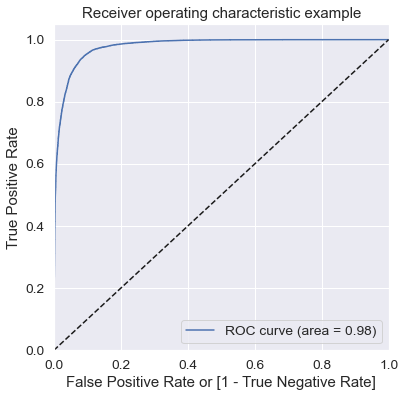

(array([0.        , 0.        , 0.        , ..., 0.99989587, 0.99994794,
        1.        ]),
 array([0.00000000e+00, 5.21430806e-05, 1.04286161e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99589989e+00, 9.95899886e-01, 9.95669001e-01, ...,
        1.02047424e-03, 7.98058972e-04, 6.77849762e-04]))

In [279]:
# Printing the ROC curve
draw_roc(y_train_final_gb.churn, y_train_final_gb.Churn_Prob)

In [280]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final_gb[i]= y_train_final_gb.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_final_gb.head()

CustID  churn  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   24443      0    0.097728          0    1    0    0    0    0    0    0   
1   42841      1    0.972396          1    1    1    1    1    1    1    1   
2   41118      1    0.987413          1    1    1    1    1    1    1    1   
3    2254      0    0.023518          0    1    0    0    0    0    0    0   
4   29470      0    0.735628          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    1    1    1  
3    0    0    0  
4    1    0    0

In [281]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final_gb.churn, y_train_final_gb[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.499622     1.000000     0.000000
0.1   0.1  0.790699     0.998540     0.583173
0.2   0.2  0.876540     0.989832     0.763420
0.3   0.3  0.911867     0.976848     0.846983
0.4   0.4  0.926899     0.958755     0.895090
0.5   0.5  0.927263     0.930545     0.923986
0.6   0.6  0.919578     0.892116     0.946998
0.7   0.7  0.899388     0.835384     0.963295
0.8   0.8  0.864374     0.749870     0.978706
0.9   0.9  0.787625     0.581969     0.992971


**Since predicting more churners is most important so by slight compromise with accuracy and specificity we can increase the sensitivity. So considering the cutoff point as 0.4**

In [282]:
# Creating new column 'Predicted' with 1 if Churn_Prob>0.4 else 0
y_train_final_gb['final_predicted'] = y_train_final_gb.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_train_final_gb.head()

CustID  churn  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   24443      0    0.097728          0    1    0    0    0    0    0    0   
1   42841      1    0.972396          1    1    1    1    1    1    1    1   
2   41118      1    0.987413          1    1    1    1    1    1    1    1   
3    2254      0    0.023518          0    1    0    0    0    0    0    0   
4   29470      0    0.735628          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    1    1    1                1  
2    1    1    1                1  
3    0    0    0                0  
4    1    0    0                1

In [283]:
# Confusion matrix 
confusion_gb2 = metrics.confusion_matrix( y_train_final_gb.churn, y_train_final_gb.final_predicted )
confusion_gb2

array([[17192,  2015],
       [  791, 18387]], dtype=int64)

In [284]:
#Let's check the overall accuracy.
accu = metrics.accuracy_score(y_train_final_gb.churn, y_train_final_gb.Predicted)
accu

0.9272632538752117

In [285]:
TP = confusion_gb2[1,1] # true positive 
TN = confusion_gb2[0,0] # true negatives
FP = confusion_gb2[0,1] # false positives
FN = confusion_gb2[1,0] # false negatives

In [286]:
# Checking the Specificity of the model
speci = TN/(TN+FP)
speci

0.8950903316499192

In [287]:
# Checking the Sensitivity of the model
sensi = TP/(TP+FN)
sensi

0.9587548232349568

In [288]:
# Calculating the Precision(Positive Predictive Value) of the model
preci = TP/(TP+FP)
preci

0.9012351730222528

In [289]:
# Displaying the train result of the Gradient Boosting Method
Result_train = pd.DataFrame({'Method':['Gradient Boosting with PCA'], 'Roc_Auc_train': [auc_score],
                             'Accuracy_train': [accu], 'Sensitivity_train': [sensi], 'Specificity_train': [speci], 
                             'Precision_train': [preci]})
Result_train

Method  Roc_Auc_train  Accuracy_train  \
0  Gradient Boosting with PCA       0.978663        0.927263   

   Sensitivity_train  Specificity_train  Precision_train  
0           0.958755            0.89509         0.901235

#### Model Evaluation

In [290]:
# Applying Scaling
X_test_gb = ss.transform(X_test)

In [291]:
# Applying PCA
X_test_pca = pca.transform(X_test_gb)
X_test_pca.shape

(16451, 33)

In [292]:
# Making predictions
y_pred_test = gbclass_final.predict_proba(X_test_pca)

In [293]:
# Checking the roc_auc_score of the model
auc_score = metrics.roc_auc_score(y_test, y_pred_test[:,1])
auc_score

0.9609443080735881

In [294]:
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test_gb = y_pred_test.iloc[:,[1]]
y_pred_test_gb.head()

1
0  0.709950
1  0.191284
2  0.971478
3  0.133048
4  0.928598

In [295]:
# Converting to DataFrame
y_test_gb = pd.DataFrame(y_test)
y_test_gb.head()

churn
47473      1
49259      1
39821      1
14552      0
49274      1

In [296]:
# Putting CustID to index
y_test_gb['CustID'] = y_test_gb.index
# Removing index for both dataframes to append them side by side 
y_pred_test_gb.reset_index(drop=True, inplace=True)
y_test_gb.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_test_final_gb = pd.concat([y_test_gb,y_pred_test_gb],axis=1)
# Renaming the column 
y_test_final_gb= y_test_final_gb.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_test_final_gb = y_test_final_gb.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_test_final_gb.head()

CustID  churn  Churn_Prob
0   47473      1    0.709950
1   49259      1    0.191284
2   39821      1    0.971478
3   14552      0    0.133048
4   49274      1    0.928598

In [297]:
# Creating new column 'Predicted' with 1 if Churn_Prob>0.4 else 0
y_test_final_gb['Predicted'] = y_test_final_gb.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_test_final_gb.head()

CustID  churn  Churn_Prob  Predicted
0   47473      1    0.709950          1
1   49259      1    0.191284          0
2   39821      1    0.971478          1
3   14552      0    0.133048          0
4   49274      1    0.928598          1

In [298]:
# Confusion matrix 
confusion_gb3 = metrics.confusion_matrix( y_test_final_gb.churn, y_test_final_gb.Predicted )
confusion_gb3

array([[7108, 1103],
       [ 597, 7643]], dtype=int64)

In [299]:
#Let's check the overall accuracy.
accu = metrics.accuracy_score(y_test_final_gb.churn, y_test_final_gb.Predicted)
accu

0.8966628168500395

In [300]:
TP = confusion_gb3[1,1] # true positive 
TN = confusion_gb3[0,0] # true negatives
FP = confusion_gb3[0,1] # false positives
FN = confusion_gb3[1,0] # false negatives

In [301]:
# Checking the Specificity of the model
speci = TN/(TN+FP)
speci

0.8656680063329679

In [302]:
# Checking the Sensitivity of the model
sensi = TP/(TP+FN)
sensi

0.9275485436893204

In [303]:
# Calculating the Precision(Positive Predictive Value) of the model
preci = TP/(TP+FP)
preci

0.8738852046649898

In [304]:
# Displaying the test result of Gradient Boosting Method
Result_test = pd.DataFrame({'Method1':['Gradient Boosting with PCA'], 'Roc_Auc_test': [auc_score],
                            'Accuracy_test': [accu], 'Sensitivity_test': [sensi], 'Specificity_test': [speci], 
                            'Precision_test': [preci]})
Result_test

Method1  Roc_Auc_test  Accuracy_test  Sensitivity_test  \
0  Gradient Boosting with PCA      0.960944       0.896663          0.927549   

   Specificity_test  Precision_test  
0          0.865668        0.873885

In [305]:
# Displaying the train and test result of Gradient Boosting Method
Result_gb = pd.concat([Result_train, Result_test], axis=1)
Result_gb.drop('Method1', axis=1, inplace=True)
Result_gb = Result_gb.reindex(['Method', 'Roc_Auc_train', 'Roc_Auc_test', 'Accuracy_train', 'Accuracy_test', 
                               'Sensitivity_train', 'Sensitivity_test', 'Specificity_train', 'Specificity_test', 
                               'Precision_train', 'Precision_test'], axis=1)
Result_gb

Method  Roc_Auc_train  Roc_Auc_test  Accuracy_train  \
0  Gradient Boosting with PCA       0.978663      0.960944        0.927263   

   Accuracy_test  Sensitivity_train  Sensitivity_test  Specificity_train  \
0       0.896663           0.958755          0.927549            0.89509   

   Specificity_test  Precision_train  Precision_test  
0          0.865668         0.901235        0.873885

In [306]:
# Displaying the final comparision
Result_final = pd.concat([Result_lr, Result_lrp, Result_rf, Result_gb])
Result_final

Method  Roc_Auc_train  Roc_Auc_test  Accuracy_train  \
0   Logistic Regression w/o PCA       0.896980      0.898330        0.835431   
0  Logistic Regression with PCA       0.907604      0.910280        0.827016   
0        Random Forest with PCA       0.996777      0.974553        0.967253   
0    Gradient Boosting with PCA       0.978663      0.960944        0.927263   

   Accuracy_test  Sensitivity_train  Sensitivity_test  Specificity_train  \
0       0.835451           0.845083          0.842597           0.825793   
0       0.840496           0.879549          0.831796           0.774561   
0       0.917573           0.995411          0.954733           0.939137   
0       0.896663           0.958755          0.927549           0.895090   

   Specificity_test  Precision_train  Precision_test  
0          0.828279         0.828875        0.831198  
0          0.849227         0.795735        0.847009  
0          0.880283         0.942297        0.888927  
0          0.865668         0.901235        0.873885